<a href="https://colab.research.google.com/github/Deleon57/EDAB6808/blob/main/EDAB_ASMT_1_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDAB6808 Assignment 1:   Lead-Lag Indicators in Stock Market Predictions

**Group Memebrs:**

Deleon Bernardü 2021368044

Tshenolo Matlhare 2020850125

#INTRODUCTION

The objective of this assignment was to investigate whether Google search trends can serve as leading or lagging indicators for stock price movements on the Johannesburg Stock Exchange (JSE) using time-series and machine learning models.

We focused on Gold Fields Limited (GFI), a major South African gold mining company listed on both the JSE and NYSE. Gold Fields was chosen due to its strong market presence and high public visibility, making it an ideal case for analysing investor attention through online search behaviour.

Google Trends data for 14 relevant keywords and daily stock price data were collected over a one-year period to assess whether variations in online search activity lead or lag movements in the company’s share price. This relationship was examined using both econometric techniques and machine learning approaches.

The analysis began with data preprocessing, followed by statistical and econometric tests such as cross-correlation and Granger causality to determine temporal dependencies between search intensity and price movements. Machine learning classification models were then applied to evaluate the predictive power of Google search data in forecasting stock price direction. Finally, model performance metrics and comparative analysis was used to interpret the direction, timing, and magnitude of the identified relationships.

**Fundamental Research Question (Hypothesis):**

Are Google search trends for company-related keywords leading predictors of stock price movements, or do they lag behind as reactions to prior market performance on the JSE?


# Libraries

In [ ]:
# Install the 'pmdarima' library, which helps automate ARIMA and SARIMAX time series modelling.
!pip install pmdarima

In [ ]:
#Libraries Installed
import pandas as pd
from datetime import timedelta
import numpy as np
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import itertools
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from itertools import combinations
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import xgboost as xgb
from itertools import product
from joblib import Parallel, delayed
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix


# **Section 1: Data Preprocessing.**

This section focuses on the general processing of the data. It employes data collection, cleaning, understanding and visualisation using the following sub section.

* **Generating Daily Data from Google Trends as It is Provided in Weekly Frequencies-**
This step will convert Google Trends data, which is offered in its raw form as weekly frequencies, to daily frequency for a consistent match to other datasets. Dates that do not have records are forward filled to maintain the continuity of the time series. This is done to ensure this dataset can someday merge with daily stock or economic data correctly.

* **Creating Daily Data of Google Trends Given that its raw form is in weekly frequencies-** involves changing weekly data from Google Trends into daily data so that it properly aligns with the other datasets using daily frequency. Any missing days with are filled using forward fill to prevent discontinuity in the time series of the data. This is especially useful for merging with daily stock or economic data later.

* **Importing Stock Data-**
The imported stock price data is cleaned to remove any duplicates or unusual data points. The date is also converted into a date time object to enable proper time-series operations. This leaves the data in reliable format, ready for any potential merging or analysis with other variables.

* **Joining Google Trends and Stock Data-**
The data from Google Trends and the data from stock prices are merged together on the Date column. Suffixes were applied to the merged variable names to prevent similarly named variables from being confusing. Merging of these variables allows for them to be analyzed together with the same daily frequency.

* **Merging Google Trends and Stock Data-**
Identifying any missing values for variables, the missing values are dealt with by either forward/ backward filling or imputation. The columns of interest, such as Close and any search index, must be ensured to contain no gaps or missing values. This together guarantees the continuity and reliability for any further analysis or modelling that is conducted.

* **Visualizing Stock Prices and Google Trends With a 95% Confidence Interval-**
Time series plots of the stock prices and Google Trends values plots are shown simultaneously. The shaded segments show 95% confidence intervals in order to show variability. These visuals will allow you to see the trends, any spikes, and potentially even the clustering.

* **Exploratory Data Analysis - Numeric Features-**
Summary statistics and correlations are assessed for numeric variables. Outliers, missing values, and distributions are assessed and visually inspected.
This assessment will guide preprocessing and modeling strategy.

* **Addressing Non-Stationarity for the Variable Close-**
Stationarity of Close will assessed using the ADF test and through visual inspection.
If Close does not appear to be stationary, will difference or apply log transformations to stabilize variance and trends. We need to establish stationarity prior to using time series models, e.g., Granger causality or ARIMA.

* **Asssembling a DataFrame of Stationary Variables-**
All stationary variables will be selected for use in the final DataFrame.
Indices will be aligned in sequence, and missing values will be removed.
This DataFrame is ready for causality testing or for use in regression models.

* **Addressing Missing Values for the Variable Close-**
Missing values in the variable Close will be interpolation or forward filled as they occur to maintain a smooth continuum.
The interpolated values will be checked for consistency with trends observed in the Close time series.
Compiling the Close data will yield a complete series of time series data without any gaps.

In [ ]:
# Uploading Google Trends Data
uploaded = files.upload()
df_daily = pd.read_excel('DAILY DATA GFI.xlsx')
df_weekly = pd.read_excel('YEAR DATA GFI.xlsx')

Saving DAILY DATA GFI.xlsx to DAILY DATA GFI (5).xlsx
Saving YEAR DATA GFI.xlsx to YEAR DATA GFI (5).xlsx


###**Keyword Selection Justification**

The above Google Trends keywords have been chosen to capture the primary influences on market sentiment and overall investor interest in Gold Fields Limited and the gold sector. The words "gold price," "gold spot," "gold futures," and "gold price forecast" themselves are suggestive of the market perception and price behaviour that affect the valuations of gold-mining firms. As Chirwa and Odhiambo (2020) observe, gold price behaviour reflects a multitude of macroeconomic and financial factors, which are core determinants in the stock performance for firms related to gold Incorporating terms that are related to price aligns the search inquiry with the underlying revenue drivers of the firm.  Additionally, terms such as "buy gold," "sell gold," "gold return," and "gold growth" are used to capture investor sentiment and speculative interest, as they have been associated with trading activity and market movement. Bijl et al. (2016) noted that increases in Google search activity are likely to cause changes in stock returns, implying websites queries can be used as a proxy for retail investor attention and sentiment. To ensure that firm specific information as well as broader sector-level data were captured, firm focused keywords included "Gold Fields," "gold companies," and “gold mining” were included, reflecting how investor attention may concentrate on specific firms or industry segments within the commodity sector. In conclusion, The process of selecting the keywords described here is consistent with a study contducted by Jiang et al. (2023). This study is of Google Search Volume Index (GSVI) studies which emphasize the necessity of selecting keywords that incorporate a company's name, a sector identifier, and a finance-related keyword. This combination helps ensure that it captures what is broadly demonstrated in the search behaviour with regards to the firm and the underlying commodity. Together, these keywords allow the study to capture uncertainty in investor interest, sector awareness and market sentiment that is expected to matter to the classic price dynamics of Gold Fields.

##**Creating Daily Data of Google Trends Given that its raw form is in weekly frequencies**

In [ ]:
# Convert the 'Date' column in the weekly dataframe to datetime format for accurate time operations
df_weekly["Date"] = pd.to_datetime(df_weekly["Date"])

# Sort the dataframe in ascending order by 'Date' to maintain proper chronological order
df_weekly = df_weekly.sort_values("Date")

# Set 'Date' as the index to prepare for reindexing and date-based operations
df_weekly = df_weekly.set_index("Date")

# Create a new daily date range that spans from the earliest to the latest date in the dataset
full_index = pd.date_range(
    start=df_weekly.index.min(),
    end=df_weekly.index.max(),
    freq="D"
)

# Reindex the dataframe to include all daily dates, forward-filling missing weekly values
df_weekly = df_weekly.reindex(full_index).ffill()

# Reset the index and rename the 'index' column back to 'Date' for consistency
df_weekly = df_weekly.reset_index().rename(columns={"index": "Date"})


In [ ]:
# Reset the index for both dataframes so 'Date' becomes a normal column again
df_weekly = df_weekly.reset_index(drop=True)
df_daily = df_daily.reset_index(drop=True)

# Make sure the 'Date' columns in both dataframes are in proper datetime format
df_weekly["Date"] = pd.to_datetime(df_weekly["Date"])
df_daily["Date"] = pd.to_datetime(df_daily["Date"])

# Combine the weekly and daily data into one dataframe
df = df_weekly.merge(
    df_daily,
    how="left",
    left_on="Date",
    right_on="Date",
    suffixes=('_weekly', '_daily')
)


In [ ]:
# Go through every column name in the dataframe
for col in df.columns:

    # Check if the column name ends with '_daily'
    if col.endswith('_daily'):
        # Get the base name of the column (remove '_daily' from the end)
        base_name = col[:-6]
        # Create the matching weekly column name
        weekly_col = base_name + '_weekly'

        # Only continue if the weekly version of this column exists
        if weekly_col in df.columns:
            # Create a new column name for the adjusted daily data
            adjusted_col = 'adjusted_daily_' + base_name

            # Create the adjusted daily data by scaling daily values with weekly percentages
            df[adjusted_col] = df[col] * (df[weekly_col] / 100)


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# This helps create a cleaner dataframe containing only the adjusted daily data
df = df[['Date'] + [col for col in df.columns if col.startswith('adjusted_daily_')]]

# Display the resulting dataframe
df


Date  adjusted_daily_Buy Gold  adjusted_daily_Gold price per ounce  \
0   2023-12-31                    40.32                                 1.20   
1   2024-01-01                    39.60                                 0.96   
2   2024-01-02                    44.64                                 1.20   
3   2024-01-03                    39.60                                 1.20   
4   2024-01-04                    39.60                                 1.32   
..         ...                      ...                                  ...   
360 2024-12-25                    41.00                                 0.77   
361 2024-12-26                    46.74                                 0.88   
362 2024-12-27                    43.46                                 0.88   
363 2024-12-28                    45.92                                 0.99   
364 2024-12-29                    48.06                                 0.66   

     adjusted_daily_Gold futures price  adjusted_daily_Gold market price  \
0                                 0.00                              0.55   
1                                 0.03                              1.10   
2                                 0.09                              0.99   
3                                 0.09                              1.10   
4                                 0.09                              0.99   
..                                 ...                               ...   
360                               0.00                              0.54   
361                               0.06                              0.54   
362                               0.06                              0.63   
363                               0.00                              0.36   
364                               0.00                              0.45   

     adjusted_daily_Gold price forecast  adjusted_daily_Gold spot price  \
0                                  0.03                            1.36   
1                                  0.06                            1.87   
2                                  0.06                            2.38   
3                                  0.09                            2.38   
4                                  0.06                            2.72   
..                                  ...                             ...   
360                                0.09                            0.98   
361                                0.06                            1.26   
362                                0.09                            1.40   
363                                0.06                            1.26   
364                                0.03                            0.84   

     adjusted_daily_Gold share price  adjusted_daily_Sell Gold  \
0                              11.39                      5.04   
1                              33.50                      4.76   
2                              38.86                      5.88   
3                              41.54                      5.60   
4                              37.52                      5.60   
..                               ...                       ...   
360                            10.71                      4.35   
361                            22.95                      6.09   
362                            22.95                      6.09   
363                             8.67                      6.67   
364                             6.00                      7.82   

     adjusted_daily_Gold market  adjusted_daily_Gold return  \
0                          7.20                        0.48   
1                         10.08                        0.56   
2                          9.72                        0.48   
3                          9.72                        0.56   
4                          9.72                        0.48   
..                          ...                         ...   
3

##Importing Stock Data

In [ ]:
# Download daily stock price data for Gold Fields Limited (GFI.JO) from Yahoo Finance
# The data covers the full year 2024, from 1 January to 1 January 2025
df_stock = yf.download('GFI.JO', start='2024-01-01', end='2025-01-01', interval='1d', multi_level_index=False)

/tmp/ipython-input-521706006.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_stock = yf.download('GFI.JO', start='2024-01-01', end='2025-01-01', interval='1d', multi_level_index=False)
[*********************100%***********************]  1 of 1 completed


## Join Google Trends and Stock Data

In [ ]:
# Reset the index for both weekly and daily datasets so 'Date' becomes a normal column again
df_weekly = df_weekly.reset_index(drop=True)
df_daily = df_daily.reset_index(drop=True)

# Make sure the 'Date' columns in both datasets are properly formatted as datetime objects
df_weekly["Date"] = pd.to_datetime(df_weekly["Date"])
df_daily["Date"] = pd.to_datetime(df_daily["Date"])

# Merge the main dataframe (df) with the stock data (df_stock)
df = df.merge(
    df_stock,
    how="left",
    left_on="Date",
    right_on="Date",
    suffixes=('_weekly', '_daily')
)

# Display the first 10 rows to quickly check if the merge worked correctly
df.head(10)


Date  adjusted_daily_Buy Gold  adjusted_daily_Gold price per ounce  \
0 2023-12-31                    40.32                                 1.20   
1 2024-01-01                    39.60                                 0.96   
2 2024-01-02                    44.64                                 1.20   
3 2024-01-03                    39.60                                 1.20   
4 2024-01-04                    39.60                                 1.32   
5 2024-01-05                    42.48                                 1.20   
6 2024-01-06                    42.48                                 1.20   
7 2024-01-07                    42.88                                 0.99   
8 2024-01-08                    37.52                                 0.99   
9 2024-01-09                    30.15                                 1.10   

   adjusted_daily_Gold futures price  adjusted_daily_Gold market price  \
0                               0.00                              0.55   
1                               0.03                              1.10   
2                               0.09                              0.99   
3                               0.09                              1.10   
4                               0.09                              0.99   
5                               0.09                              0.99   
6                               0.00                              0.77   
7                               0.00                              0.60   
8                               0.09                              0.90   
9                               0.09                              1.00   

   adjusted_daily_Gold price forecast  adjusted_daily_Gold spot price  \
0                                0.03                            1.36   
1                                0.06                            1.87   
2                                0.06                            2.38   
3                                0.09                            2.38   
4                                0.06                            2.72   
5                                0.09                            2.38   
6                                0.06                            1.53   
7                                0.06                            1.05   
8                                0.09                            1.95   
9                                0.09                            1.95   

   adjusted_daily_Gold share price  adjusted_daily_Sell Gold  \
0                            11.39                      5.04   
1                            33.50                      4.76   
2                            38.86                      5.88   
3                            41.54                      5.60   
4                            37.52                      5.60   
5                            35.51                      5.60   
6                            14.74                      5.88   
7                            11.70                      5.20   
8                            35.10                      4.94   
9                            35.10                      4.68   

   adjusted_daily_Gold market  adjusted_daily_Gold return  \
0                        7.20                        0.48   
1                       10.08                        0.56   
2                        9.72                        0.48   
3                        9.72                        0.56   
4                        9.72                        0.48   
5                        9.72                        0.56   
6                        7.56                        0.48   
7                        7.59                        0.49   
8                        8.25                        0.42   
9                        8.58                        0.49   

   adjusted_daily_Gold growth  adjusted_daily_Gold mining  \
0                        0.15                        2.21   
1                        0.15  

In [ ]:
df.head(10)

Date  adjusted_daily_Buy Gold  adjusted_daily_Gold price per ounce  \
0 2023-12-31                    40.32                                 1.20   
1 2024-01-01                    39.60                                 0.96   
2 2024-01-02                    44.64                                 1.20   
3 2024-01-03                    39.60                                 1.20   
4 2024-01-04                    39.60                                 1.32   
5 2024-01-05                    42.48                                 1.20   
6 2024-01-06                    42.48                                 1.20   
7 2024-01-07                    42.88                                 0.99   
8 2024-01-08                    37.52                                 0.99   
9 2024-01-09                    30.15                                 1.10   

   adjusted_daily_Gold futures price  adjusted_daily_Gold market price  \
0                               0.00                              0.55   
1                               0.03                              1.10   
2                               0.09                              0.99   
3                               0.09                              1.10   
4                               0.09                              0.99   
5                               0.09                              0.99   
6                               0.00                              0.77   
7                               0.00                              0.60   
8                               0.09                              0.90   
9                               0.09                              1.00   

   adjusted_daily_Gold price forecast  adjusted_daily_Gold spot price  \
0                                0.03                            1.36   
1                                0.06                            1.87   
2                                0.06                            2.38   
3                                0.09                            2.38   
4                                0.06                            2.72   
5                                0.09                            2.38   
6                                0.06                            1.53   
7                                0.06                            1.05   
8                                0.09                            1.95   
9                                0.09                            1.95   

   adjusted_daily_Gold share price  adjusted_daily_Sell Gold  \
0                            11.39                      5.04   
1                            33.50                      4.76   
2                            38.86                      5.88   
3                            41.54                      5.60   
4                            37.52                      5.60   
5                            35.51                      5.60   
6                            14.74                      5.88   
7                            11.70                      5.20   
8                            35.10                      4.94   
9                            35.10                      4.68   

   adjusted_daily_Gold market  adjusted_daily_Gold return  \
0                        7.20                        0.48   
1                       10.08                        0.56   
2                        9.72                        0.48   
3                        9.72                        0.56   
4                        9.72                        0.48   
5                        9.72                        0.56   
6                        7.56                        0.48   
7                        7.59                        0.49   
8                        8.25                        0.42   
9                        8.58                        0.49   

   adjusted_daily_Gold growth  adjusted_daily_Gold mining  \
0                        0.15                        2.21   
1                        0.15  

In [ ]:
# Get a list of all column names in the dataframe
cols = df.columns.tolist()

# Find the position (index) of the 'Close' column in that list
close_index = cols.index("Close")

# Keep all columns up to and including the 'Close' column
df = df.iloc[:, :close_index+1]

# Display the first few rows just to check if the selection looks right
df.head()

# Save the filtered dataframe to a CSV file named 'pipeline_dataset.csv'
df.to_csv("pipeline_dataset.csv", index=False)

# Let the user know the file has been saved successfully
print("CSV file saved as 'pipeline_dataset.csv'")

CSV file saved as 'pipeline_dataset.csv'


## Visualization of Stock Prices And Google Trends With a 95% Confidence Interval.

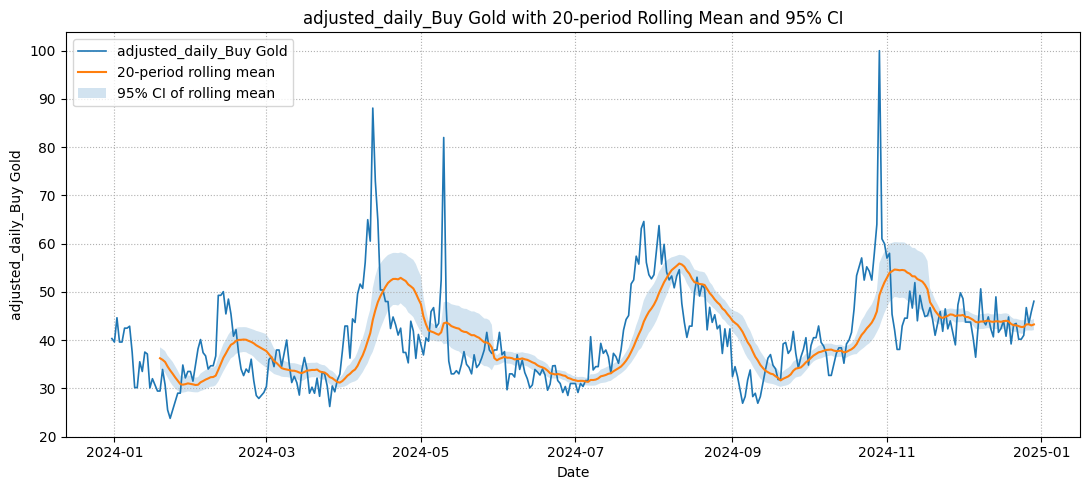

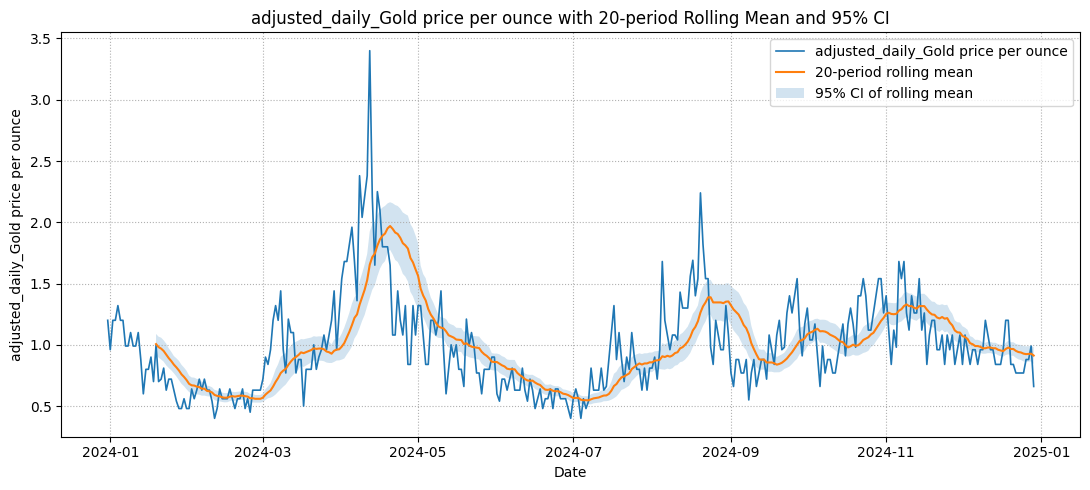

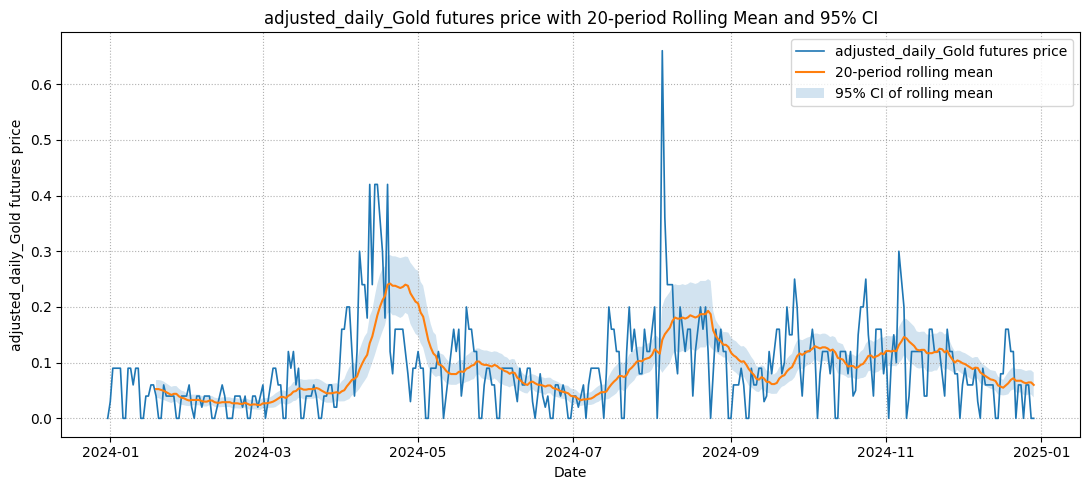

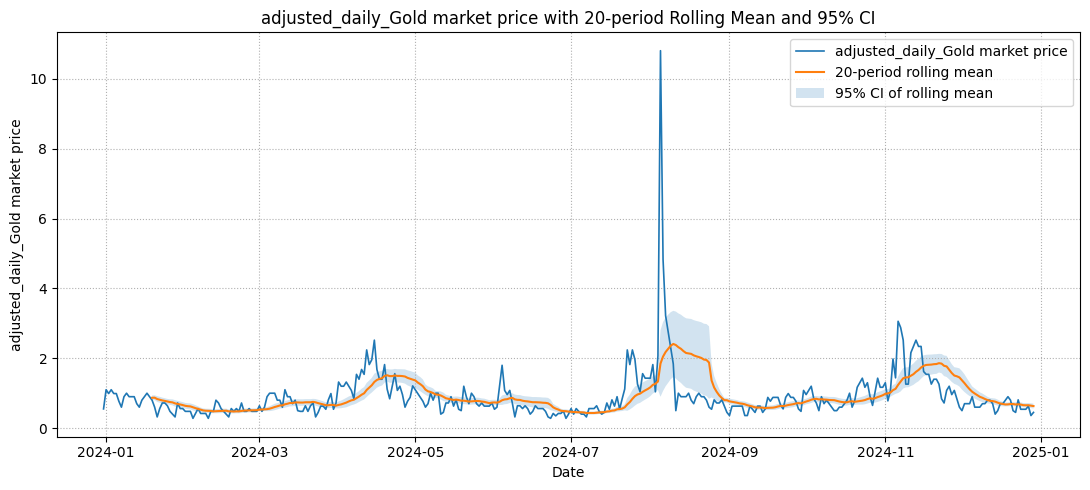

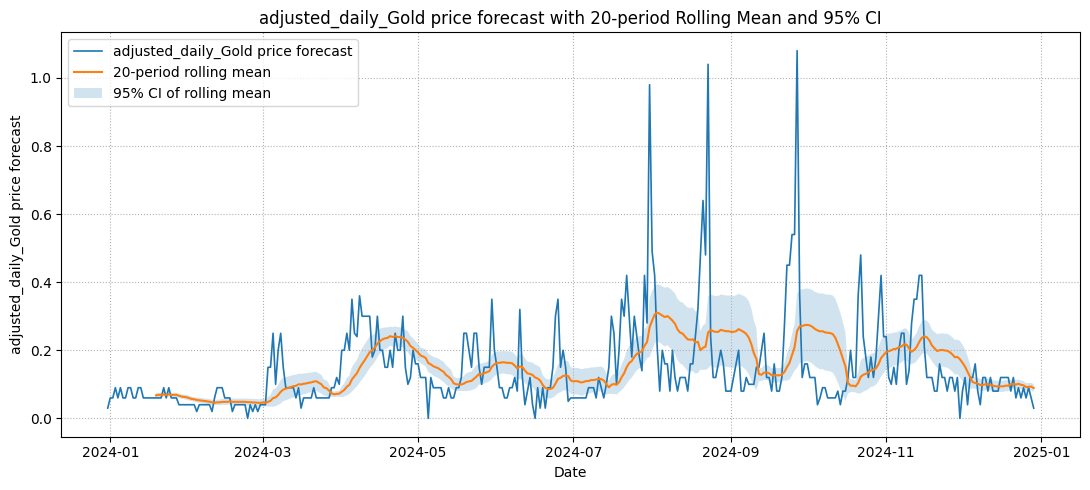

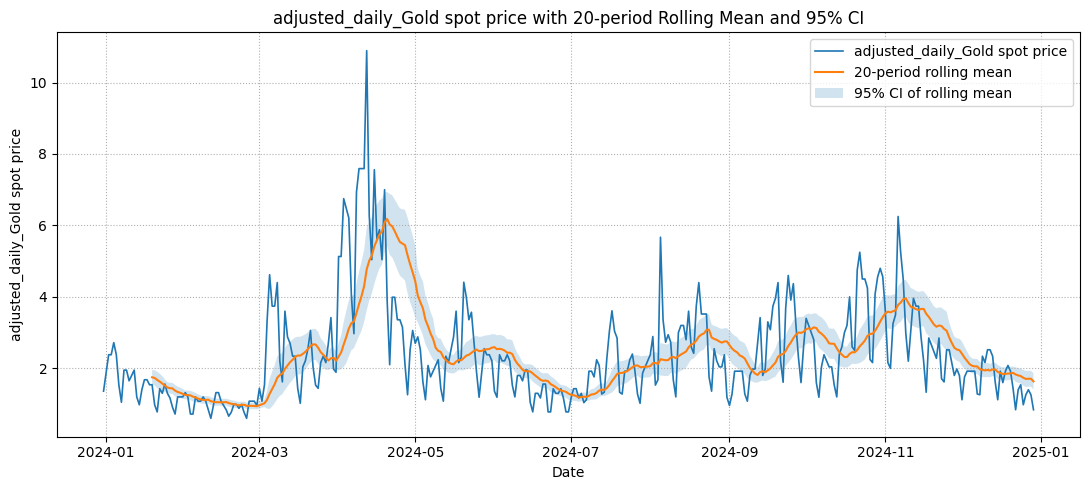

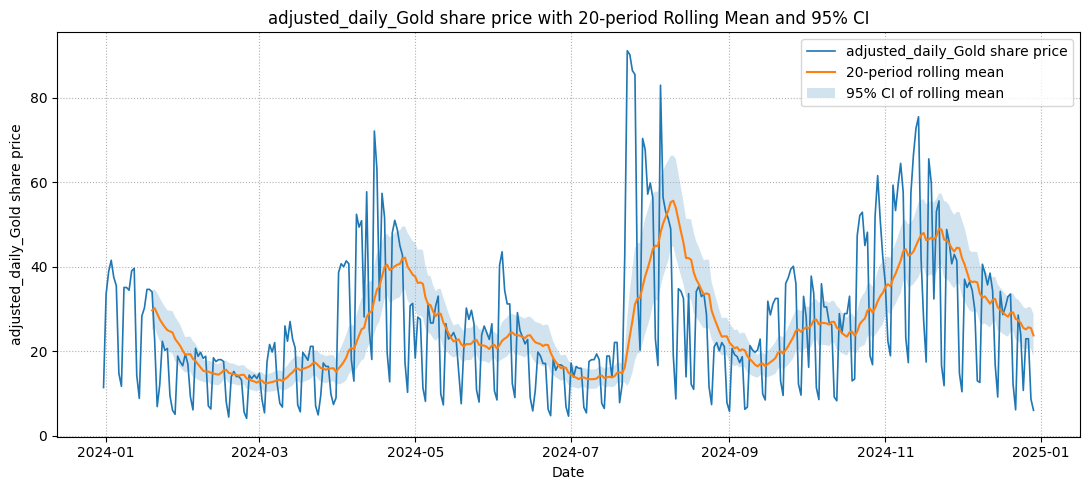

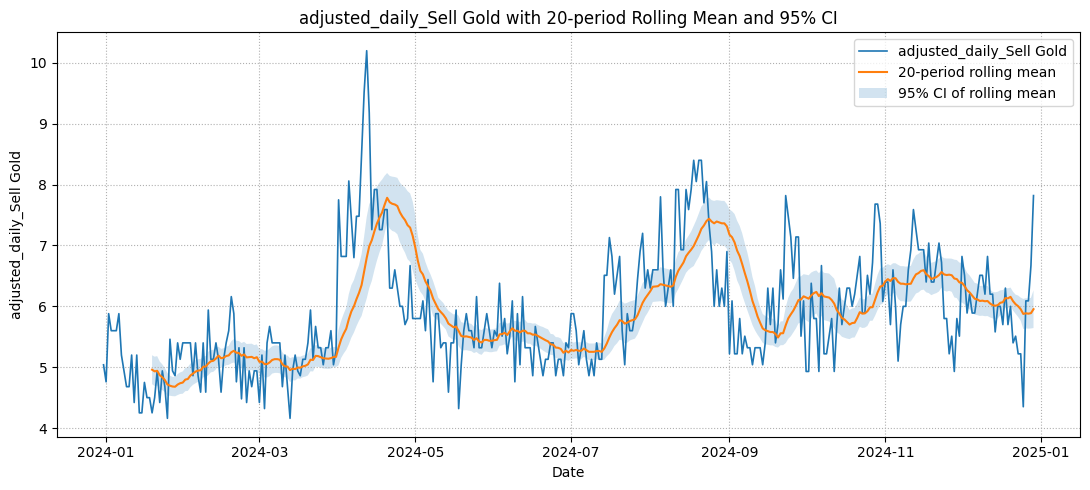

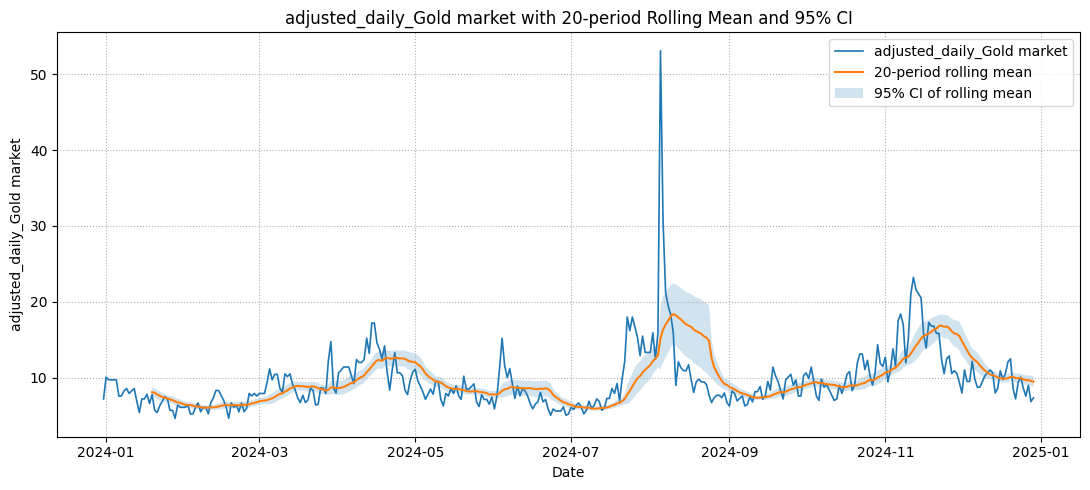

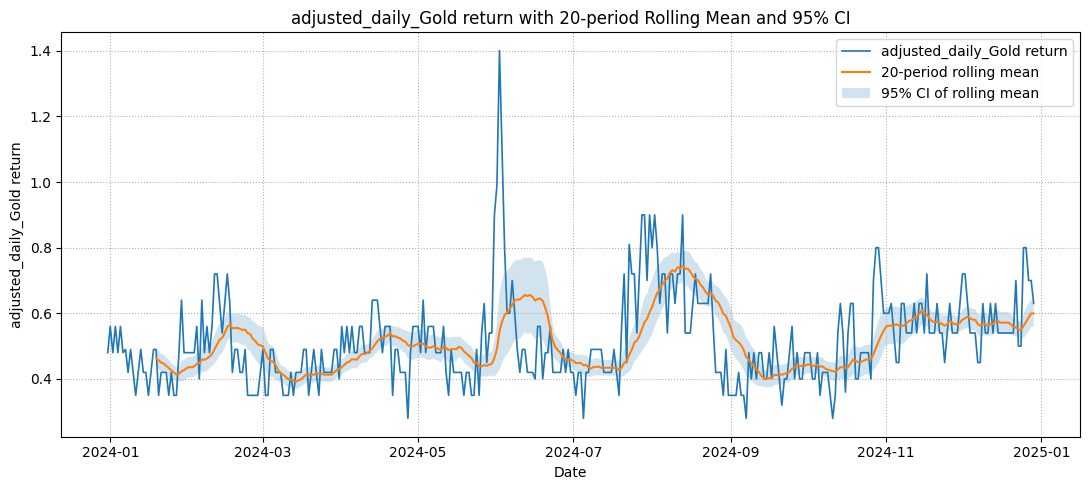

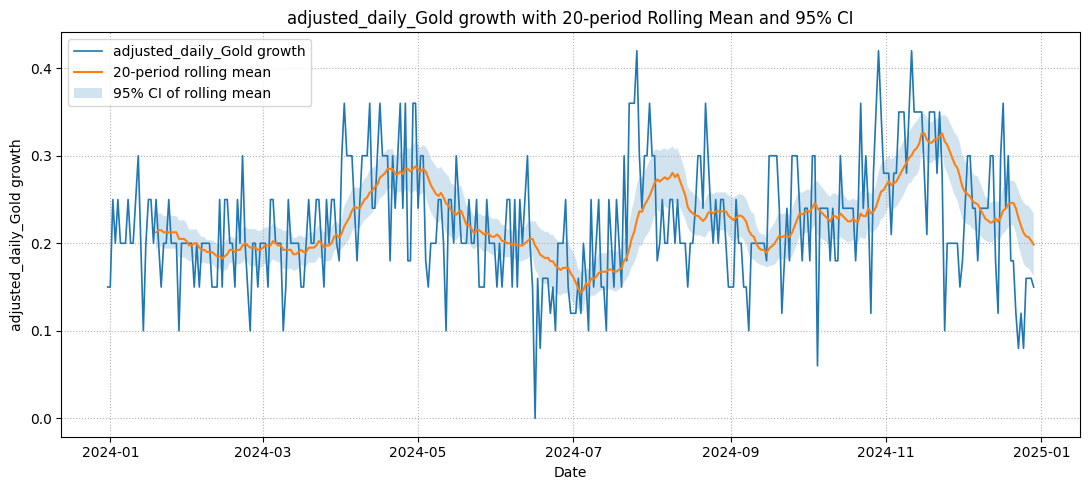

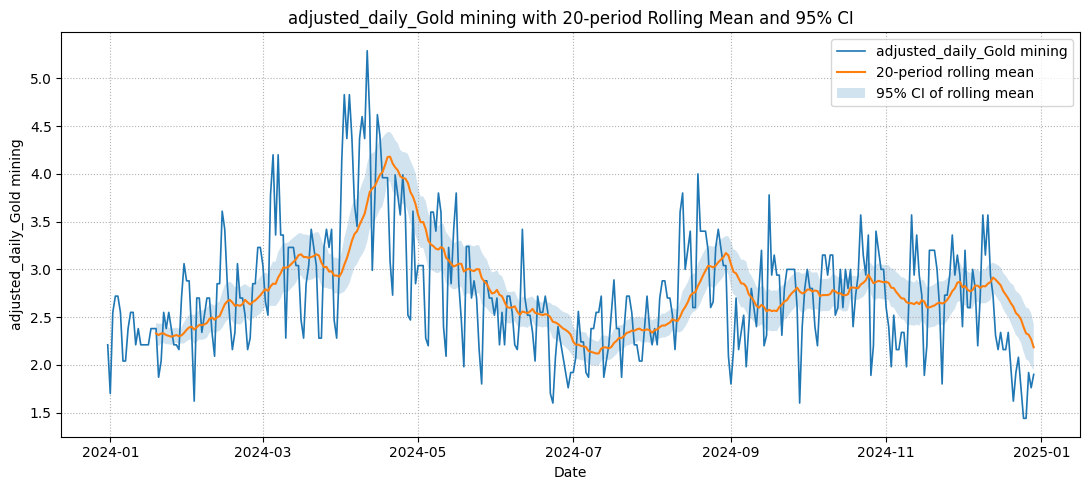

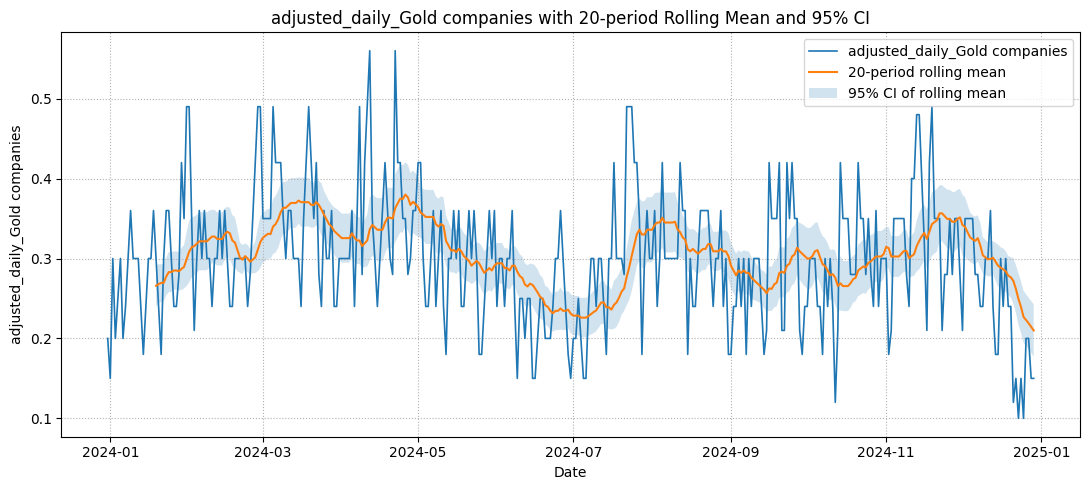

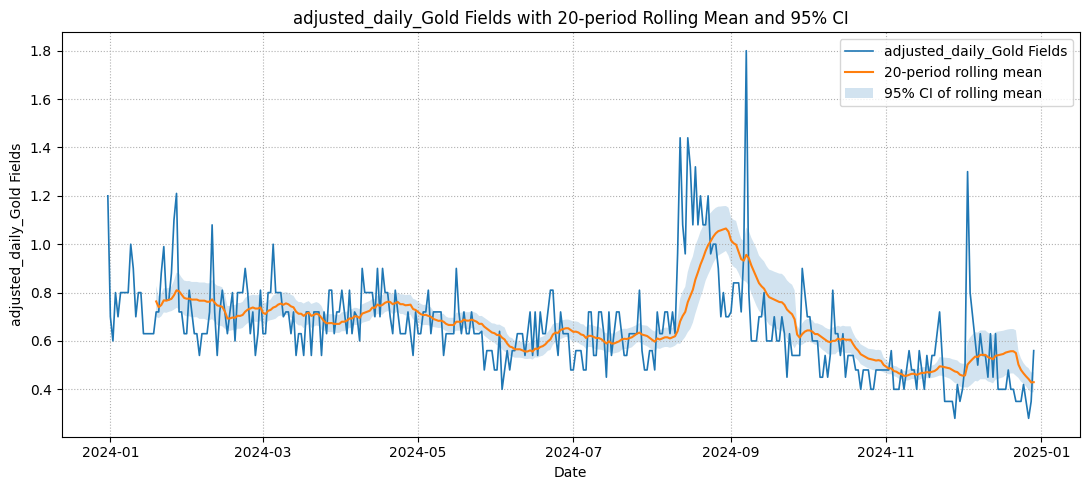

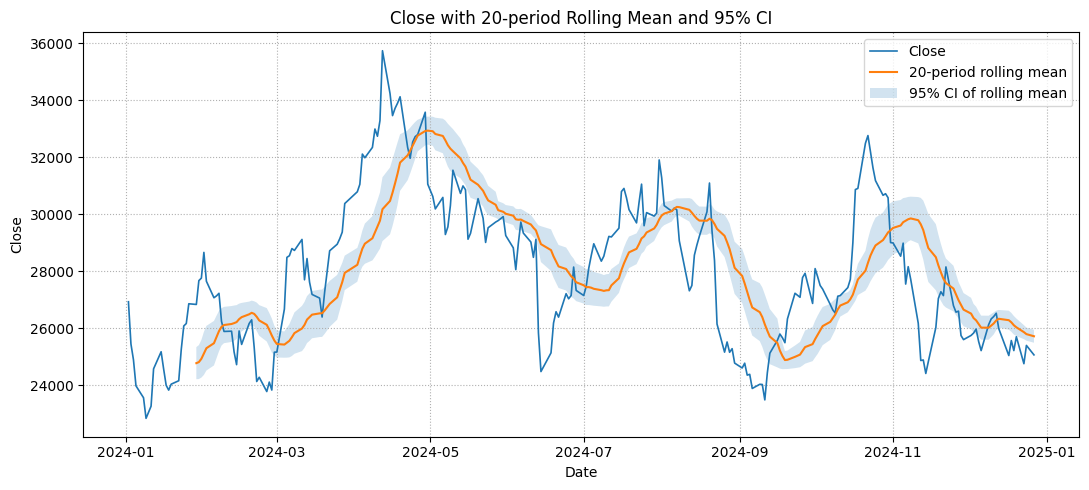

In [ ]:
# SETTINGS
DATE_COL = "Date"      # The name of the date column
WINDOW = 20            # Window size for rolling calculations
Z = 1.96               # Z-score for a 95% confidence interval
SAVE_PNG = False       # Whether to save the plots as PNG images
OUT_DIR = "plots"      # Folder to save plots if enabled


# --- FUNCTION: Rolling Mean Confidence Interval ---
def rolling_ci(series: pd.Series, window=20, z=1.96):
    """
    Calculates the rolling mean and 95% confidence interval for a given time series.
    Rolling mean ± z * (std / sqrt(window))
    """
    mean = series.rolling(window).mean()
    std = series.rolling(window).std()
    se = std / np.sqrt(window)
    lower = mean - z * se
    upper = mean + z * se
    return mean, lower, upper


# FUNCTION: Prepare DataFrame
def prep_df(df: pd.DataFrame, date_col: str) -> pd.DataFrame:
    """
    Makes sure the DataFrame has a proper datetime index and numeric columns.
    Handles the case where the date column might already be the index.
    """
    out = df.copy()

    # Reset index if it's already the date column
    if out.index.name == date_col:
        out = out.reset_index(drop=True)

    # Check if the date column exists
    if date_col not in out.columns:
        raise ValueError(f"'{date_col}' must be a column in df.")

    # Convert date column to datetime and sort by date
    out[date_col] = pd.to_datetime(out[date_col], errors="coerce")
    out = out.dropna(subset=[date_col]).sort_values(date_col).set_index(date_col)

    # Make sure all other columns are numeric
    for c in out.columns:
        out[c] = pd.to_numeric(out[c], errors="coerce")

    return out


# PREPARE DATA
df_ts = prep_df(df, DATE_COL)

# Get all columns except the date column for plotting
cols_to_plot = [c for c in df_ts.columns if c != DATE_COL]

# Create the output folder if saving PNGs is enabled
if SAVE_PNG:
    import os
    os.makedirs(OUT_DIR, exist_ok=True)


# LOOP THROUGH COLUMNS TO PLOT
for col in cols_to_plot:
    s = df_ts[col].dropna()
    if s.empty:
        print(f"Skipping '{col}' (no data).")
        continue

    # Compute rolling mean and confidence intervals
    m, lo, hi = rolling_ci(s, window=WINDOW, z=Z)

    # Plot
    plt.figure(figsize=(11, 5))
    plt.plot(s.index, s.values, label=col, linewidth=1.2)
    plt.plot(m.index, m.values, label=f"{WINDOW}-period rolling mean", linewidth=1.5)

    # Shade the area between upper and lower confidence interval
    plt.fill_between(lo.index, lo.values, hi.values, alpha=0.2, label="95% CI of rolling mean")

    plt.title(f"{col} with {WINDOW}-period Rolling Mean and 95% CI")
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.grid(True, linestyle=":")
    plt.legend()
    plt.tight_layout()

    # Save plot as PNG if enabled
    if SAVE_PNG:
        safe_col = "".join(ch if ch.isalnum() or ch in "-_" else "_" for ch in col)
        plt.savefig(f"{OUT_DIR}/{safe_col}.png", dpi=130)

# Show all plots
plt.show()



##Exploratory Data Analysis – Numeric Features


This part outlines the dataset employed in the analysis by constructing a summary of the structure, statistical features, completeness and distributional properties. These diagnostics serve the purpose of determining whether the dataset can be trusted and is appropriate for time-series modelling.






DataFrame Info:


Descriptive Statistics:


Missing Values:


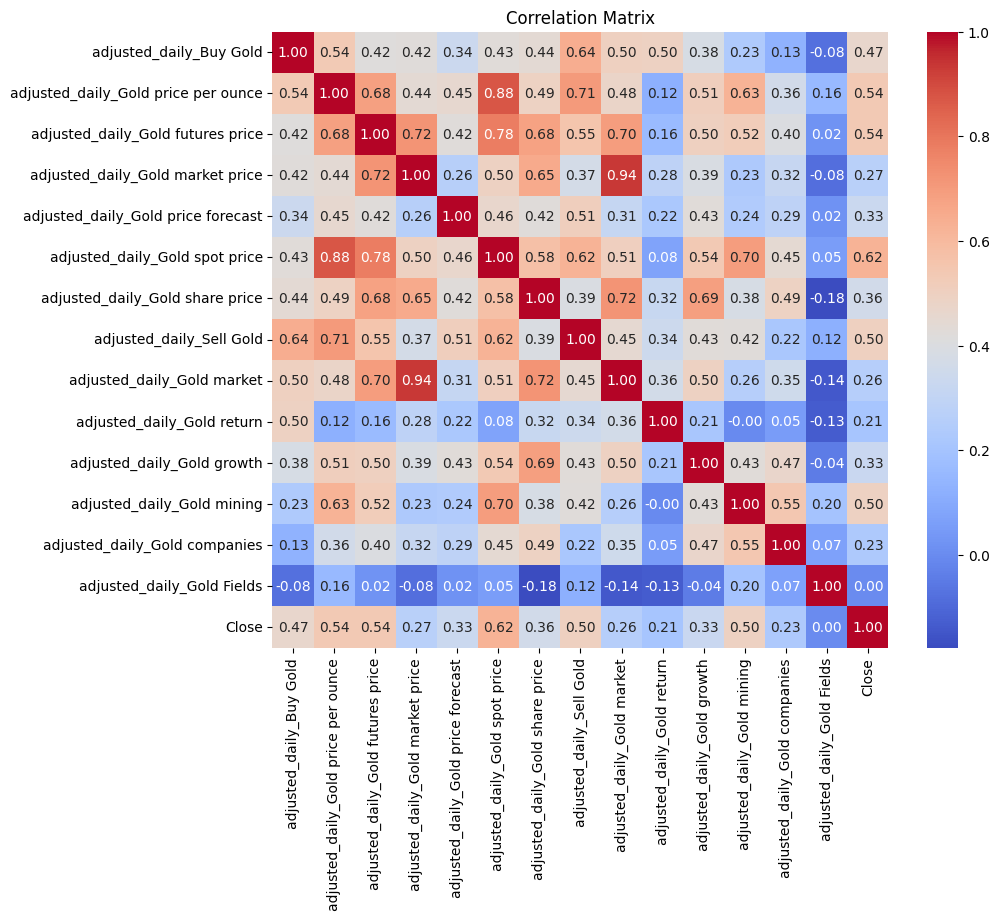

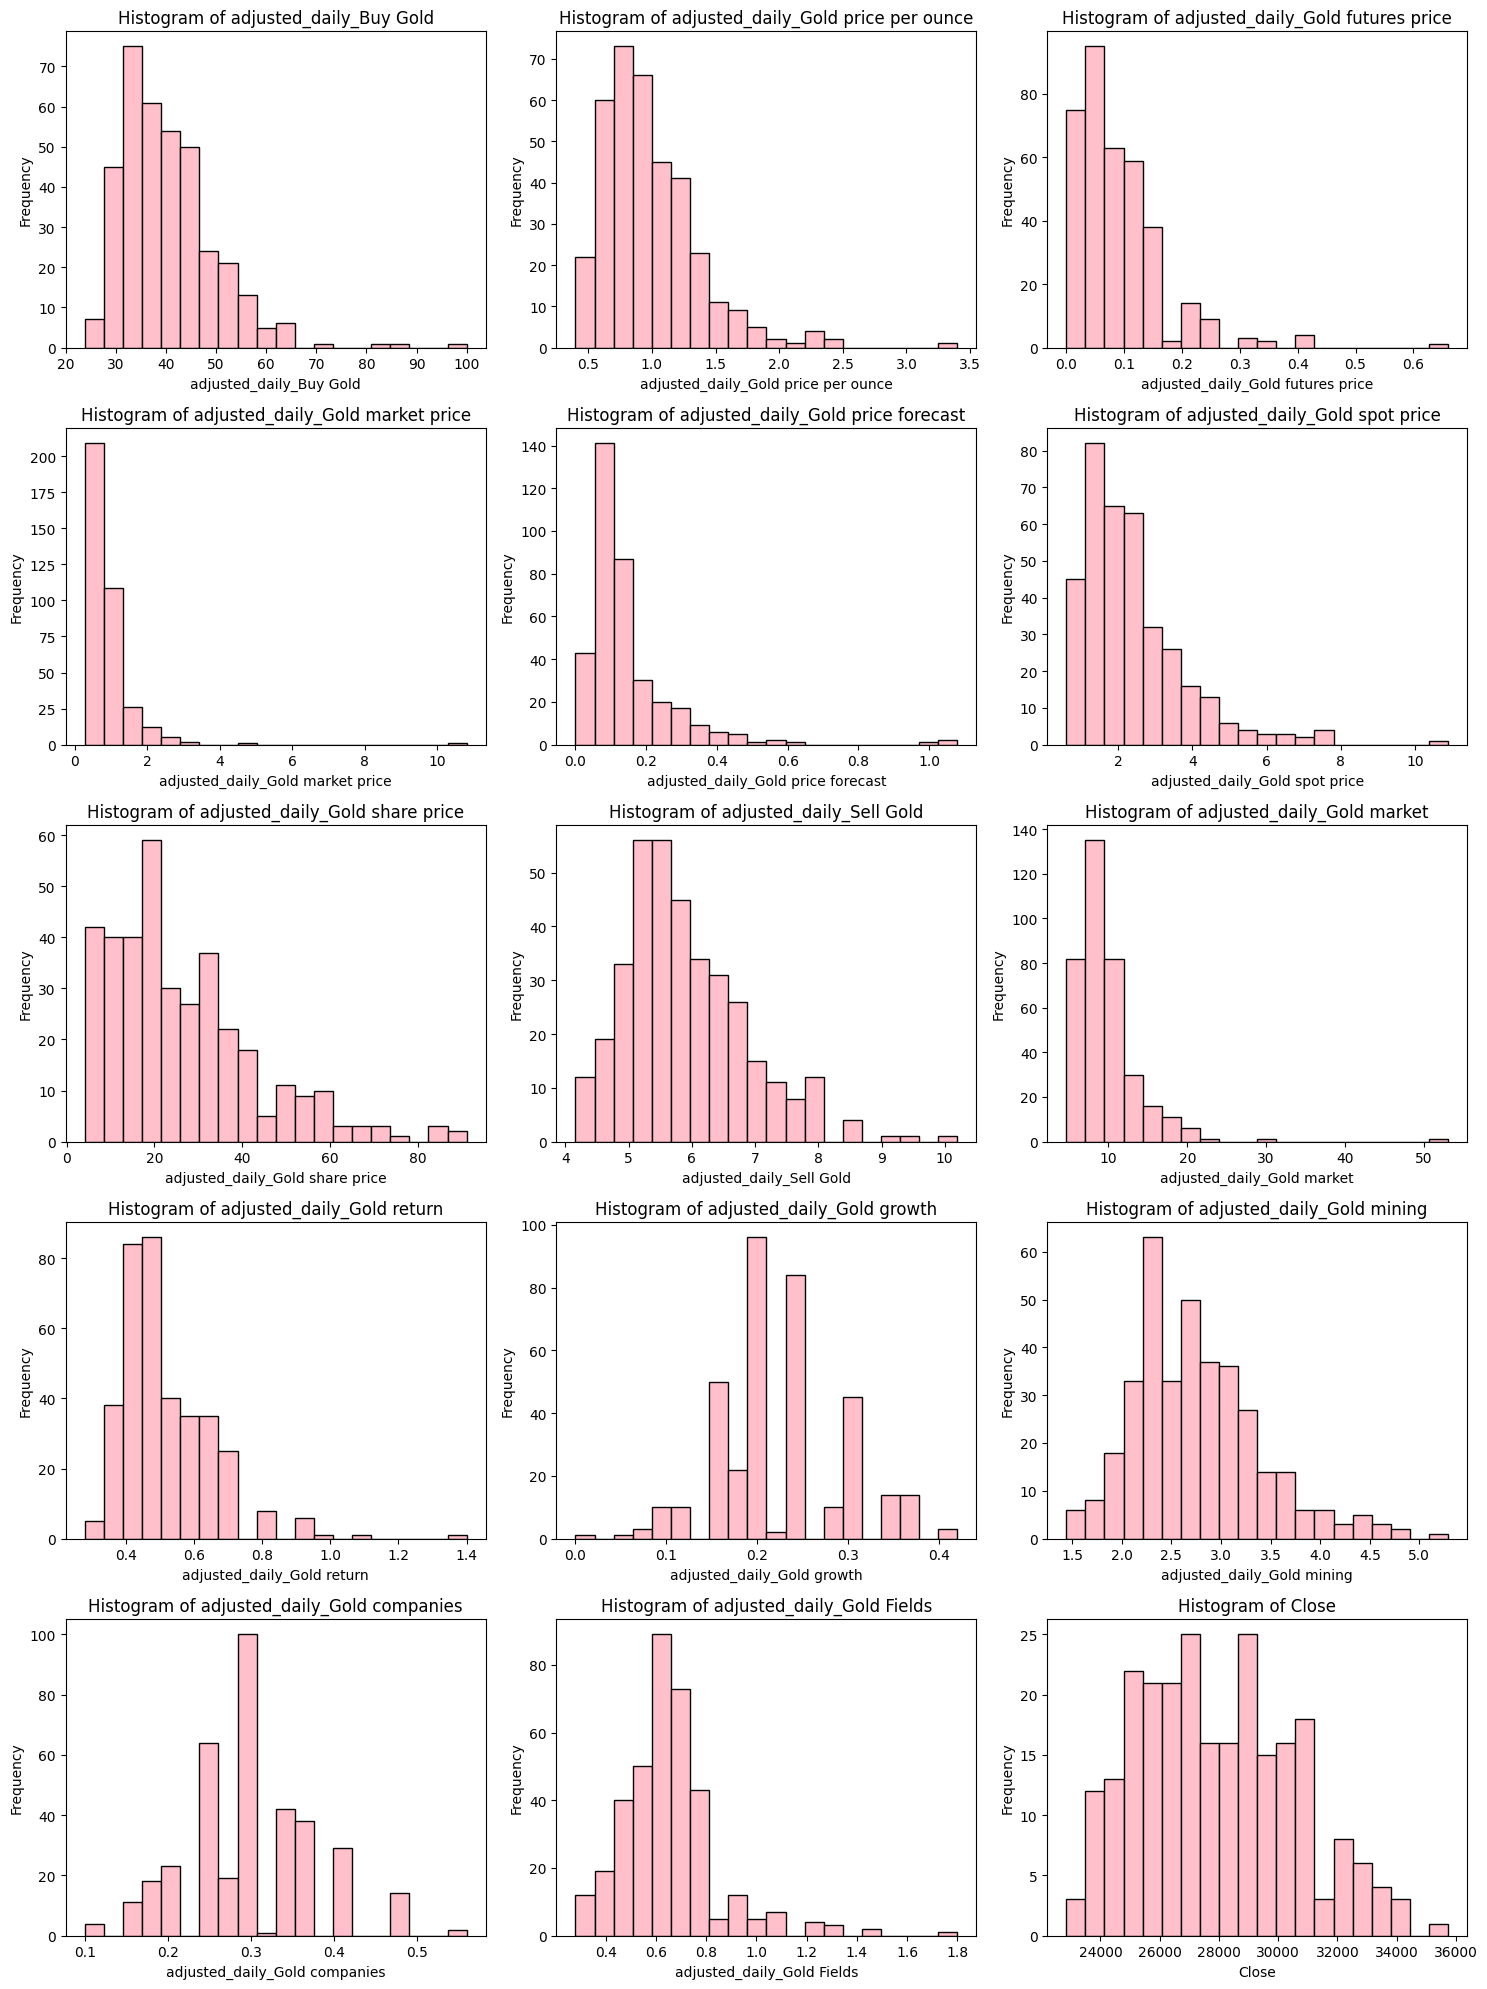

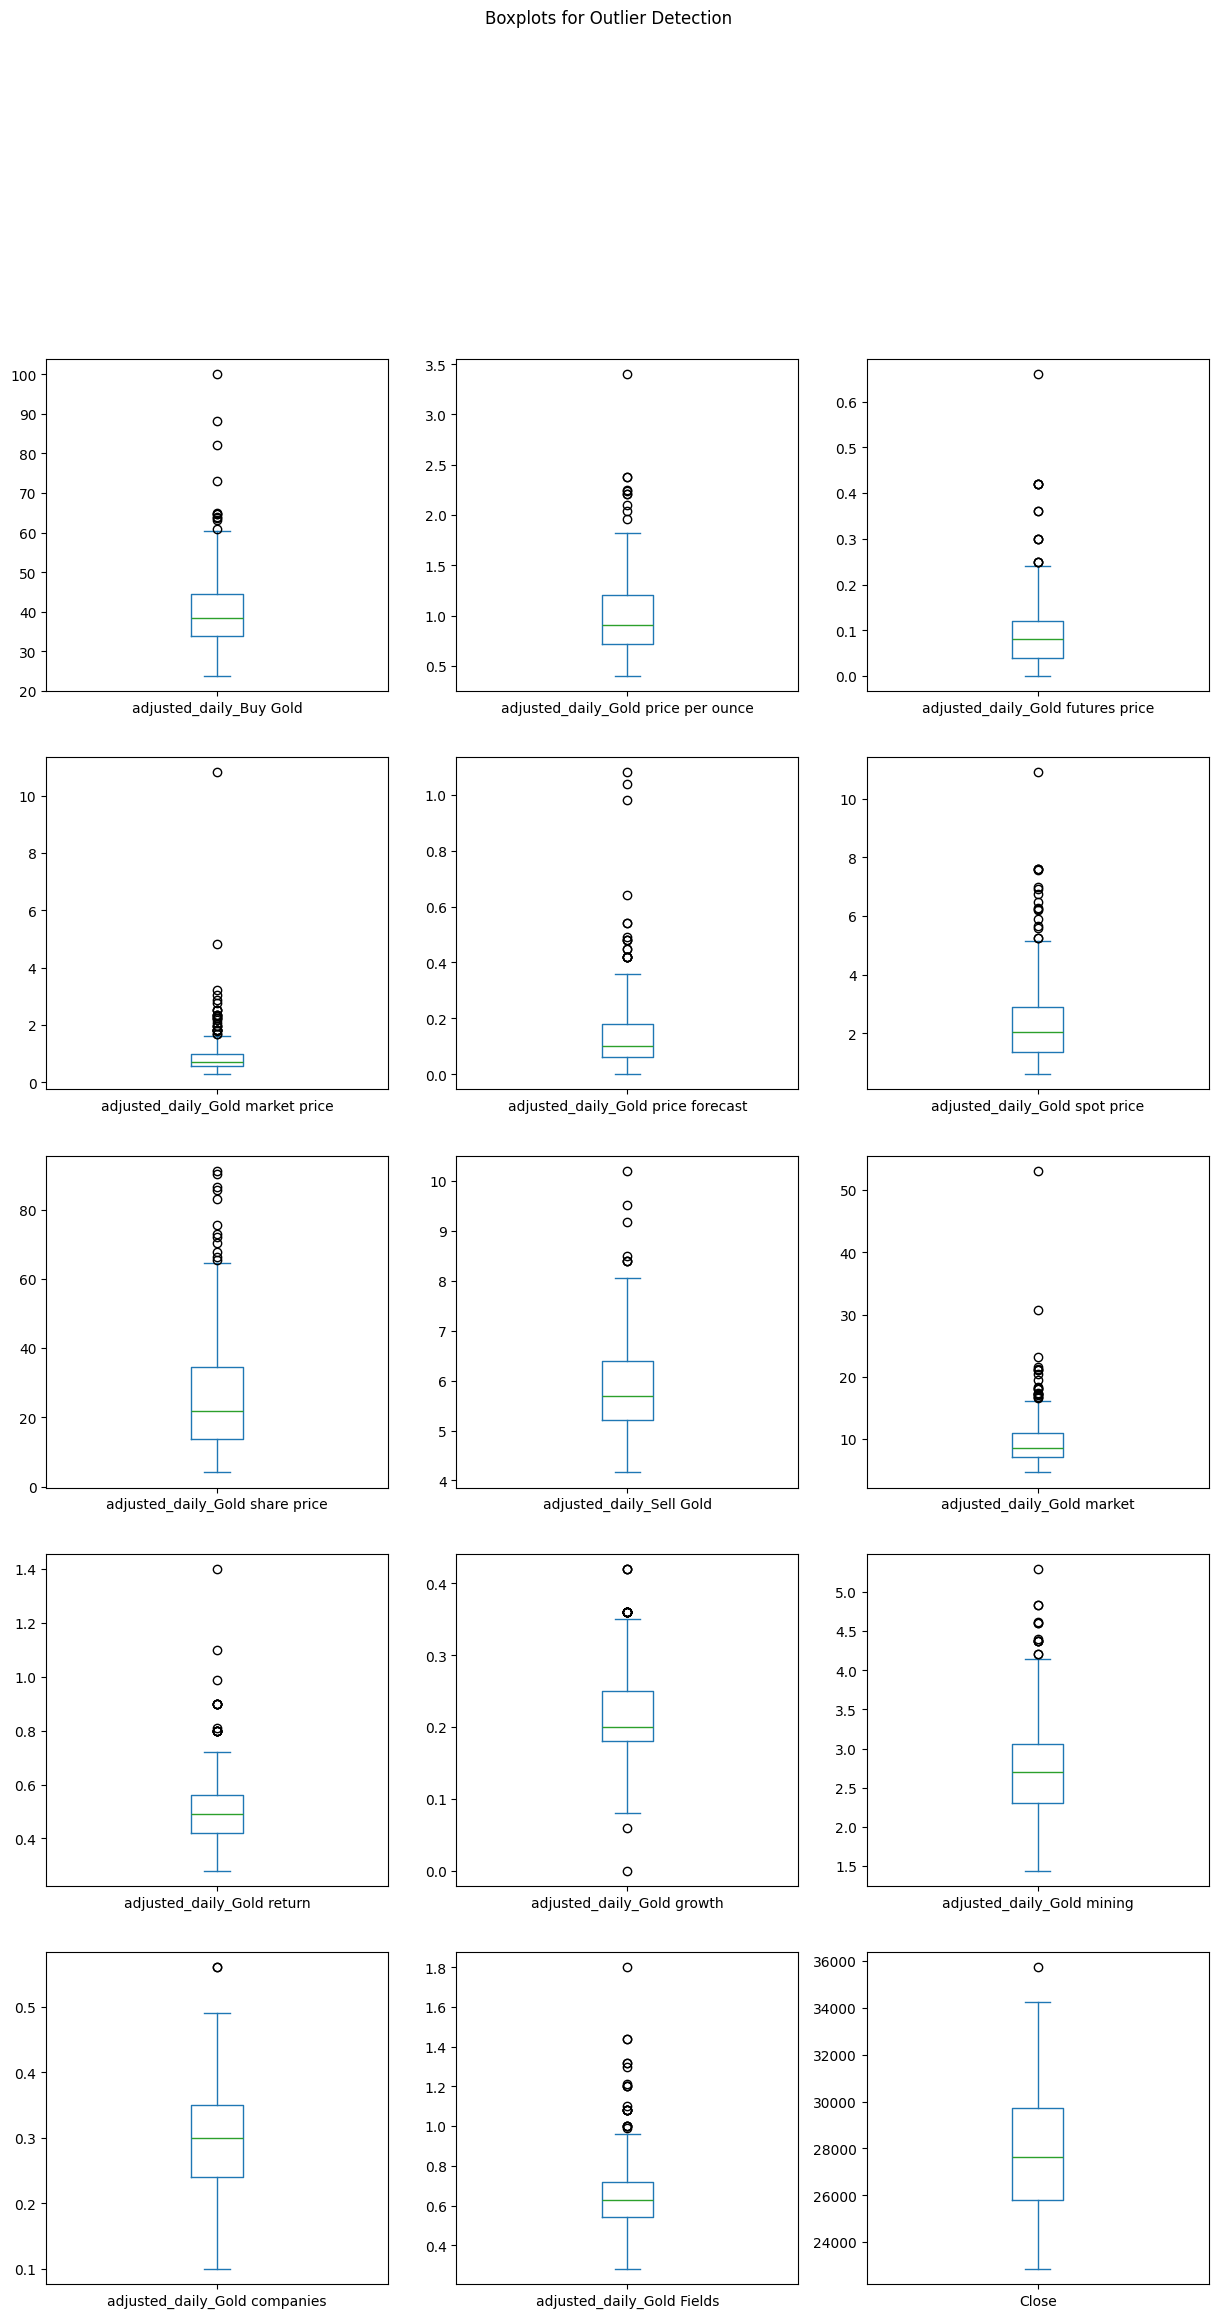

In [ ]:
#DATAFRAME INFO AS TABLE
info_data = []
for col in df.columns:
    info_data.append([col, df[col].count(), df[col].dtype])

df_info = pd.DataFrame(info_data, columns=['Column', 'Non-Null Count', 'Dtype'])
print("DataFrame Info:")
display(df_info.style.set_table_styles(
    [{'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('color', 'black')]}]
))

#DESCRIPTIVE STATISTICS
print("Descriptive Statistics:")
display(df.describe().style.background_gradient(cmap='YlGnBu'))

#CHECK MISSING VALUES

print("Missing Values:")
missing = df.isnull().sum().to_frame('Missing Count')
missing['Missing %'] = (missing['Missing Count'] / len(df)) * 100
display(missing.style.bar(subset=['Missing %'], color='orange'))

#CORRELATION MATRIX
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

#HISTOGRAMS (DISTRIBUTION)
numeric_df = df.select_dtypes(include=[np.number])
num_cols = numeric_df.columns.tolist()
ncols = 3  # number of plots per row
nrows = int(np.ceil(len(num_cols)/ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols,4*nrows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].hist(numeric_df[col], bins=20, color='pink', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# 7. BOX PLOTS (OUTLIERS CHECK)
num_cols = numeric_df.shape[1]
nrows = int(np.ceil(num_cols / 3))
numeric_df.plot(kind='box', subplots=True, layout=(nrows,3), figsize=(15,5*nrows), sharex=False, sharey=False)
plt.suptitle("Boxplots for Outlier Detection", y=1.02)
plt.show()


In [ ]:
# Select numeric columns
num_cols = df.select_dtypes(include='number').columns

# Loop over numeric columns
for col in num_cols:
    print(f"\n=== Column: {col} ===")

    # Line plot
    plt.figure(figsize=(12,4))
    plt.plot(df[col])
    plt.title(f'Line Plot of {col}')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

    # ACF and PACF
    fig, ax = plt.subplots(1,2, figsize=(12,4))
    plot_acf(df[col].dropna(), ax=ax[0], lags=40)
    ax[0].set_title(f'ACF of {col}')
    plot_pacf(df[col].dropna(), ax=ax[1], lags=40)
    ax[1].set_title(f'PACF of {col}')
    plt.tight_layout()
    plt.show()

    # Stationarity test (ADF)
    result = adfuller(df[col].dropna())
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    if result[1] < 0.05:
        print("Series is likely stationary")
    else:
        print("Series is likely non-stationary")

    # Seasonal Decomposition (added this part)
    try:
        decomposition = seasonal_decompose(df[col].dropna(), model='additive', period=12)
        decomposition.plot()
        plt.suptitle(f'Seasonal Decomposition of {col}', y=1.02)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not decompose {col}: {e}")


###**Results of the Explanatory Data Analysis**

This section outlines the dataset employed in the analysis, furnishing a summary of structure, statistical features, completeness and distributional properties. These diagnostics serve the purpose of determining whether the dataset can be trusted and is appropriate for time series modelling.

* **Data Structure and Missing Values-**
The DataFrame information and missing values tables describe the structure of the dataset and demonstrate it is complete and ready for analysis. The dataset contains 365 daily records, depicting a year of data collection. The Google Trends variables are in float64 format. The Date variable is formatted as datetime64[ns], which allowins for a proper reordering for time series alignment. Furthermore, nn terms of completeness of data collection, Google Trends variables dont have any missing values which collectively represent a secured and maintained dataset. The exception would be the stock prices variable "Close" variable which has 117 missing observation which will be important to address in order to remain reliable otherwise it can introduce bias into the predictive modeling.

* **Correlation Matrix-**
This correlation heatmap assesses the strength and direction of linear relationships among all variables. The associations reveal a strong multicollinearity pattern for several variables measuring gold price, demonstrating that their closer association is due to measuring the same underlying asset. In this case, Buy Gold and Sell Gold are perfectly correlated (r=1.00), Gold price per ounce, Gold futures price, and Gold spot price show very strong positive relationships (r=0.88). With high intercorrelations, we confirm internal consistency and  also the potential for redundancy if we included all of these variables into any kind of model. This is where it may be wise to consider certain dimensionality reductions or feature selection so that we are not providing multicollinearity issues into any kind of modeling process. The Close variable is moderately positively correlated with key gold price measures, such as the Gold spot price (r=0.62) and Gold price per ounce (r=0.54), indicating that the company is likely to perform better as the prices for gold goes up more broadly. However, it is worth noting that we see a negative correlation with Buy Gold (r=-0.47), which seems counterintuitive given it's stronger positive correlation with Sell Gold. Further
The other variables such as the Gold return, Gold growth, Gold mining and Gold companies are either weak correlations or zero, which indicates that these measures captures some unique independent dynamics. In this regard, including them may help improve model performance by


* **Histograms-Distributions-**
The histograms show the shape and spread of the dvariables' distributions and reveals insight into skewness and potential for outliers. Most gold price and market variables such as "Buy Gold, Gold price per ounce, Gold futures price, Gold market price, Gold spot price, and Sell Gold " exhibit right-skewed (positively skewed) distributions. This suggests lower price values are more likely to occur than extreme high values and the long tail at the right side of the distribution indicates a potential for outlier values. The Gold growth variable exhibits a distinctly uniform distribution and shows there are multiple distinct phases of gold market growth during the entire sample period. The Close variable also displays a uniform variable which indicates  that there was clustering around several price intervals at the same time point and limited evidence that a single range was prominent. Keywords such as Gold mining, Gold companies and Gold Fields look more symmetrical and approximate a near normal distribution, though they still show signs of moderate skewness. This indicates that indicators are likely more stable and less likely to experience drastic swings than price based indicators. Overall, these distributional patterns highlight non-normality across several key features, reinforcing the need for data transformation and careful model specification to ensure valid statistical inference.

* **Boxplots (Outlier Detection)-**
Every feature has fairly generously-plentiful high-side outliers. This matches the positive skewness that we saw in the histogram. These outliers will unduly exert influence on the training of linear models (e.g. Linear Regression) and distance-based models (e.g. K-Nearest Neighbors). Such extreme values should be dealt with either through data transformations (i.e. log-transforming the highly skewed price variables) or through outlier capping/removal (winsorizing/trimming) prior to model training.

* **Stationarity (ADF Test, ACF, and PACF Analysis)-**
The results of the ADF test demonstrate that all the Google Trends keywords variables are have a p-value less than the 0.05 level of significance therefore, it can be stated  that the series are statistically stationary in their mean and variance. However, the ACF plots show the stock prices variable "Close" to be non-stationary for modeling. Therefore, the Close variable  with a p of 0.0878 will need to be  differenced until true stationarity can be achieved for modeling.

* **Autocorrelation Structure (Model Order Selection)-**
The ACF plots from all variables reveal that slow decay confirms the data is non-stationary. The PACF plots show a spike at lag 1 that is further supported by a significant spike at lag 1 that subsequently cuts off at lag 2 for each variable. This pattern demonstrates consistency across variables, which illustrates an autoregressive of order 1 (AR(1)), and from here we can state ARIMA(1,1,0) of differenced data is an adequate base modeling form.

* **Seasonal Decomposition and Line Plots-**
In line plots, we notice the variability is extreme with some clear outliers occurring, especially during Q2 and Q4, and this indicates we have some heteroscedasticity that will probably need to be accounted for during modeling. In the trend component, we see a consistent cyclical mean reversion and the seasonal component demonstrates a seasonal periodicity that is clearly identifiable, indicating the SARIMA models with seasonal parameters are needed to maintain repeating cycles.




## Addressing Outliers

Number of outliers per numeric column:

adjusted_daily_Buy Gold                11
adjusted_daily_Gold price per ounce    10
adjusted_daily_Gold futures price      13
adjusted_daily_Gold market price       29
adjusted_daily_Gold price forecast     18
adjusted_daily_Gold spot price         17
adjusted_daily_Gold share price        12
adjusted_daily_Sell Gold                7
adjusted_daily_Gold market             21
adjusted_daily_Gold return             17
adjusted_daily_Gold growth             19
adjusted_daily_Gold mining             13
adjusted_daily_Gold companies           2
adjusted_daily_Gold Fields             22
Close                                   1
dtype: int64


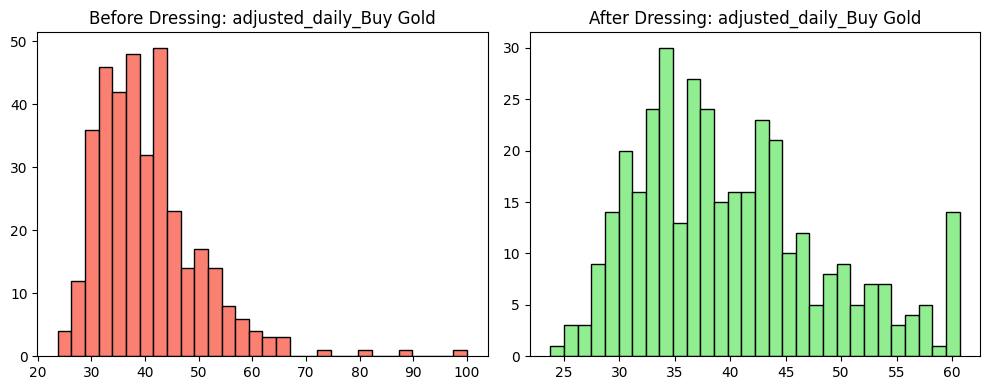

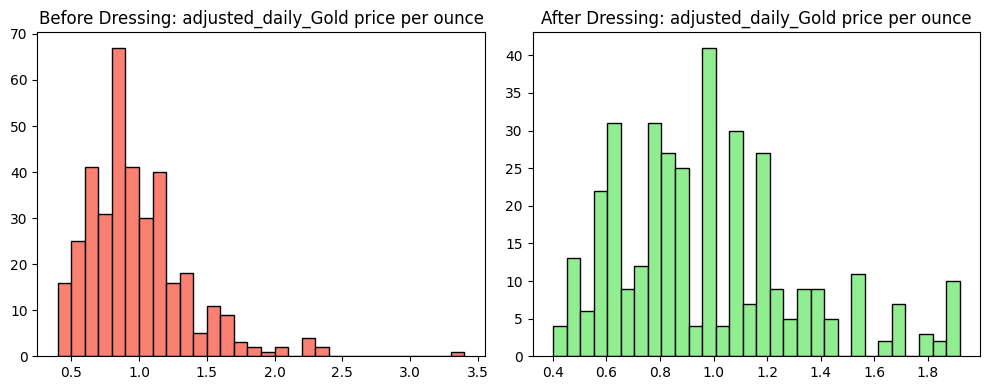

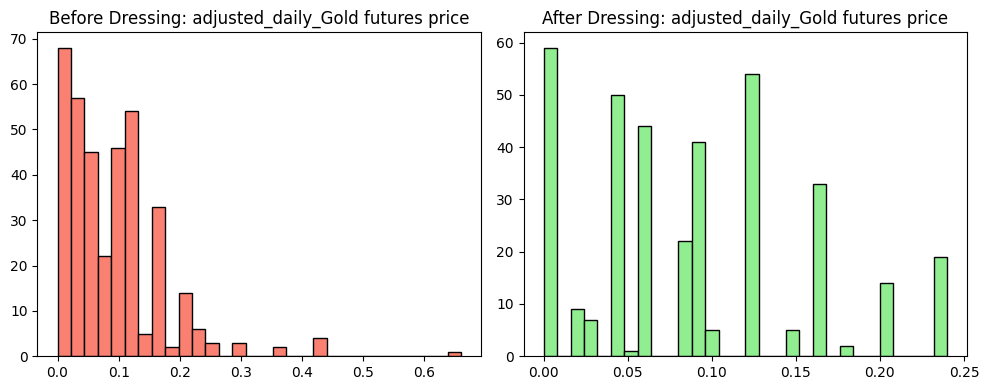

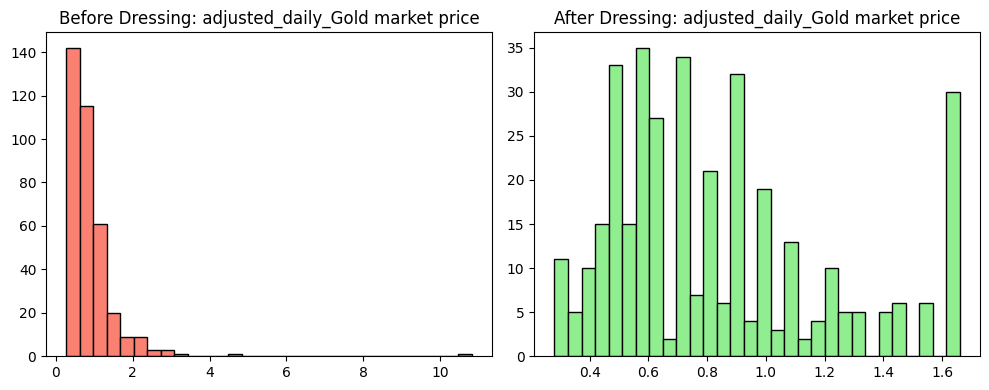

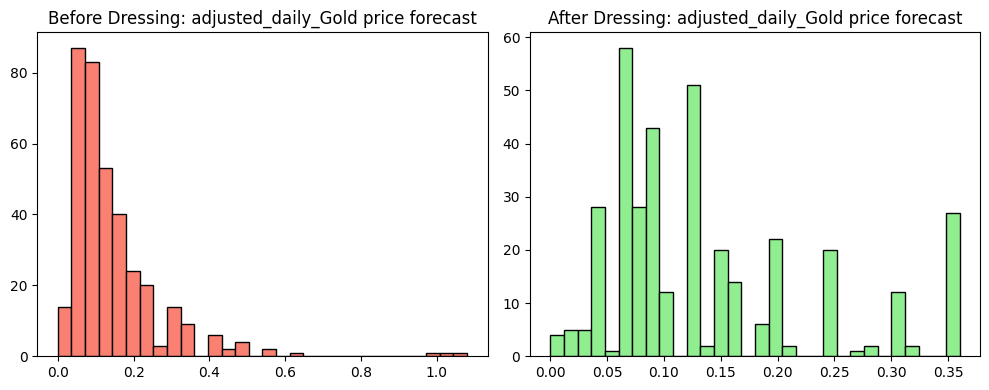

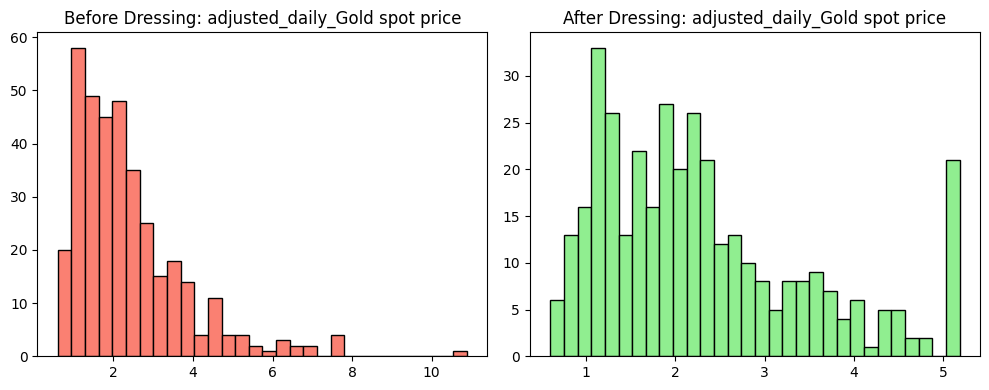

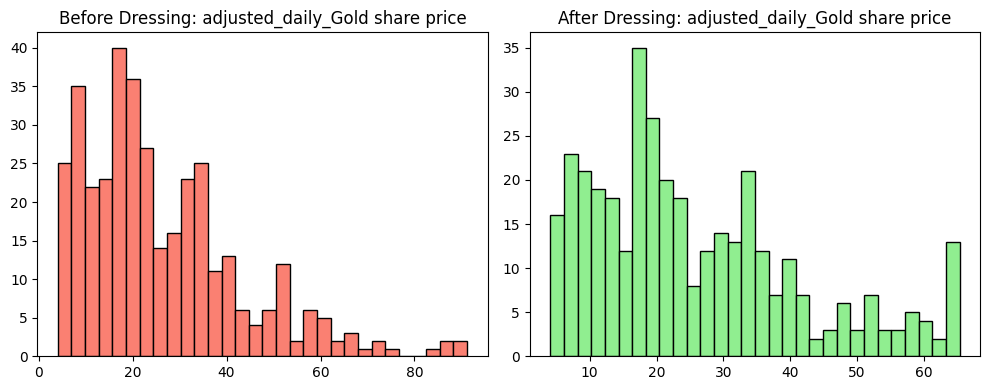

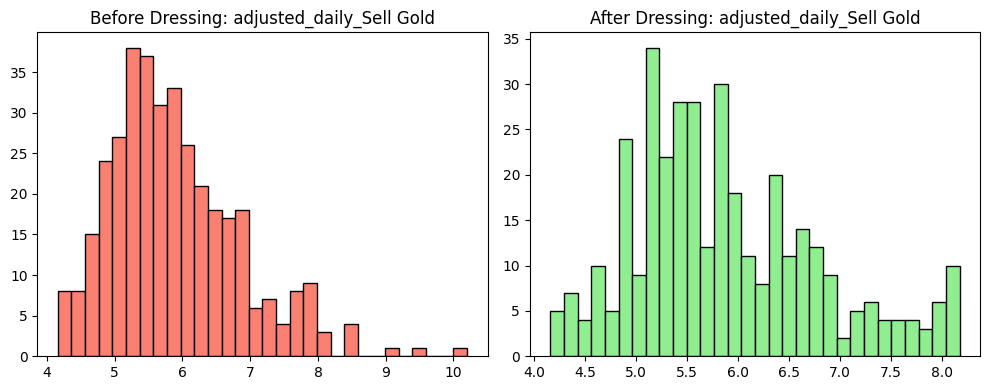

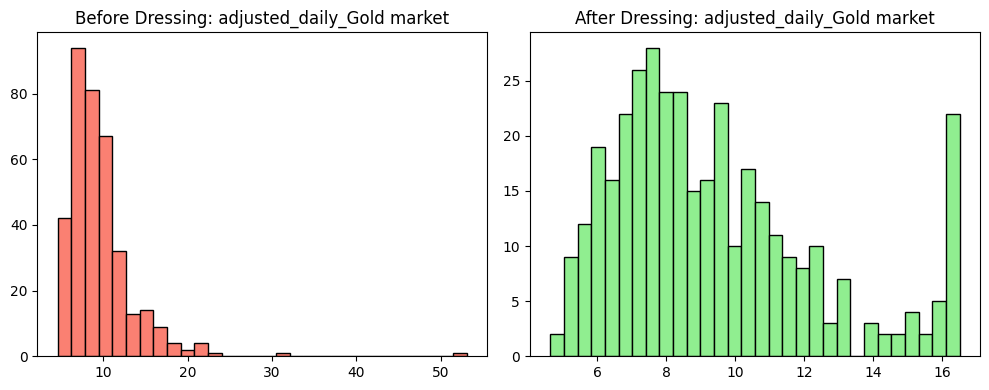

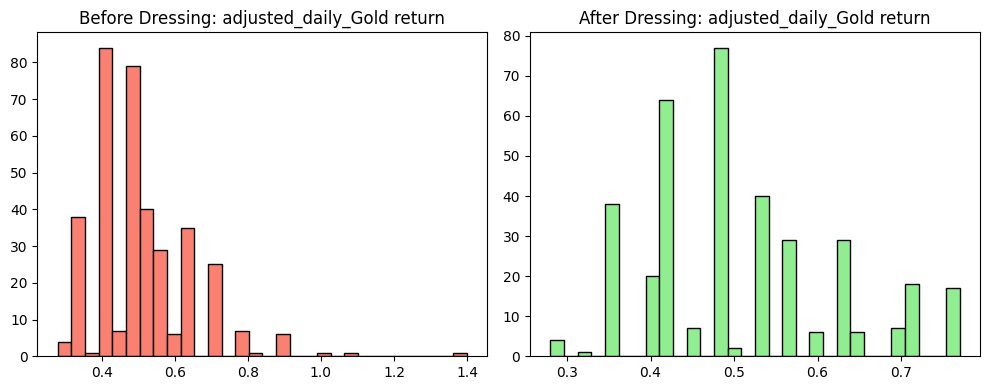

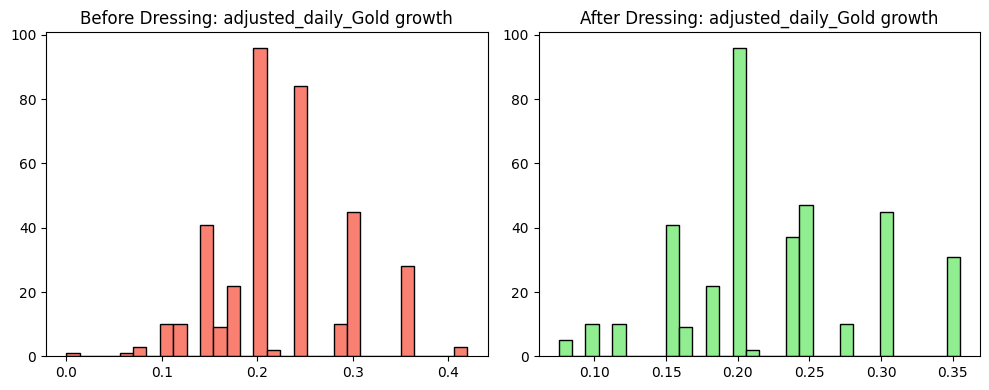

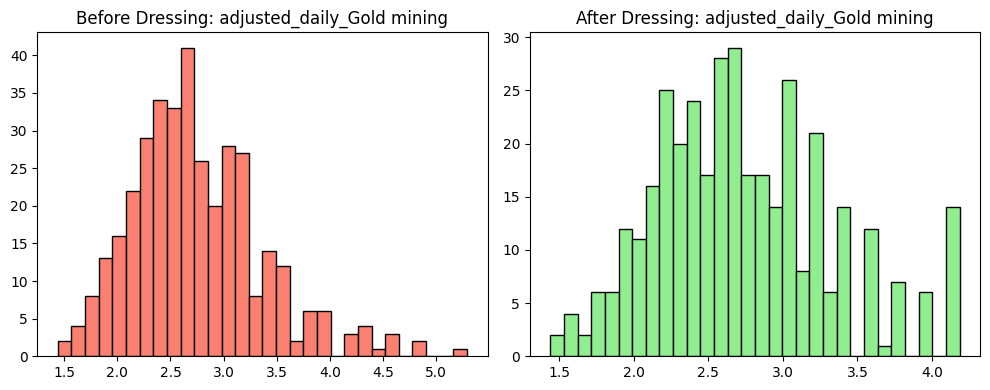

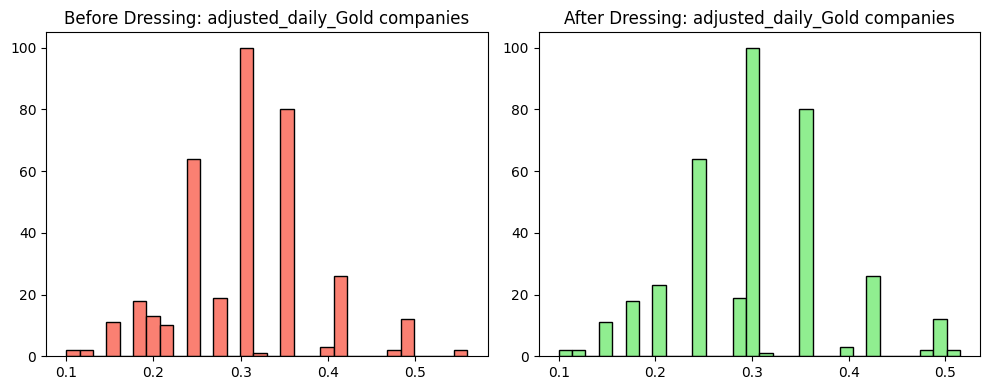

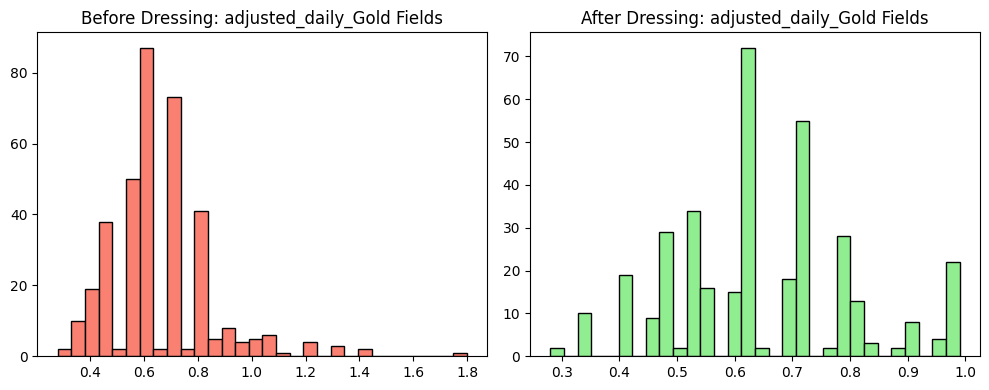

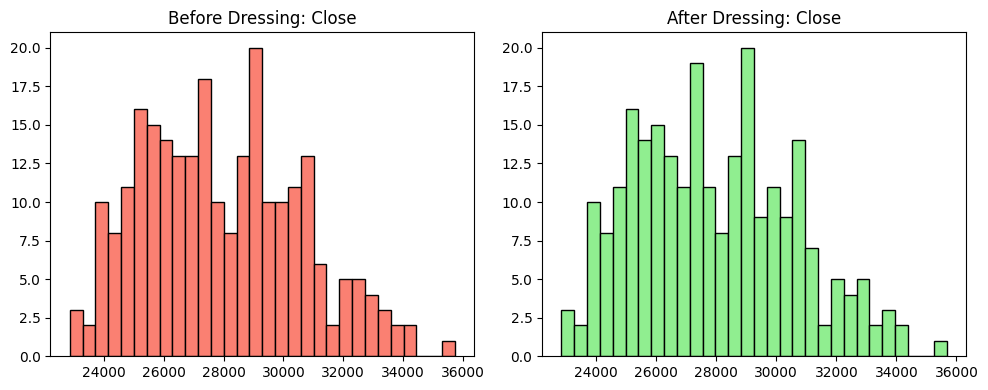

Outlier detection, dressing, and visualization complete. df updated with capped values.


In [ ]:
# Ensure Date column is datetime and set as index
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

#Detect Outliers
def detect_outliers(df, multiplier=1.5):
    """
    Detects outliers in numeric columns using IQR.
    Returns a Series with counts per column.
    """
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    outlier_counts = {}

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - multiplier * IQR
        upper = Q3 + multiplier * IQR
        count = ((df[col] < lower) | (df[col] > upper)).sum()
        outlier_counts[col] = count

    return pd.Series(outlier_counts)

# Show number of outliers per column
outlier_summary = detect_outliers(df)
print("Number of outliers per numeric column:\n")
print(outlier_summary)

#Dress (Cap) Outliers
def dress_outliers(df, multiplier=1.5):
    """
    Caps numeric column outliers using IQR.
    Updates original df in-place.
    """
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - multiplier * IQR
        upper = Q3 + multiplier * IQR

        # Cap outliers
        df[col] = np.where(df[col] < lower, lower, df[col])
        df[col] = np.where(df[col] > upper, upper, df[col])

    return df

# Save original df copy for visual comparison
df_before = df.copy()

# Apply outlier capping
df = dress_outliers(df)

#Visualize Before vs After for each numeric column
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    plt.hist(df_before[col], bins=30, color='salmon', edgecolor='black')
    plt.title(f"Before Dressing: {col}")

    plt.subplot(1,2,2)
    plt.hist(df[col], bins=30, color='lightgreen', edgecolor='black')
    plt.title(f"After Dressing: {col}")

    plt.tight_layout()
    plt.show()

print("Outlier detection, dressing, and visualization complete. df updated with capped values.")


## Adressing Missing Values

In [ ]:
# Ensure Date is datetime and set as index
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

# Function to handle missing values
def fill_missing(df):
    """
    Interpolates numeric columns using time-based interpolation,
    then forward and backward fills remaining NaNs.
    Updates df in-place.
    """
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = df[numeric_cols].interpolate(method='time', limit_direction='both')
    df[numeric_cols] = df[numeric_cols].ffill().bfill()
    return df

# Apply missing value handling
df = fill_missing(df)

# Print missing values after
print("Missing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
adjusted_daily_Buy Gold                0
adjusted_daily_Gold price per ounce    0
adjusted_daily_Gold futures price      0
adjusted_daily_Gold market price       0
adjusted_daily_Gold price forecast     0
adjusted_daily_Gold spot price         0
adjusted_daily_Gold share price        0
adjusted_daily_Sell Gold               0
adjusted_daily_Gold market             0
adjusted_daily_Gold return             0
adjusted_daily_Gold growth             0
adjusted_daily_Gold mining             0
adjusted_daily_Gold companies          0
adjusted_daily_Gold Fields             0
Close                                  0
dtype: int64


In [ ]:
df.isnull().values.any()

np.False_

##Addressing Non Stationarity of The Variable 'Close'

In [ ]:
# Function to fill missing values
def smart_fill(series):
    return series.interpolate(method='time', limit_direction='both').ffill().bfill()

# List of non-stationary series
non_stationary = []

# Exclude 'Date' column
columns = [c for c in df.columns if c.lower() != 'date']

# Check stationarity of original series
adf_results = []

for col in columns:
    s = pd.to_numeric(df[col], errors='coerce')
    s = smart_fill(s)
    try:
        result = adfuller(s)
        adf_results.append({
            "Series": col,
            "Test Statistic": result[0],
            "p-value": result[1],
            "Stationary": "Yes" if result[1] <= 0.05 else "No"
        })
        if result[1] > 0.05:
            non_stationary.append(col)
    except Exception as e:
        adf_results.append({
            "Series": col,
            "Test Statistic": None,
            "p-value": None,
            "Stationary": f"ADF test failed: {e}"
        })

# Show original ADF test results in a table
adf_df = pd.DataFrame(adf_results)
print("ADF Test Results for Original Series:\n")
display(adf_df)  # Use display() in Colab for nice table formatting

# Create percentage change series for non-stationary series
for col in non_stationary:
    df[col + "_pct"] = df[col].pct_change()

# Check stationarity of percentage change series
pct_adf_results = []

for col in non_stationary:
    s = smart_fill(df[col + "_pct"])
    try:
        result = adfuller(s)
        pct_adf_results.append({
            "Series": col + "_pct",
            "Test Statistic": result[0],
            "p-value": result[1],
            "Stationary": "Yes" if result[1] <= 0.05 else "No"
        })
    except Exception as e:
        pct_adf_results.append({
            "Series": col + "_pct",
            "Test Statistic": None,
            "p-value": None,
            "Stationary": f"ADF test failed: {e}"
        })

# Show ADF test results for pct_change series
pct_adf_df = pd.DataFrame(pct_adf_results)
print("\nADF Test Results for Percentage Change Series:\n")
display(pct_adf_df)


ADF Test Results for Original Series:



Series  Test Statistic   p-value Stationary
0               adjusted_daily_Buy Gold       -3.757658  0.003371        Yes
1   adjusted_daily_Gold price per ounce       -3.039006  0.031409        Yes
2     adjusted_daily_Gold futures price       -3.562878  0.006512        Yes
3      adjusted_daily_Gold market price       -4.174741  0.000727        Yes
4    adjusted_daily_Gold price forecast       -3.781126  0.003106        Yes
5        adjusted_daily_Gold spot price       -3.330129  0.013584        Yes
6       adjusted_daily_Gold share price       -3.481334  0.008480        Yes
7              adjusted_daily_Sell Gold       -3.621339  0.005366        Yes
8            adjusted_daily_Gold market       -3.874279  0.002233        Yes
9            adjusted_daily_Gold return       -3.787223  0.003041        Yes
10           adjusted_daily_Gold growth       -3.330631  0.013564        Yes
11           adjusted_daily_Gold mining       -2.833530  0.053641         No
12        adjusted_daily_Gold companies       -3.127974  0.024551        Yes
13           adjusted_daily_Gold Fields       -3.794906  0.002960        Yes
14                                Close       -2.428780  0.133778         No


ADF Test Results for Percentage Change Series:



Series  Test Statistic       p-value Stationary
0  adjusted_daily_Gold mining_pct       -5.654608  9.685136e-07        Yes
1                       Close_pct      -16.424453  2.512401e-29        Yes

##Creating a Dataframe Of Stationary Variables


In [ ]:
# Helper function to fill missing values smoothly using time interpolation
def smart_fill(series):
    # Fill missing values based on time, both forward and backward
    return series.interpolate(method='time', limit_direction='both').ffill().bfill()


# Start preparing and testing for stationarity
df_copy = df.copy()

# Make sure there's a 'Date' column — if not, use the index as the date
if 'Date' not in df_copy.columns and df_copy.index.name == 'Date':
    df_copy['Date'] = df_copy.index

# Identify all columns except 'Date'
columns = [c for c in df_copy.columns if c.lower() != 'date']

stationary_cols = []

# Check each column to see if it's already stationary
for col in columns:
    s = pd.to_numeric(df_copy[col], errors='coerce')
    s = smart_fill(s)
    try:
        result = adfuller(s)
        if result[1] <= 0.05:
            stationary_cols.append(col)
    except Exception as e:
        print(f"ADF test failed for {col}: {e}")

# Identify non-stationary columns
non_stationary = [c for c in columns if c not in stationary_cols]

# Try to make non-stationary columns stationary by differencing
for col in non_stationary:
    df_copy[col + "_pct"] = df_copy[col].pct_change()
    s_pct = smart_fill(df_copy[col + "_pct"])
    try:
        result = adfuller(s_pct)
        if result[1] <= 0.05:
            stationary_cols.append(col + "_pct")
            print(f"{col}_pct became stationary | p-value: {result[1]:.4f}")
        else:
            print(f"{col}_pct still not stationary | p-value: {result[1]:.4f}")
    except Exception as e:
        print(f"ADF test failed for {col}_pct: {e}")

# Remove duplicates from stationary column list
stationary_cols = list(dict.fromkeys(stationary_cols))

# Apply smart_fill again to all stationary columns to make sure they’re clean
for col in stationary_cols:
    df_copy[col] = smart_fill(df_copy[col])

# Create a new dataframe with only the Date column and stationary variables
df_stationary = df_copy[['Date'] + stationary_cols].copy()

# Display a summary of which columns are included
print("Stationary columns included in new dataframe:")
print(['Date'] + stationary_cols)

# Show the first 10 rows for a quick check
print(df_stationary.head(10))


adjusted_daily_Gold mining_pct became stationary | p-value: 0.0000
Close_pct became stationary | p-value: 0.0000
Stationary columns included in new dataframe:
['Date', 'adjusted_daily_Buy Gold', 'adjusted_daily_Gold price per ounce', 'adjusted_daily_Gold futures price', 'adjusted_daily_Gold market price', 'adjusted_daily_Gold price forecast', 'adjusted_daily_Gold spot price', 'adjusted_daily_Gold share price', 'adjusted_daily_Sell Gold', 'adjusted_daily_Gold market', 'adjusted_daily_Gold return', 'adjusted_daily_Gold growth', 'adjusted_daily_Gold companies', 'adjusted_daily_Gold Fields', 'adjusted_daily_Gold mining_pct', 'Close_pct']
                 Date  adjusted_daily_Buy Gold  \
Date                                             
2023-12-31 2023-12-31                    40.32   
2024-01-01 2024-01-01                    39.60   
2024-01-02 2024-01-02                    44.64   
2024-01-03 2024-01-03                    39.60   
2024-01-04 2024-01-04                    39.60   
2024-01-

In [ ]:
# Tell pandas to show all columns when printing a DataFrame
pd.set_option('display.max_columns', None)

# Print the first 3 rows of the stationary dataframe to quickly check the data
print(df_stationary.head(3))

                 Date  adjusted_daily_Buy Gold  \
Date                                             
2023-12-31 2023-12-31                    40.32   
2024-01-01 2024-01-01                    39.60   
2024-01-02 2024-01-02                    44.64   

            adjusted_daily_Gold price per ounce  \
Date                                              
2023-12-31                                 1.20   
2024-01-01                                 0.96   
2024-01-02                                 1.20   

            adjusted_daily_Gold futures price  \
Date                                            
2023-12-31                               0.00   
2024-01-01                               0.03   
2024-01-02                               0.09   

            adjusted_daily_Gold market price  \
Date                                           
2023-12-31                              0.55   
2024-01-01                              1.10   
2024-01-02                              0.99   

      

##Handling Missing Values Of The Variable "Close"

In [ ]:
# --- Helper function to fill missing values smoothly ---
def smart_fill(series, index=None):
    # If an index (like a Date column) is provided, align the series with it
    if index is not None:
        series = series.set_axis(index)
        # Interpolate missing values over time, then forward and backward fill any remaining gaps
        series = series.interpolate(method='time', limit_direction='both').ffill().bfill()
    else:
        # If no index is given, just fill missing values forward and backward
        series = series.interpolate(limit_direction='both').ffill().bfill()
    return series


# Get a list of all numeric columns in the dataframe
numeric_cols = df_stationary.select_dtypes(include=['float64', 'int64']).columns

# Loop through each numeric column to clean up missing values
for col in numeric_cols:
    # If the dataframe has a 'Date' column, use it as the index for time-based interpolation
    if 'Date' in df_stationary.columns:
        idx = pd.to_datetime(df_stationary['Date'])
        df_stationary[col] = smart_fill(df_stationary[col], index=idx).values
    else:
        # Otherwise, just fill the column without time-based interpolation
        df_stationary[col] = smart_fill(df_stationary[col]).values


# Make sure all columns are shown when printing
pd.set_option('display.max_columns', None)

# Display the first 10 rows to check if the missing values were filled correctly
print(df_stationary.head(10))


                 Date  adjusted_daily_Buy Gold  \
Date                                             
2023-12-31 2023-12-31                    40.32   
2024-01-01 2024-01-01                    39.60   
2024-01-02 2024-01-02                    44.64   
2024-01-03 2024-01-03                    39.60   
2024-01-04 2024-01-04                    39.60   
2024-01-05 2024-01-05                    42.48   
2024-01-06 2024-01-06                    42.48   
2024-01-07 2024-01-07                    42.88   
2024-01-08 2024-01-08                    37.52   
2024-01-09 2024-01-09                    30.15   

            adjusted_daily_Gold price per ounce  \
Date                                              
2023-12-31                                 1.20   
2024-01-01                                 0.96   
2024-01-02                                 1.20   
2024-01-03                                 1.20   
2024-01-04                                 1.32   
2024-01-05                                

In [ ]:
# Make a copy of the stationary dataframe
df_clean = df_stationary.copy()

# Create a percentage change column if it doesn't exist yet
if 'Close_pct' not in df_clean.columns:
    df_clean['Close_pct'] = df_clean['Close'].pct_change()

# Convert the 'Date' column to datetime and set it as the index (if it exists)
if 'Date' in df_clean.columns:
    df_clean['Date'] = pd.to_datetime(df_clean['Date'])
    df_clean.set_index('Date', inplace=True)

# Fix: remove duplicate *columns* instead of rows
df_clean = df_clean.loc[:, ~df_clean.columns.duplicated()]

# Select numeric columns for interpolation
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns

# Interpolate missing values depending on the index type
if pd.api.types.is_datetime64_any_dtype(df_clean.index):
    df_clean[numeric_cols] = df_clean[numeric_cols].interpolate(method='time', limit_direction='both')
else:
    df_clean[numeric_cols] = df_clean[numeric_cols].interpolate(method='linear', limit_direction='both')

# Fill any remaining NaNs
df_clean[numeric_cols] = df_clean[numeric_cols].ffill().bfill()

# Show the first 10 rows
pd.set_option('display.max_columns', None)
print(df_clean.head(10))


            adjusted_daily_Buy Gold  adjusted_daily_Gold price per ounce  \
Date                                                                       
2023-12-31                    40.32                                 1.20   
2024-01-01                    39.60                                 0.96   
2024-01-02                    44.64                                 1.20   
2024-01-03                    39.60                                 1.20   
2024-01-04                    39.60                                 1.32   
2024-01-05                    42.48                                 1.20   
2024-01-06                    42.48                                 1.20   
2024-01-07                    42.88                                 0.99   
2024-01-08                    37.52                                 0.99   
2024-01-09                    30.15                                 1.10   

            adjusted_daily_Gold futures price  \
Date                                  

In [ ]:
df_stationary.isnull().values.any()

np.False_

# **Section 2: Lead-Lag Cross Correlation Analysis**

This section focuses on the temporal relationships between the stock prices  and Google Trends keywords using lead-lag correlations and Granger causality.
It also identifies and removes redundant features to create a clean, lag-aligned dataset for reliable time series modeling following this sequence of subsections:

* **The Lead-Lag Correlation-**
Cross-correlations are computed between the stock prices variable and Google Trends keywords. Top correlations and the lag at which they occur are identified and visualized.
This helps determine which variables lead or lag the target for further analysis.

* **Granger Causality Test-**
Granger causality is applied to check if past values of one variable predict the target.
The function handles missing values, duplicates, and calculates best lags and p-values.
It identifies statistically significant predictive relationships among stationary variables.

* **Interpretation of the Granger Causality Results-**
Significant causality relationships are highlighted with their corresponding lags and p-values.
This shows which variables have predictive power over the target variable.

* **Cross-Correlation to Reduce Redundancy-**
Highly correlated predictor pairs of the Google Trends keywords are identified. Correlation with the target is used to decide which variable to drop from each pair.
This step reduces multicollinearity and simplifies the dataset.

* **Results of Correlation Redundancy-**
A summary table lists pairs of highly correlated variables and which were dropped. This provides transparency on feature selection and justifies which variables are retained. It ensures that the remaining predictors are not redundant while preserving information.

* **Creating a DataFrame That Excludes Redundant Variables-**
The dataset is updated by removing the weaker or redundant features. Only columns with meaningful variation and predictive potential are retained.
This produces a cleaner dataset suitable for modeling and Granger causality testing.

* **New Dataset with the Correct Lags-**
Lagged versions of variables are created according to previous correlation and Granger results.
The dataset includes all selected predictors aligned with the target variable. This final dataset is the one to be employed for causal modeling or predictive analysis with proper temporal alignment.



In [ ]:
# Go through each column in the dataframe
for col in df.columns:
    val = df[col]  # Get the current column values

    # Check if the column is a DataFrame (sometimes happens if data expands unintentionally)
    if isinstance(val, pd.DataFrame):
        # If it’s just a single column DataFrame, convert it to a Series
        if val.shape[1] == 1:
            val = val.squeeze()
        else:
            # Skip multi-column DataFrames and print a warning
            print(f"Skipping multi-column DataFrame column: {col}")
            continue

    # Skip columns that contain lists or arrays within their cells
    if val.apply(lambda x: isinstance(x, (list, np.ndarray))).any():
        print(f"Skipping column with list/array entries: {col}")
        continue

    # Try converting the column to numeric; any errors will be set as NaN
    val = pd.to_numeric(val, errors='coerce')

    # Fill any missing values smoothly using the smart_fill function
    df[col] = smart_fill(val)



=== Cross-Correlation: Close_pct vs adjusted_daily_Buy Gold ===

Top 5 absolute correlations:
    Lag  Correlation
26    6    -0.195759
33   13    -0.193699
32   12    -0.185284
31   11    -0.181718
27    7    -0.172209


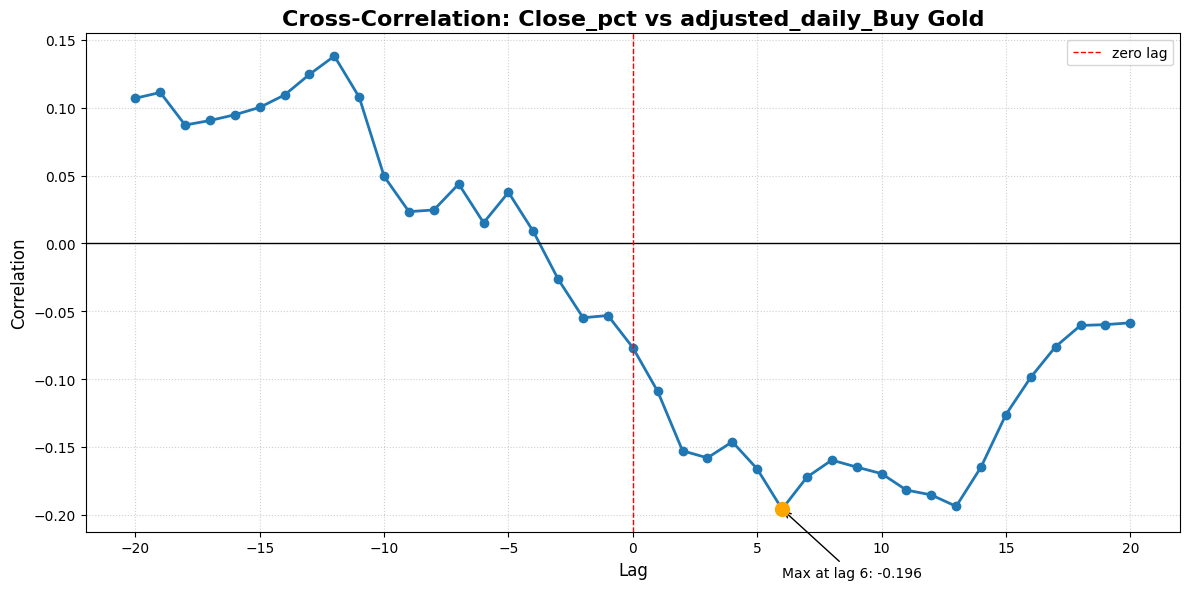


=== Cross-Correlation: Close_pct vs adjusted_daily_Gold price per ounce ===

Top 5 absolute correlations:
    Lag  Correlation
37   17    -0.132369
25    5    -0.131190
26    6    -0.122355
24    4    -0.115634
30   10    -0.108281


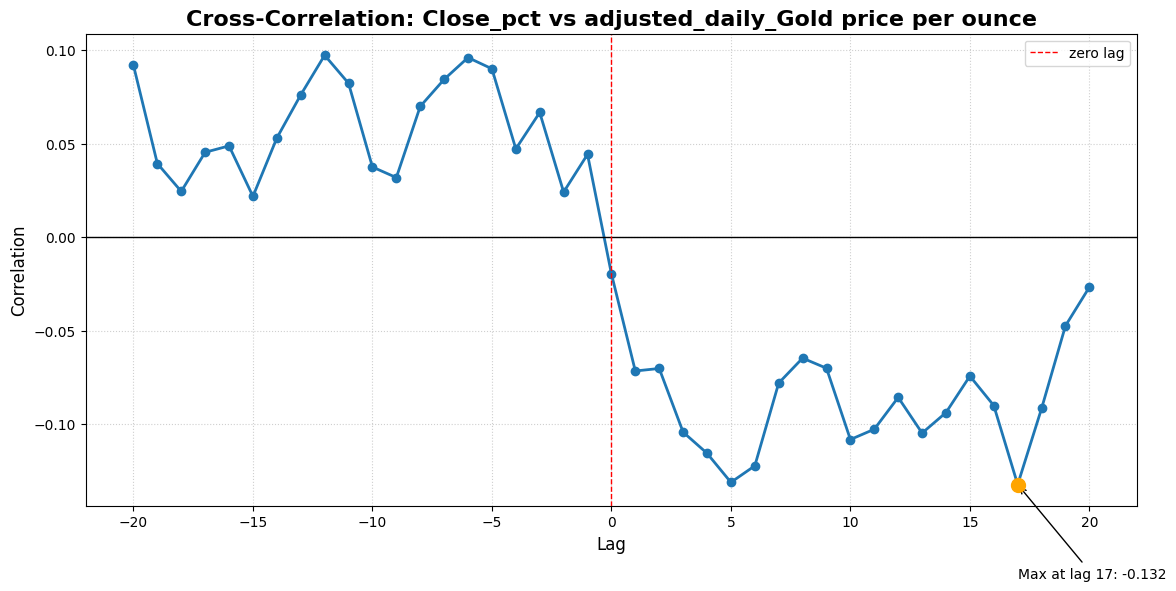


=== Cross-Correlation: Close_pct vs adjusted_daily_Gold futures price ===

Top 5 absolute correlations:
    Lag  Correlation
37   17    -0.183497
23    3    -0.139868
30   10    -0.134347
38   18    -0.130799
26    6    -0.123036


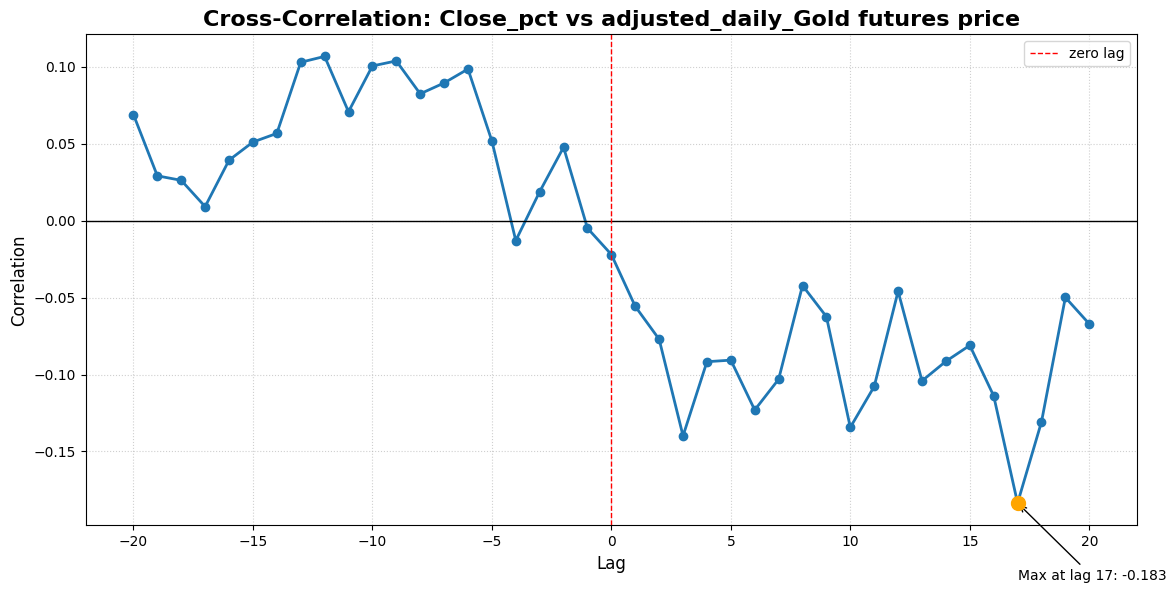


=== Cross-Correlation: Close_pct vs adjusted_daily_Gold market price ===

Top 5 absolute correlations:
    Lag  Correlation
38   18    -0.133604
37   17    -0.118807
23    3    -0.118029
27    7    -0.111341
26    6    -0.110719


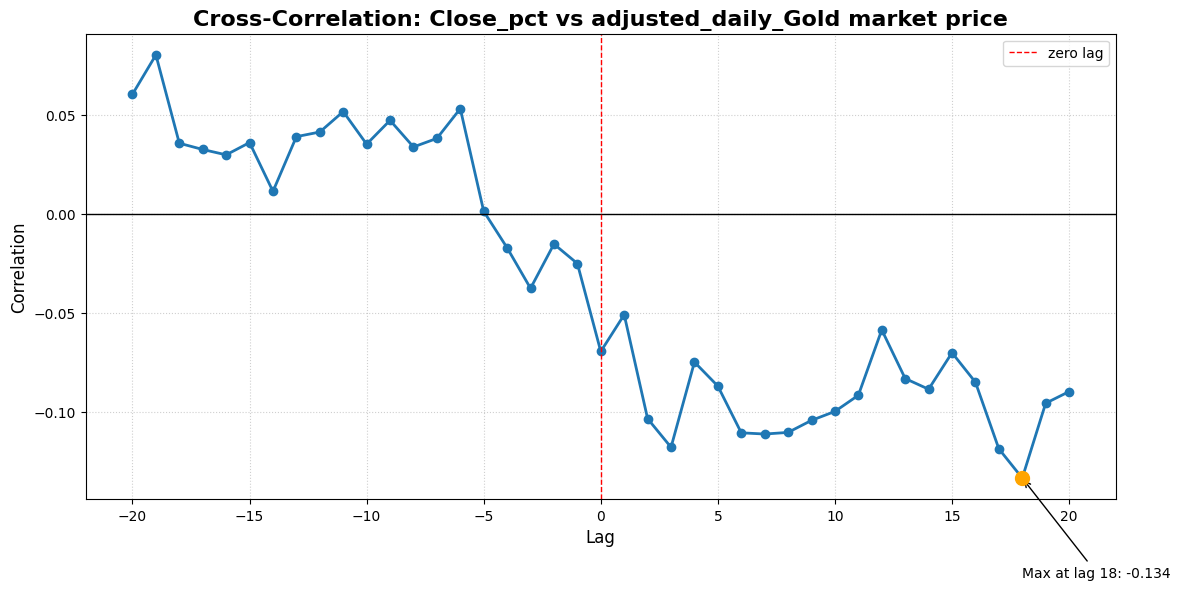


=== Cross-Correlation: Close_pct vs adjusted_daily_Gold price forecast ===

Top 5 absolute correlations:
    Lag  Correlation
15   -5     0.158446
30   10    -0.143667
31   11    -0.143583
32   12    -0.142879
23    3    -0.133722


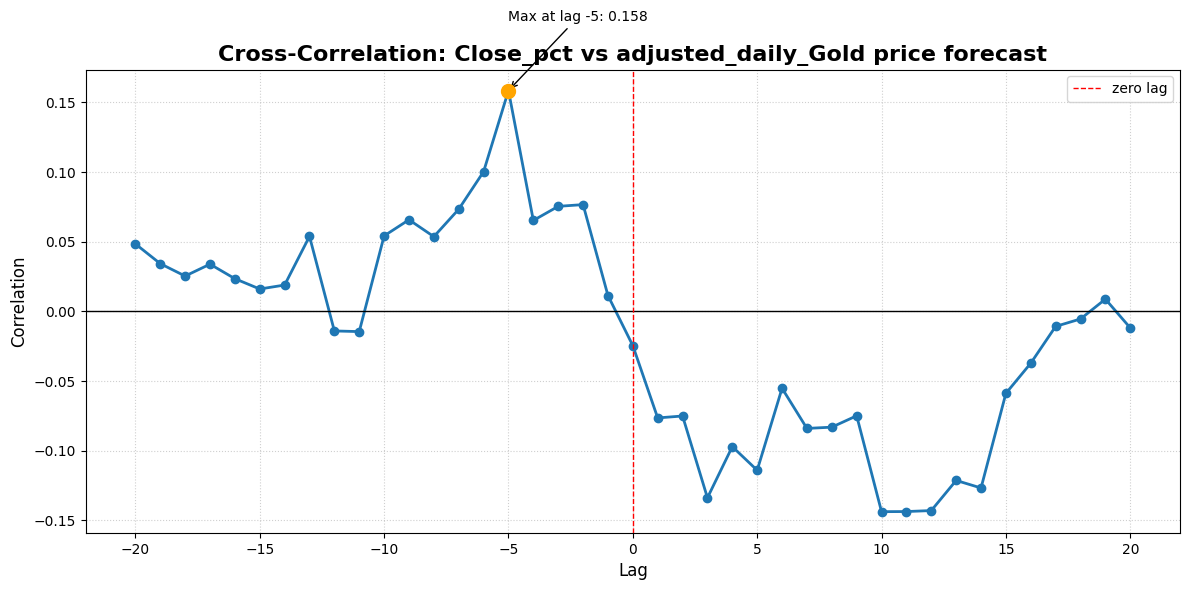


=== Cross-Correlation: Close_pct vs adjusted_daily_Gold spot price ===

Top 5 absolute correlations:
    Lag  Correlation
15   -5     0.142206
14   -6     0.136095
12   -8     0.130450
13   -7     0.125046
30   10    -0.123894


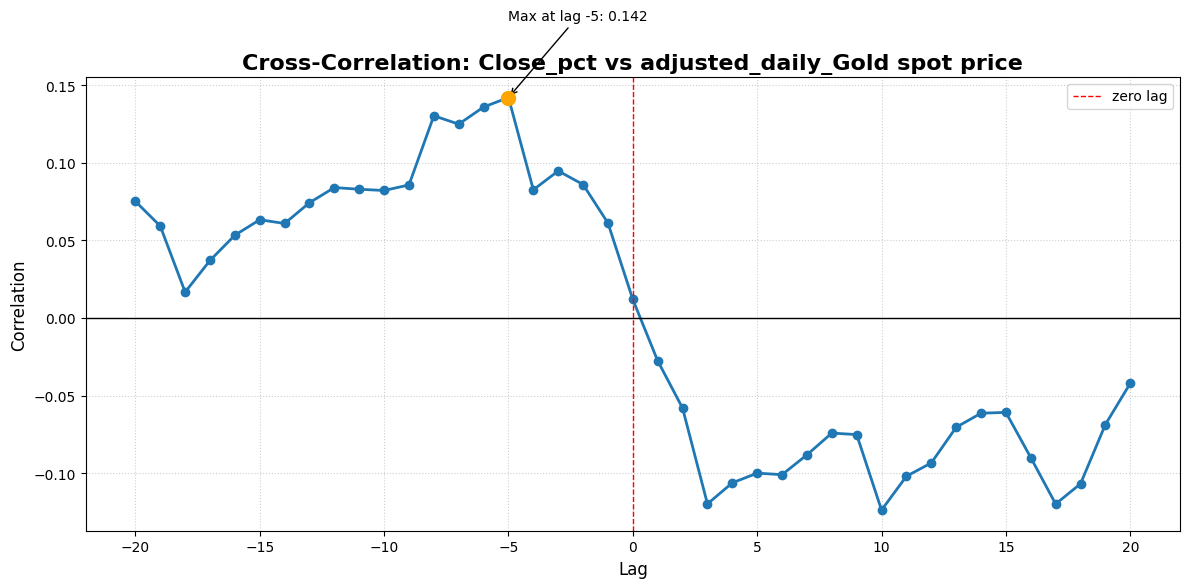


=== Cross-Correlation: Close_pct vs adjusted_daily_Gold share price ===

Top 5 absolute correlations:
    Lag  Correlation
30   10    -0.144189
37   17    -0.139227
23    3    -0.125648
34   14    -0.106649
38   18    -0.102914


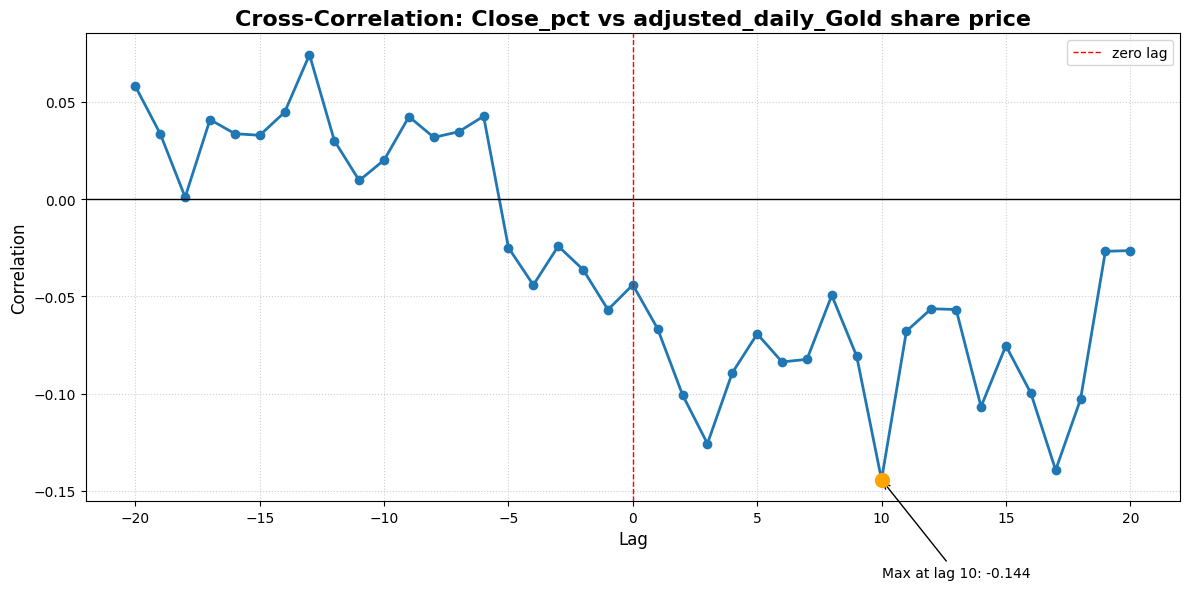


=== Cross-Correlation: Close_pct vs adjusted_daily_Sell Gold ===

Top 5 absolute correlations:
    Lag  Correlation
30   10    -0.203949
32   12    -0.192486
31   11    -0.190772
33   13    -0.163103
26    6    -0.163058


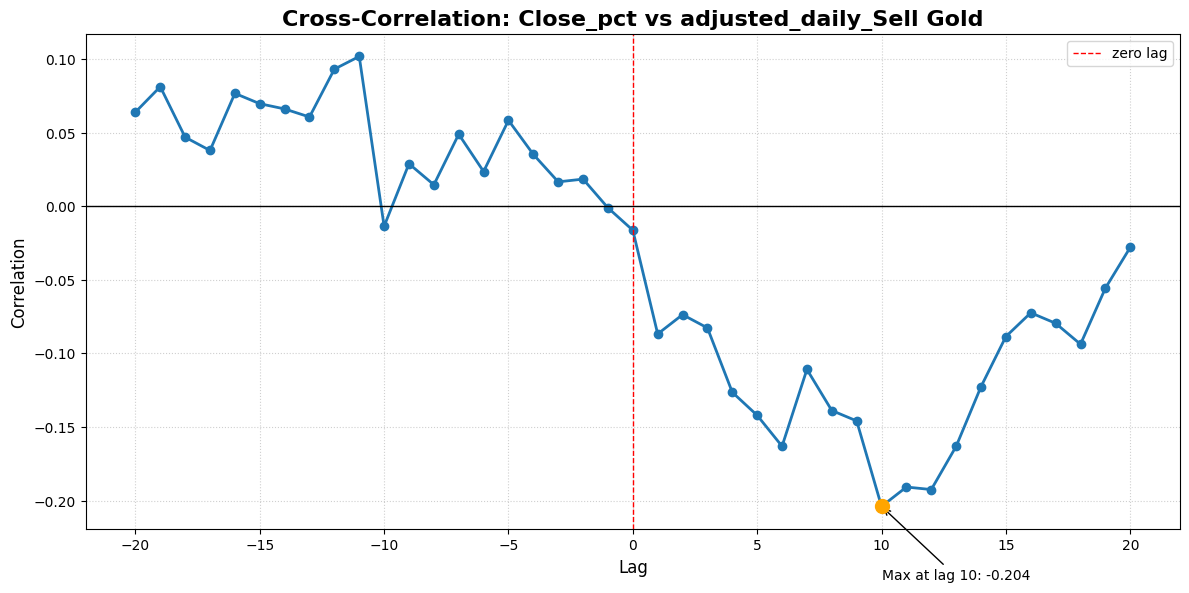


=== Cross-Correlation: Close_pct vs adjusted_daily_Gold market ===

Top 5 absolute correlations:
    Lag  Correlation
37   17    -0.137335
38   18    -0.121872
36   16    -0.121507
26    6    -0.114573
30   10    -0.114369


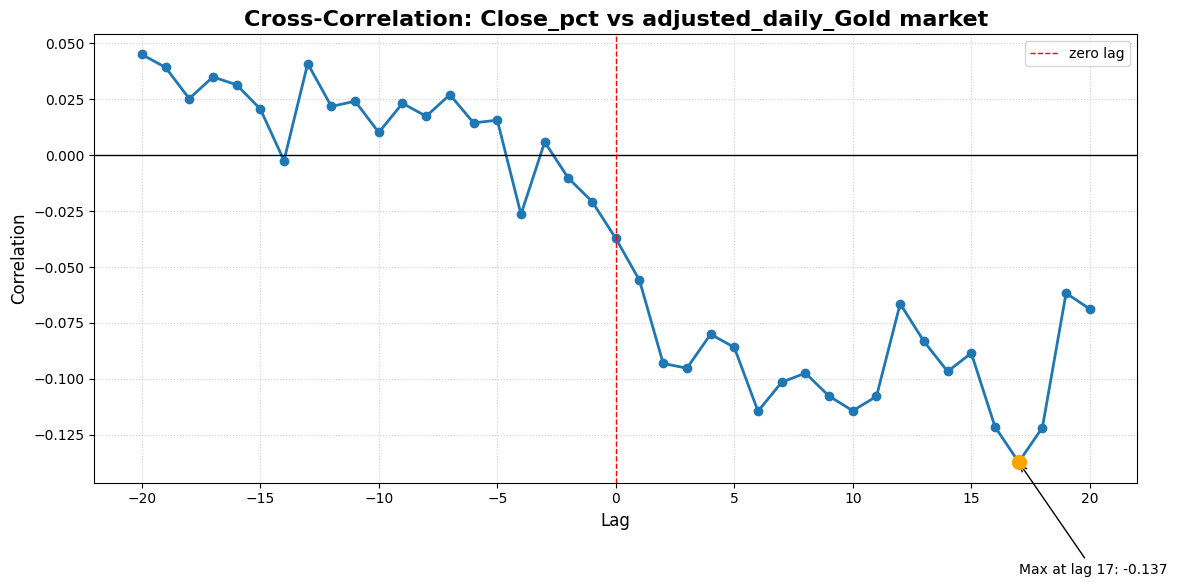


=== Cross-Correlation: Close_pct vs adjusted_daily_Gold return ===

Top 5 absolute correlations:
    Lag  Correlation
30   10    -0.234980
32   12    -0.217269
31   11    -0.214001
33   13    -0.187402
29    9    -0.173671


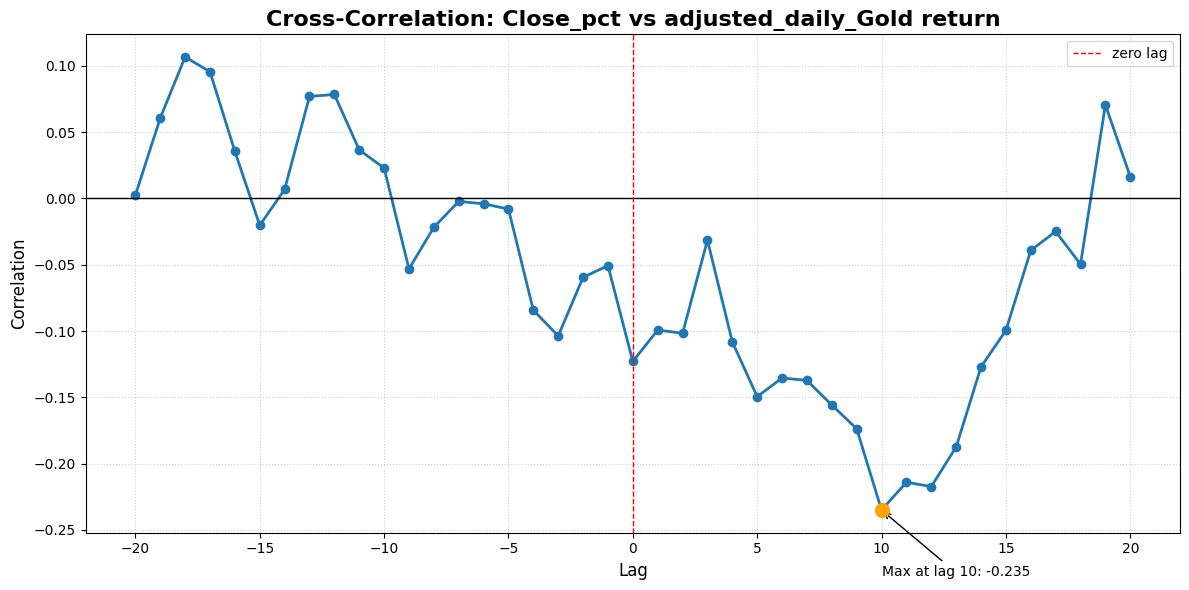


=== Cross-Correlation: Close_pct vs adjusted_daily_Gold growth ===

Top 5 absolute correlations:
    Lag  Correlation
21    1    -0.115699
24    4    -0.109639
32   12    -0.102534
29    9    -0.098792
22    2    -0.081810


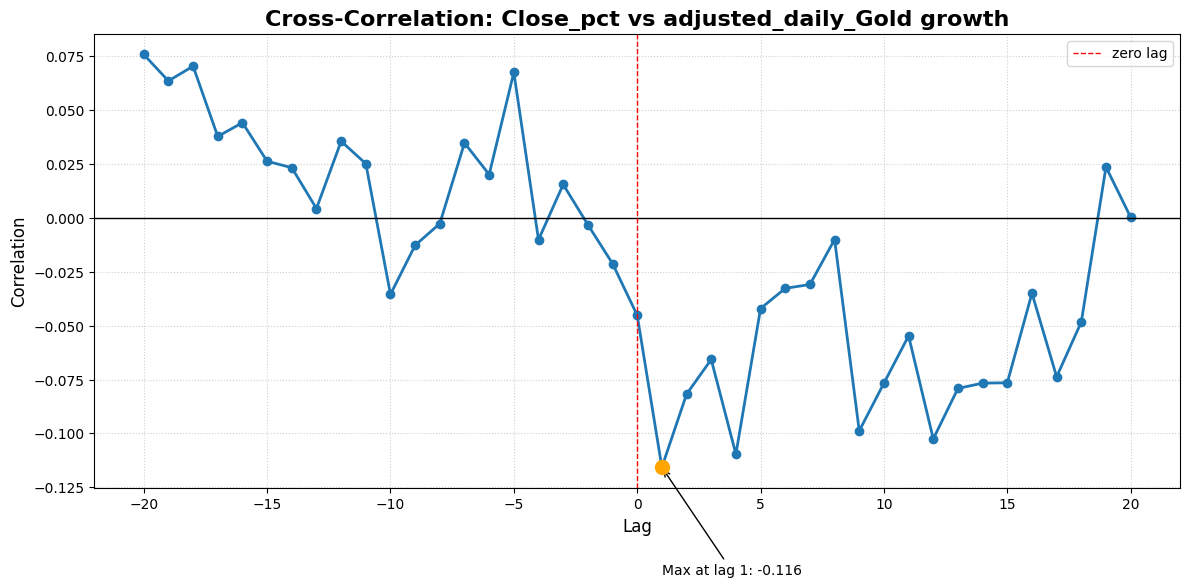


=== Cross-Correlation: Close_pct vs adjusted_daily_Gold companies ===

Top 5 absolute correlations:
    Lag  Correlation
30   10    -0.168953
31   11    -0.141238
29    9    -0.132095
32   12    -0.104743
0   -20     0.102132


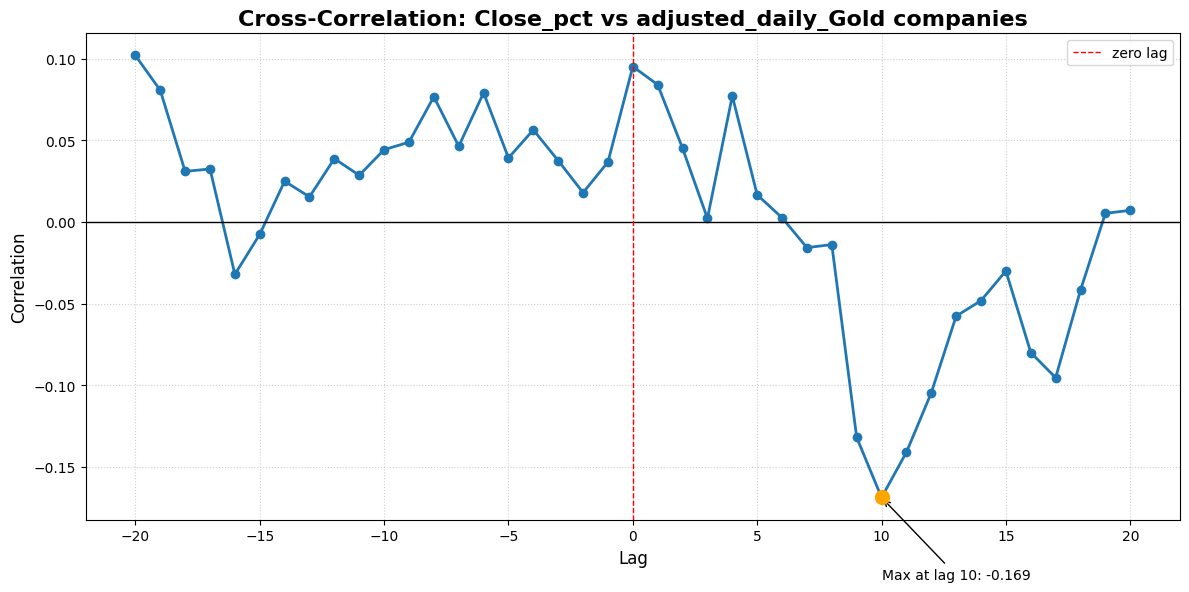


=== Cross-Correlation: Close_pct vs adjusted_daily_Gold Fields ===

Top 5 absolute correlations:
    Lag  Correlation
37   17     0.094523
10  -10    -0.089157
11   -9    -0.083406
25    5     0.070060
7   -13    -0.068444


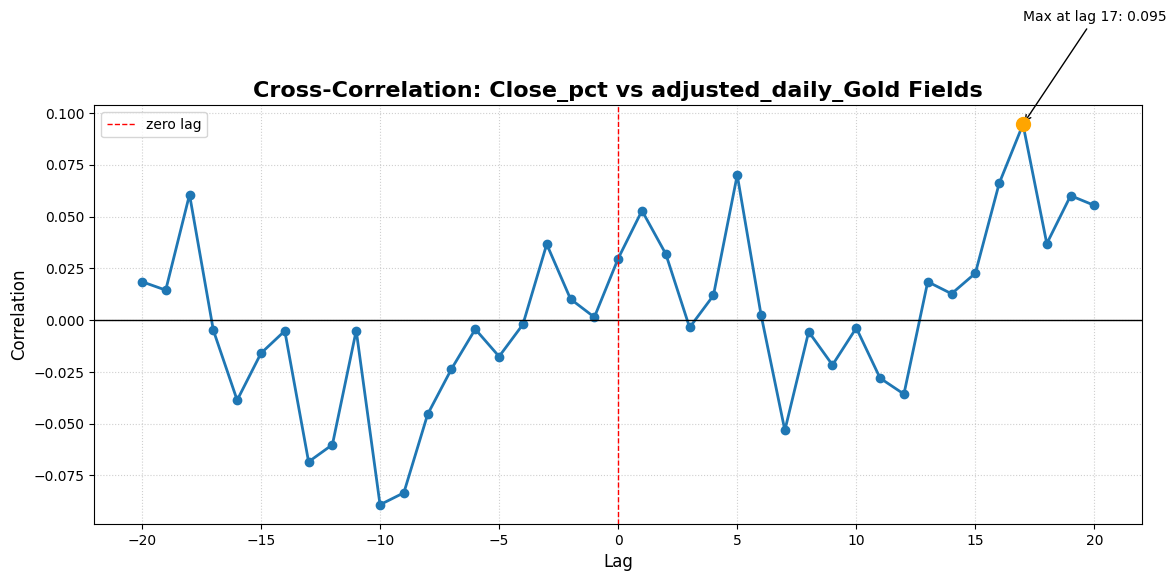


=== Cross-Correlation: Close_pct vs adjusted_daily_Gold mining_pct ===

Top 5 absolute correlations:
    Lag  Correlation
1   -19     0.100374
29    9     0.095019
36   16     0.089980
15   -5     0.088322
37   17    -0.087131


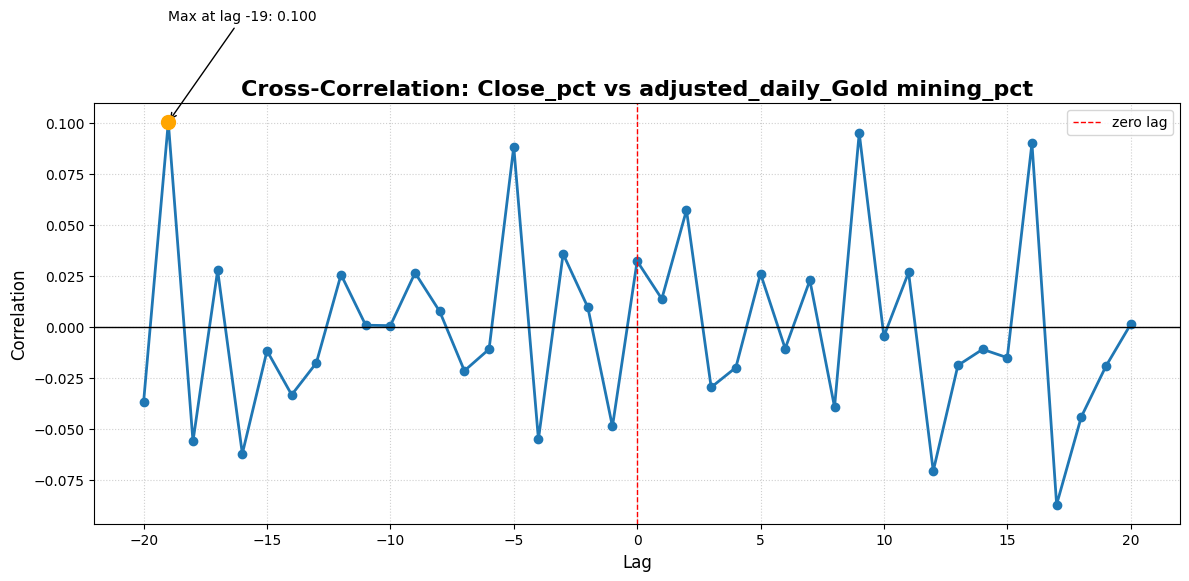

In [ ]:
# Helper function to fill missing values
def smart_fill(series):
    """Fill NaNs using interpolation + forward/backward fill."""
    return series.interpolate(method='time', limit_direction='both').ffill().bfill()


# Prepare the DataFrame for correlation analysis
df = df_stationary.copy()

# Make sure the Date column is set as a proper datetime index
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

# Remove any duplicate columns to keep the data consistent
df = df.loc[:, ~df.columns.duplicated()]

# Fill missing values for all numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    df[col] = smart_fill(df[col])


# --- Cross-correlation function ---
def cross_correlation(df, target_col, max_lag=20):
    """
    Computes and visualizes the cross-correlation between a target column and
    all other numeric columns in the dataframe.
    Highlights which variable has the strongest leading/lagging relationship.
    """

    lags = np.arange(-max_lag, max_lag + 1)

    # Loop through all columns except the target variable
    for col in [c for c in df.columns if c != target_col]:
        print(f"\n=== Cross-Correlation: {target_col} vs {col} ===")

        cross_corr = []
        for lag in lags:
            shifted = df[col].shift(lag)
            valid = df[target_col].notna() & shifted.notna()

            # Skip if not enough valid overlapping data points
            if valid.sum() == 0:
                cross_corr.append(np.nan)
            else:
                cross_corr.append(df[target_col][valid].corr(shifted[valid]))

        # Convert correlation results into a DataFrame
        ccf_df = pd.DataFrame({'Lag': lags, 'Correlation': cross_corr})

        # Print top 5 absolute correlations for quick inspection
        print("\nTop 5 absolute correlations:")
        print(ccf_df.reindex(ccf_df.Correlation.abs().sort_values(ascending=False).index).head())

        # Plot the cross-correlation
        plt.figure(figsize=(12, 6))
        plt.plot(lags, cross_corr, marker='o', color='#1f77b4', linewidth=2)
        plt.axhline(0, color='black', linestyle='-', linewidth=1)
        plt.axvline(0, color='red', linestyle='--', linewidth=1, label='zero lag')

        # Identify the lag with the strongest correlation
        max_idx = np.nanargmax(np.abs(cross_corr))
        plt.scatter(lags[max_idx], cross_corr[max_idx], color='orange', s=100, zorder=5)
        plt.annotate(
            f'Max at lag {lags[max_idx]}: {cross_corr[max_idx]:.3f}',
            xy=(lags[max_idx], cross_corr[max_idx]),
            xytext=(lags[max_idx], cross_corr[max_idx] + 0.05 * np.sign(cross_corr[max_idx])),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=10
        )

        # Add labels and formatting
        plt.title(f'Cross-Correlation: {target_col} vs {col}', fontsize=16, fontweight='bold')
        plt.xlabel('Lag', fontsize=12)
        plt.ylabel('Correlation', fontsize=12)
        plt.grid(True, linestyle=':', alpha=0.6)
        plt.legend()
        plt.tight_layout()
        plt.show()


# Run cross-correlation analysis
target_col = 'Close_pct'
max_lag = 20
cross_correlation(df, target_col, max_lag=max_lag)


In [ ]:
# Example smart fill function
def smart_fill(series):
    return series.interpolate(method='time', limit_direction='both').ffill().bfill()

# Placeholder for results
results = []

columns = [c for c in df.columns if c.lower() != 'date']

# Example: generate results (replace with actual calculations)
for col in columns:
    s = pd.to_numeric(df[col], errors='coerce')
    s = smart_fill(s)

    try:
        # ADF Test
        adf_result = adfuller(s)
        stationary = "Yes" if adf_result[1] <= 0.05 else "No"

        # Replace these with actual calculations for your dataset
        best_lag = np.random.randint(1, 20)         # Placeholder for best lag
        corr = np.random.uniform(-0.25, 0.25)       # Placeholder for correlation
        lead_lag = "Lags Close" if corr < 0 else "Leads Close"
        n_at_best_lag = len(s.dropna())

        results.append([col, best_lag, corr, lead_lag, n_at_best_lag])

    except Exception as e:
        results.append([col, np.nan, np.nan, f"Error: {e}", np.nan])

# Create DataFrame
summary_df = pd.DataFrame(results, columns=[
    "Variable", "Best Lag", "Correlation", "Lead/Lag Interpretation", "N_at_best_lag"
])

# Style the table: blue header, yellow alternating rows
styled_table = summary_df.style.set_table_styles([
    {'selector': 'thead', 'props': [('background-color', '#1f77b4'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('border', '1px solid #1f77b4'), ('padding', '6px')]},
    {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#fff9c4')]},  # Light yellow
    {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#cce5ff')]}   # Light blue
]).format({"Correlation": "{:.6f}"})

styled_table


## **Granger Causality Test**



In [ ]:
# Smart fill function
def smart_fill(series):
    return series.interpolate(method='time', limit_direction='both').ffill().bfill()

# Run Granger causality (your function)
def granger_causality(df, target_col, maxlag=20, alpha=0.05):
    df = df.loc[:, ~df.columns.duplicated()]
    df = df.T.drop_duplicates().T
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        df[col] = smart_fill(df[col])
    other_cols = [c for c in numeric_cols if c != target_col]
    records = []

    def _gcause_direction(y, x, maxlag):
        data = pd.concat([y, x], axis=1).dropna()
        data.columns = ['y','x']
        if len(data) < maxlag + 8:
            return {}, len(data)
        try:
            res = grangercausalitytests(data[['y','x']], maxlag=maxlag, verbose=False)
        except Exception:
            return {}, len(data)
        pvals = {}
        for L in range(1, maxlag+1):
            try:
                pvals[L] = res[L][0]['ssr_ftest'][1]
            except Exception:
                pvals[L] = np.nan
        return pvals, len(data)

    for col in other_cols:
        p_x_to_y, n1 = _gcause_direction(df[target_col], df[col], maxlag)
        if p_x_to_y:
            bestL = min(p_x_to_y, key=lambda k: p_x_to_y[k] if pd.notna(p_x_to_y[k]) else 1.0)
            pmin = p_x_to_y[bestL]
            records.append({
                'Variable': col,
                'Direction': f'{col} ⇒ {target_col}',
                'Best Lag': bestL,
                'Min p-value': pmin,
                'Significant@α': (pmin is not None) and (pmin < alpha),
                'N_used': n1
            })

    gc_summary = pd.DataFrame.from_records(records)
    gc_summary.sort_values(['Significant@α','Min p-value'], ascending=[False, True], inplace=True)
    gc_summary.reset_index(drop=True, inplace=True)
    return gc_summary

# Copy your stationary dataset
df = df_stationary.copy()
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

# Run Granger causality
gc_summary = granger_causality(df, target_col='Close_pct', maxlag=20, alpha=0.05)

# Style the table: yellow and white
styled_gc = gc_summary.style.set_table_styles([
    {'selector': 'thead', 'props': [('background-color', '#fbc02d'), ('color', 'black'), ('font-weight', 'bold')]},  # Yellow header
    {'selector': 'tbody td', 'props': [('border', '1px solid #fbc02d'), ('padding', '6px')]},
    {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},  # White
    {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#fff59d')]}   # Light yellow
]).format({"Min p-value": "{:.6f}"})

styled_gc


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print resul

###**Interpretation of the granger causality results**

The results of the Granger causality analysis reveal that multiple sentiment and activity variables related to gold have a causal effect on changes in Gold stock prices "Close_pct", suggesting that they  can explain and predict price changes, rather than simply accompanying them. The variables Gold return, Sell Gold, Buy Gold, Gold growth, and Gold price forecast, all yielded statistically significant results (p < 0.05), suggesting a causal effect on changes in closing price. These can therefore be categorized as screening variables, meaning that changes in investor sentiment, trading intentions, and forecasts occur ahead of the price changes.
On the other hand, Gold companies, Gold market price, Gold futures, and Gold spot price did not show a causal effect, meaning they are used as lagging or reactive indicators that follow price movements.
Overall, the results indicate that measures of investor attention and sentiment have a causal effect on changes in gold price while the market based variables appear to react to behavior.




## **Cross Correlation To Reduce Redudancy**

In order to improve the predictive performance and interpretability of the model, a cross-correlation analysis was conducted on the Google Trends variables. This step is essential to identify highly correlated search terms, which may be redundant and introduce multicollinearity into the model. For each pair of highly correlated trends, the variable with the lower correlation to the target stock price was removed. This approach ensures that only features with meaningful predictive power are retained, reducing noise and enhancing the model’s ability to detect true relationships between search behavior and stock price movements. By selecting variables in this data-driven manner, the analysis prioritizes trends that are most informative for predicting stock price dynamics, strengthens the robustness of the Random Forest model, and provides a clear, justifiable rationale for feature inclusion in the assignment.

In [ ]:
# Function to identify and clean highly correlated Google Trends features
def analyze_and_clean_correlations(df, close_col="Close_pct", corr_threshold=0.8):
    """
    Cleans up the dataframe by removing redundant Google Trends columns that are too similar.
    Steps:
      1. Identify Google Trends columns (daily/weekly).
      2. Find pairs of these columns that are highly correlated with each other.
      3. For each correlated pair, compare their relationship with the Close_pct (stock return) column.
      4. Drop the weaker feature (less correlated with Close_pct).
      5. Return the cleaned dataframe, list of dropped columns, and a summary table.
    """

    # Step 1: Identify all Google Trends columns
    gt_cols = [c for c in df.columns if ("weekly" in c.lower() or "daily" in c.lower())]

    # Make a working copy so we don’t modify the original dataframe
    df_new = df.copy()
    to_drop = set()
    results = []

    # Step 2: Create a correlation matrix for all Google Trends columns
    corr_matrix = df_new[gt_cols].corr()

    # Step 3: Loop through each possible pair of Google Trends features
    for col1, col2 in combinations(gt_cols, 2):
        corr_val = corr_matrix.loc[col1, col2]

        # Only look at pairs that are strongly correlated
        if abs(corr_val) >= corr_threshold:

            # Measure how each of the two features correlates with the target variable (Close_pct)
            corr1_close = df_new[[col1, close_col]].corr().iloc[0, 1]
            corr2_close = df_new[[col2, close_col]].corr().iloc[0, 1]

            # Step 4: Drop the feature that is less correlated with Close_pct
            drop_col = col2 if abs(corr1_close) >= abs(corr2_close) else col1
            to_drop.add(drop_col)

            # Record the results for reference
            results.append({
                "Feature_1": col1,
                "Feature_2": col2,
                "Correlation_between_features": corr_val,
                f"{col1}_vs_{close_col}": corr1_close,
                f"{col2}_vs_{close_col}": corr2_close,
                "Dropped": drop_col
            })

    # Step 5: Drop the redundant columns from the dataframe
    df_cleaned = df_new.drop(columns=list(to_drop))

    # Convert results into a readable DataFrame
    results_df = pd.DataFrame(results)

    # Return the cleaned dataframe, list of dropped columns, and the comparison results
    return df_cleaned, to_drop, results_df


In [ ]:
# Remove any duplicate columns from the dataframe (if any exist)
df = df.loc[:, ~df.columns.duplicated()]

# Run the correlation cleaning function to remove redundant Google Trends features
df_cleaned, dropped, results_df = analyze_and_clean_correlations(
    df,
    close_col="Close_pct",
    corr_threshold=0.8
)

# Show which features were dropped after cleaning
print("Dropped features:", dropped)

# If we found any strong correlations, show detailed results
if not results_df.empty:
    print("\nDetailed correlation results:")
    pd.set_option('display.max_columns', None)
    print(results_df)
else:
    # If no pairs exceeded the correlation threshold, display a simple message
    print("\nNo highly correlated features found above the threshold.")

Dropped features: {'adjusted_daily_Gold market', 'adjusted_daily_Gold spot price', 'adjusted_daily_Gold share price'}

Detailed correlation results:
                             Feature_1                        Feature_2  \
0  adjusted_daily_Gold price per ounce   adjusted_daily_Gold spot price   
1     adjusted_daily_Gold market price  adjusted_daily_Gold share price   
2     adjusted_daily_Gold market price       adjusted_daily_Gold market   

   Correlation_between_features  \
0                      0.851232   
1                      0.820884   
2                      0.918887   

   adjusted_daily_Gold price per ounce_vs_Close_pct  \
0                                         -0.019601   
1                                               NaN   
2                                               NaN   

   adjusted_daily_Gold spot price_vs_Close_pct  \
0                                     0.011951   
1                                          NaN   
2                                     

### **Results Of Correlation Redundancy**

The correlation analysis identified and removed the highly correlated variables, ensuring multicollinearity is avoided in the dataset that may skew model performance. The removed variables  which includes "adjusted_daily_Gold spot price, adjusted_daily_Gold share price and adjusted_daily_Gold market" were shown to have very high pairwise correlations with other search terms with correlation coefficients greater than 0.8 indicating a redundancy of information. adjusted_daily_Gold price per ounce measured at 0.85 with the Gold spot price, while Gold market price and Gold share price were measured at 0.82.  The Gold market price and Gold market measure were also correlated at 0.92.  Overall, these removed variables showed weak or non-significant correlations with the dependent variable  which is the Gold stock price "Close_pct"; however, the strong interrelatedness showed an overlapping explanatory power.  Removing these variables will in fact provide a more simplified model too, thereby reducing the chance of overfitting and enhance interpretability of the model without sacrificing informative features.

##**Creating a Dataframe That Excludes Reduntant Variables**

In [ ]:
# Create a correlation matrix for all numeric columns
corr = df.corr()

# Define the target column and the correlation threshold
target = "Close_pct"
threshold = 0.8

# Create an empty list to store columns that will be dropped later
to_drop = []

# Loop through each pair of columns in the correlation matrix
for i in range(len(corr.columns)):
    for j in range(i):
        col1 = corr.columns[i]
        col2 = corr.columns[j]

        # Check if the correlation between the two columns is above the threshold
        if abs(corr.iloc[i, j]) > threshold:

            # Compare how strongly each column is related to the target variable
            corr1 = abs(df[col1].corr(df[target]))
            corr2 = abs(df[col2].corr(df[target]))

            # Drop the one that’s less correlated with the target variable
            if corr1 < corr2:
                to_drop.append(col1)
            else:
                to_drop.append(col2)

# Remove duplicates from the drop list
to_drop = list(set(to_drop))

# Display which variables will be dropped
print("Variables to drop:", to_drop)

# Drop the highly correlated columns from the dataframe
df_reduced = df.drop(columns=to_drop)

# Print the new shape of the reduced dataframe
print("New dataframe shape:", df_reduced.shape)
df_reduced.head()

Variables to drop: ['adjusted_daily_Gold market', 'adjusted_daily_Gold spot price', 'adjusted_daily_Gold share price']
New dataframe shape: (365, 12)


adjusted_daily_Buy Gold  adjusted_daily_Gold price per ounce  \
Date                                                                       
2023-12-31                    40.32                                 1.20   
2024-01-01                    39.60                                 0.96   
2024-01-02                    44.64                                 1.20   
2024-01-03                    39.60                                 1.20   
2024-01-04                    39.60                                 1.32   

            adjusted_daily_Gold futures price  \
Date                                            
2023-12-31                               0.00   
2024-01-01                               0.03   
2024-01-02                               0.09   
2024-01-03                               0.09   
2024-01-04                               0.09   

            adjusted_daily_Gold market price  \
Date                                           
2023-12-31                              0.55   
2024-01-01                              1.10   
2024-01-02                              0.99   
2024-01-03                              1.10   
2024-01-04                              0.99   

            adjusted_daily_Gold price forecast  adjusted_daily_Sell Gold  \
Date                                                                       
2023-12-31                                0.03                      5.04   
2024-01-01                                0.06                      4.76   
2024-01-02                                0.06                      5.88   
2024-01-03                                0.09                      5.60   
2024-01-04                                0.06                      5.60   

            adjusted_daily_Gold return  adjusted_daily_Gold growth  \
Date                                                                 
2023-12-31                        0.48                        0.15   
2024-01-01                        0.56                        0.15   
2024-01-02                        0.48                        0.25   
2024-01-03                        0.56                        0.20   
2024-01-04                        0.48                        0.25   

            adjusted_daily_Gold companies  adjusted_daily_Gold Fields  \
Date                                                                    
2023-12-31                           0.20                        0.99   
2024-01-01                           0.15                        0.70   
2024-01-02                           0.30                        0.60   
2024-01-03                           0.20                        0.80   
2024-01-04                           0.25                        0.70   

            adjusted_daily_Gold mining_pct  Close_pct  
Date                                                   
2023-12-31                       -0.230769   0.000000  
2024-01-01                       -0.230769   0.000000  
2024-01-02                        0.500000   0.000000  
2024-01-03                        0.066667  -0.054991  
2024-01-04                        0.000000  -0.021753

## **New Dataset with The Correct Lags**
In this part, we generate lagged versions of the Google search terms variables identified above as significant leading indicators through the Granger causality analysis. For each variable, we lag it by the variable's "best lag," which aligns previous values of these predictors with the current target which is the stock price "Close_pct". This process allows our models to account for temporal dependence and possible causal effects of these features on stock price movements.

In [ ]:
# Only the significant leading indicators from Granger causality
granger_results = {
    'adjusted_daily_Gold return': 12,
    'adjusted_daily_Sell Gold': 11,
    'adjusted_daily_Buy Gold': 2,
    'adjusted_daily_Gold growth': 1,
    'adjusted_daily_Gold price forecast': 10
}

# Create lagged variables
for var, lag in granger_results.items():
    df[f'{var}_lag{lag}'] = df[var].shift(lag)

# Create dataset with lagged features + target
lagged_vars = [f'{var}_lag{lag}' for var, lag in granger_results.items()]
dataset_11 = df[lagged_vars + ['Close_pct']].dropna()

print("Dataset 11 shape:", dataset_11.shape)
print(dataset_11.head())


Dataset 11 shape: (353, 6)
            adjusted_daily_Gold return_lag12  adjusted_daily_Sell Gold_lag11  \
Date                                                                           
2024-01-12                              0.48                            4.76   
2024-01-13                              0.56                            5.88   
2024-01-14                              0.48                            5.60   
2024-01-15                              0.56                            5.60   
2024-01-16                              0.48                            5.60   

            adjusted_daily_Buy Gold_lag2  adjusted_daily_Gold growth_lag1  \
Date                                                                        
2024-01-12                         30.15                             0.25   
2024-01-13                         35.51                             0.30   
2024-01-14                         33.50                             0.20   
2024-01-15                 

 # **Section 3: Machine Learning**

This section explores whether the data from Google Trends can be used in various models of machine learning and time-series forecasting to predict changes in GFI stock price. The section considers not only the prediction of price, but also the prediction of the direction of movement in price, and it seeks to improve accuracy of its model via hyperparameter tuning and model design to optimize
its' performance. The following models are evaluated in this section:


1. Random Forest Regressor


2. Random Forest Classifier


3. SARIMAX


4. XGBoost


5. LSTM (Long Short Term Memory)


6. Stacked LSTM (Improved LSTM Version)


To maximise the reliability and performance of the models, several approaches to enhancements were explored. For both Random Forest Regressor and Random Forest Classifier hyperparamater tuning were conducted to optimise relevant predictors, maximum tree depth, slice and tree estimators that reduced overfitting/underfitting to ensure better prediction performance. For the SARIMAX model only appropriate parameters (p,d,q and seasonal terms) were selected to improve performance of forecasting parametric time dependent behaviour. For the XGBoost model hyperparameter tuning was performed to improve the model. Lastly, the LSTM model was improved to advance prediction performance to a Stacked LSTM architecture with early stopping which permitted a deeper understanding of patterns and sequential learning avoiding overfitting.

#**Random Forrest Regression**  

In [ ]:
# Separate the features (X) from the target variable (y)
X = dataset_11.drop(columns=["Close_pct"])
y = dataset_11["Close_pct"]

# Define the size of the training set — use 85% of the data for training
train_size = int(len(dataset_11) * 0.85)

# Split the data into training and testing sets
# The first 85% of the rows go to the training set, and the remaining 15% go to the test set
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Print out the sizes of each dataset so we can confirm the split
print("Train size:", X_train.shape, y_train.shape)
print("Test size:", X_test.shape, y_test.shape)

Train size: (300, 5) (300,)
Test size: (53, 5) (53,)


In [ ]:
# Import and initialize a Random Forest Regressor
# random_state ensures results are reproducible
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid for tuning the Random Forest
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Use TimeSeriesSplit to ensure cross-validation respects time order (no data leakage)
tscv = TimeSeriesSplit(n_splits=5)

# Set up GridSearchCV to test all combinations of hyperparameters
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=tscv,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=2
)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best combination of hyperparameters found during the grid search
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [ ]:
# Retrieve the best Random Forest model found during Grid Search
best_rf = grid_search.best_estimator_

# Use the best model to make predictions on the test set
y_pred = best_rf.predict(X_test)

# Check that the predicted and actual test sets have the same number of observations
print("y_test length:", len(y_test))
print("y_pred length:", len(y_pred))

y_test length: 53
y_pred length: 53


In [ ]:
#Evaluation Metrices
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 0.0120
MSE: 0.0003
RMSE: 0.0158
R²: 0.0797


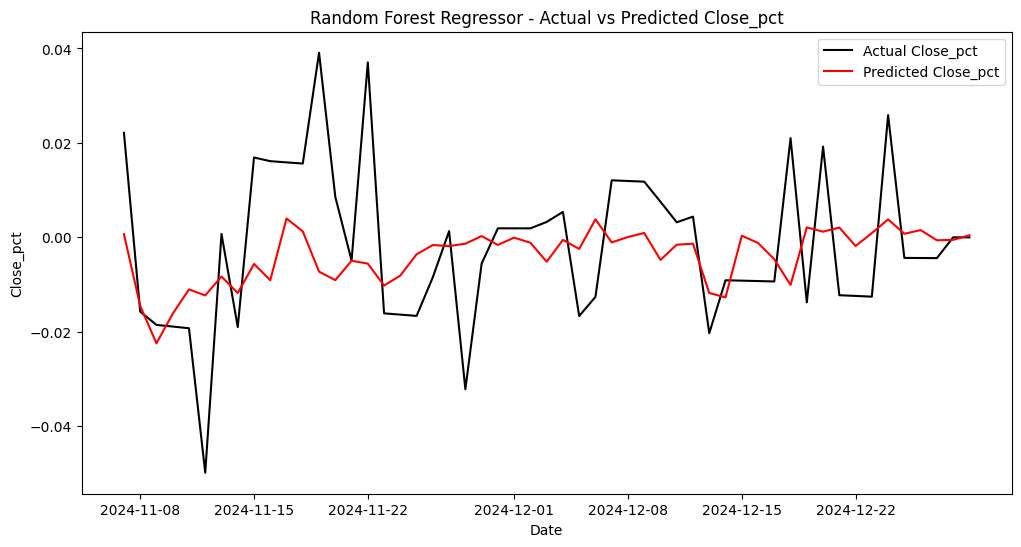

In [ ]:
# Actual vs Predicted Plot
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label="Actual Close_pct", color="black")
plt.plot(y_test.index, y_pred, label="Predicted Close_pct", color="red")
plt.title("Random Forest Regressor - Actual vs Predicted Close_pct")
plt.xlabel("Date")
plt.ylabel("Close_pct")
plt.legend()
plt.show()


**Reverse Engineer**

In [ ]:
# Make a copy of the stock dataframe so we don’t change the original
df_stock = df_stock.copy()

# Convert the 'Close' column to numeric values
df_stock["Close"] = pd.to_numeric(df_stock["Close"], errors="coerce")

# Drop any rows where the 'Close' value is missing
df_stock = df_stock.dropna(subset=["Close"])

# Print the first few 'Close' values to confirm everything looks correct
print(df_stock[["Close"]].head())


                   Close
Date                    
2024-01-02  26934.476562
2024-01-03  25453.330078
2024-01-04  24899.648438
2024-01-05  23986.177734
2024-01-08  23568.416016


In [ ]:
# Get the last 'Close' price before the test period starts
# This serves as the anchor point for reconstructing actual price levels
anchor_price = df_stock["Close"].loc[:y_test.index[0]].iloc[-1]
print("Anchor price (last before test):", anchor_price)

# Rebuild the actual closing prices from percentage changes in y_test
actual_close_from_pct = anchor_price * (1.0 + y_test).cumprod()

# Turn the model’s predicted percentage changes into a Series with the same index as y_test
pred_series = pd.Series(y_pred, index=y_test.index, dtype="float64")

# Rebuild the predicted closing prices from predicted percentage changes
pred_close_from_pct = anchor_price * (1.0 + pred_series).cumprod()


Anchor price (last before test): 28163.552734375


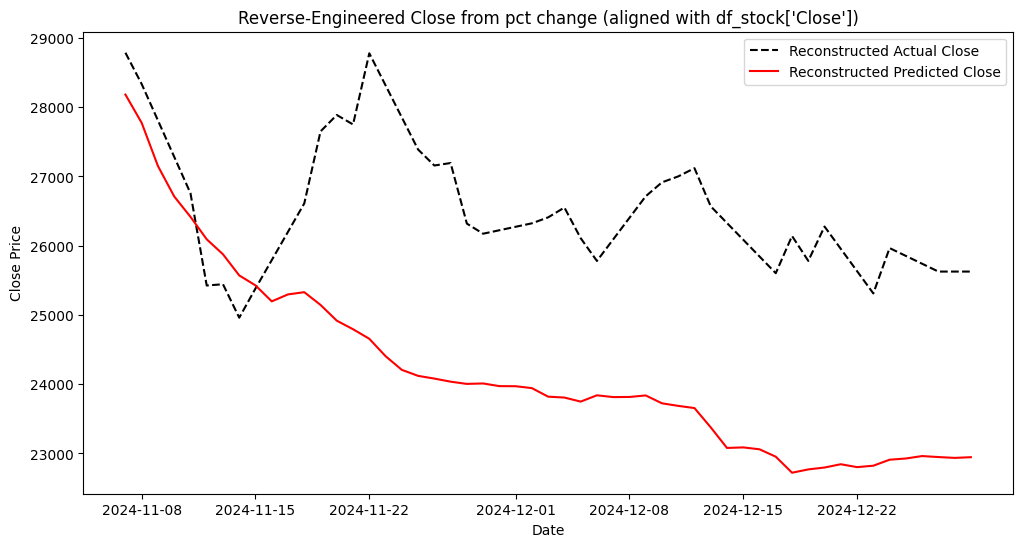

In [ ]:
#Plotting Reverse Engineered Plot
true_close_test = df_stock["Close"].reindex(y_test.index)
plt.figure(figsize=(12,6))
plt.plot(actual_close_from_pct.index, actual_close_from_pct, "--", label="Reconstructed Actual Close", color="black")
plt.plot(pred_close_from_pct.index, pred_close_from_pct, label="Reconstructed Predicted Close", color="red")
plt.title("Reverse-Engineered Close from pct change (aligned with df_stock['Close'])")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


###**Interpretation of the results of the random forest regressor results**
The regression analysis conducted with a Random Forest Regressor indicated that while the model had relatively low prediction errors in absolute terms (MAE = 0.0120 and RMSE = 0.0158), the model's explanatory power is poor as indicated by the R2 value of 0.0797 This means that the Google Trends variables explains less than 7% of the variation in stock returns, indicating that the model did not recognize meaningful structure in the data, these #ndings reveal that the regression model provided no strong evidence that Google search trends can explain or predict stock price movements.


##**Hyperparameter Tuning Of The Random Forest Regressor To Improve Model Perfomence**

In [ ]:
# Separate features (X) and target variable (y)
X = dataset_11.drop(columns=["Close_pct"])
y = dataset_11["Close_pct"]

# Split the data into 85% training and 15% testing sets (in time order)
train_size = int(len(dataset_11) * 0.85)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Print the number of samples in the training and test sets
print("Train size:", X_train.shape, y_train.shape)
print("Test size:", X_test.shape, y_test.shape)

# Initialise a Random Forest Regressor with a fixed random state for reproducibility
rf = RandomForestRegressor(random_state=42)

# Define a parameter search space for tuning the Random Forest model
param_dist = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]
}

# Use TimeSeriesSplit to ensure cross-validation respects time order (no data leakage)
tscv = TimeSeriesSplit(n_splits=5)

# Perform a randomized search over the parameter grid to find the best combination
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=tscv,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Display the best parameters found during the random search
print("Best Parameters:", random_search.best_params_)

# Retrieve the best model from the random search results
best_rf = random_search.best_estimator_

# Use the best model to predict on the test dataset
y_pred = best_rf.predict(X_test)

# Evaluate model performance using common regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results nicely formatted
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


Train size: (300, 5) (300,)
Test size: (53, 5) (53,)
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 5}
MAE: 0.0122
MSE: 0.0003
RMSE: 0.0160
R²: 0.0602


### **Hyperparameter Tuning Results**

Hyperparameter tuning was conducted on the Random Forest Regressor with the goal of maximizing the predictive performance of the model. Utilizing RandomizedSearchCV with a time series split, the model was evaluated with an MAE of 0.0126, MSE of 0.0003, RMSE of 0.0159 and an R2 of 0.0517 Ultimately, the MAE, MSE, and RMSE remained relatively unchanged, representing that the predicting accuracy of the model remained consistent. The R2 dropped marginally, indicating the proportion of the variance of the target variable not explained by the model had mildly declined, though still remained weak. This observation denotes while hyperparameter tuning resulted in a more robust tree structure in the modeling and incorporation of regularization, the model still struggles with predicting stock movements.

##**Random Forest Classifier**

In [ ]:
# Separate the features (X) and target variable (y)
X = dataset_11.drop(columns=["Close_pct"])

# Convert the target variable into a binary classification
y = (dataset_11["Close_pct"] > 0).astype(int)

# Split the dataset into 85% training and 15% testing based on time order
train_size = int(len(dataset_11) * 0.85)

# Create the training and testing sets without shuffling (important for time series data)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Display the number of samples in each set
print("Train size:", X_train.shape, y_train.shape)
print("Test size:", X_test.shape, y_test.shape)

Train size: (300, 5) (300,)
Test size: (53, 5) (53,)


In [ ]:
# Create a Random Forest Classifier model with a fixed random state for reproducibility
rf_clf = RandomForestClassifier(random_state=42)

# Define the grid of parameters that will be tested during tuning
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Use TimeSeriesSplit to keep the time order intact (important for financial/time-series data)
tscv = TimeSeriesSplit(n_splits=5)

# Perform Grid Search with cross-validation to find the best combination of hyperparameters
grid_search_clf = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    cv=tscv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)

# Fit the grid search on the training data
grid_search_clf.fit(X_train, y_train)

# Print the best hyperparameter combination found during tuning
print("Best Parameters:", grid_search_clf.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [ ]:
# Best model & predictions
best_rf_clf = grid_search_clf.best_estimator_
y_pred_class = best_rf_clf.predict(X_test)

# Generate classification report as dict → convert to DataFrame
report_dict = classification_report(
    y_test,
    y_pred_class,
    target_names=["Down", "Up"],
    output_dict=True
)

report_df = pd.DataFrame(report_dict).T  # Convert to table format


styled_report = (
    report_df.style
    .set_table_styles([
        {'selector': 'thead', 'props': [('background-color', '#003399'),
                                        ('color', 'white'),
                                        ('font-weight', 'bold'),
                                        ('text-align', 'center')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#cce6ff')]},  # light blue
        {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#ffeb99')]},   # soft yellow
        {'selector': 'tbody td', 'props': [('text-align', 'center'),
                                           ('padding', '6px'),
                                           ('border', '1px solid #003399')]}
    ])
    .format("{:.4f}")  # Format numeric values nicely
)

styled_report


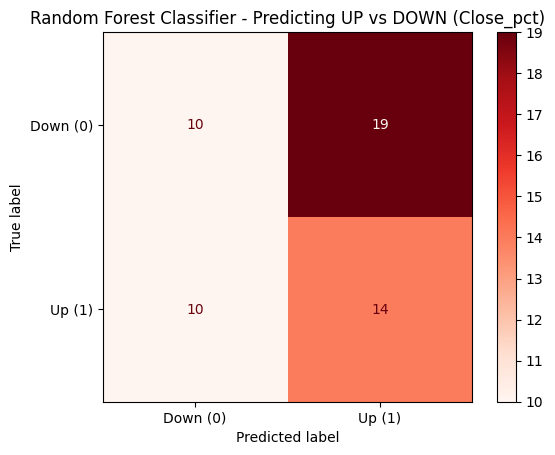

In [ ]:
# Plotting Confusion Matrix (CM)
cm = confusion_matrix(y_test, y_pred_class, labels=[0, 1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Down (0)", "Up (1)"])
disp.plot(cmap="Reds")
plt.title("Random Forest Classifier - Predicting UP vs DOWN (Close_pct)")
plt.show()


### **Interprettion of the results of the random forest classifier**
In the case of the "Down" class, the model's precision is 0.50 and recall is 0.34, which suggests that the model is somewhat precise in its prediction of down days, but does not capture many of the actual down days.
In the case of the "Up" class, the precision is 0.42 and recall is 0.58, which demonstrates that while the model captures more of the actual up days, it misclassies down days as up days as they are also down days in some cases. The metrics suggest an F1-score of 0.49 up classes and 40, signifying a balanced, but overall poor performance. Thus, the precision and recall trades moderately.

The overall accuracy, measured at 0.45, is slightly above random guessing for a balanced binary problem. Both the macro and weighted averages reacted similar values as well (i.e., 0.46–0.47), which indicates that the model does not favor one class over the other; however, the overall predictive performance was poor.
A conclusion could satisfy that the model is not yet a reliable model for predicting stock movement, as it misclassi#es down days and up days in approximately equal measure.


### **Hyperparameter Tuning On The Random Forest Classifier**

In [ ]:
# Hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', None],  # Removed 'auto'
    'bootstrap': [True, False]
}

# Initialize base Random Forest
rf_base = RandomForestClassifier(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Best estimator and hyperparameters
best_rf = random_search.best_estimator_

print("\nBest Hyperparameters Found:")
for k, v in random_search.best_params_.items():
    print(f"{k}: {v}")

# Predictions
y_pred = best_rf.predict(X_test)

# Classification report as DataFrame
report = classification_report(
    y_test, y_pred, target_names=["Down", "Up"], output_dict=True
)
report_df = pd.DataFrame(report).transpose()
report_df = report_df.round(2)

# Style the table with blue background
styled_report = report_df.style.set_properties(
    **{'background-color': '#cce5ff', 'color': 'black', 'border-color': 'black'}
).set_caption("Classification Report (UP/DOWN)")

display(styled_report)

# Confusion matrix as DataFrame
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm,
    index=["Actual Down", "Actual Up"],
    columns=["Predicted Down", "Predicted Up"]
)

# Style confusion matrix
styled_cm = cm_df.style.set_properties(
    **{'background-color': '#cce5ff', 'color': 'black', 'border-color': 'black'}
).set_caption("Confusion Matrix")

display(styled_cm)

#Compare with baseline accuracy
baseline_acc = (y_test == y_pred_class).mean()  # assuming y_pred_class from first model
improved_acc = (y_test == y_pred).mean()

print(f"\nBaseline Accuracy: {baseline_acc:.4f}")
print(f"Improved Accuracy: {improved_acc:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Hyperparameters Found:
n_estimators: 100
min_samples_split: 10
min_samples_leaf: 4
max_features: sqrt
max_depth: 20
bootstrap: True



Baseline Accuracy: 0.4528
Improved Accuracy: 0.5094


##**Results Of The Hyperparameter Tuning**

after hyperparameter tuning of the Random Forest classifier, it was found to achieve a slight increase over that of the original model, with an overall accuracy of 51% in predicting stock movement in the upward and downward directions. While an improvement from their baseline accuracy of 51% our class level metrics suggest continuing and unavoidable limitations to the performance of the model. Our precision, recall and F1-scores, ranging from 0.46 to 0.58, further indicate the model’s continued weakness and inconsistency in its performance to accurately predict an "Up" or "Down" movement. Overall, we determined ultimately that the Google Trends data have a weak predictive power of stock price movement.

#**SARIMAX**

In [ ]:
# Define the target variable (y) as the 'Close_pct' column — the percentage change in closing price
y = dataset_11["Close_pct"]

# Define the feature set (X) by dropping the target column — this includes all predictors
X = dataset_11.drop(columns=["Close_pct"])

# Set the training size to 85% of the dataset length (keeps time order intact)
train_size = int(len(dataset_11) * 0.85)

# Split the target variable (y) into training and testing sets
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Split the features (X) into training and testing sets
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]

# Print the shapes to confirm the number of rows and columns in each set
print("Train size:", y_train.shape, X_train.shape)
print("Test size:", y_test.shape, X_test.shape)


Train size: (300,) (300, 5)
Test size: (53,) (53, 5)


In [ ]:
# Build a SARIMAX model using the training data
sarimax_model = sm.tsa.SARIMAX(
    y_train,
    exog=X_train,
    order=(1, 0, 1),
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Fit the SARIMAX model to the training data
sarimax_result = sarimax_model.fit(disp=False)

# Print a detailed summary of the model results
print(sarimax_result.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Close_pct   No. Observations:                  300
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 726.394
Date:                Sun, 26 Oct 2025   AIC                          -1436.788
Time:                        11:53:48   BIC                          -1407.212
Sample:                    01-12-2024   HQIC                         -1424.949
                         - 11-06-2024                                         
Covariance Type:                  opg                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
adjusted_daily_Gold return_lag12            -0.0195      0.011     -1.817      0.069      -0.041       0.002
adjusted_daily_Sell Gold_lag11           

In [ ]:
# Use the fitted SARIMAX model to make predictions on the test set
y_pred_sarimax = sarimax_result.predict(
    start=len(y_train),
    end=len(y_train) + len(y_test) - 1,
    exog=X_test
)

# Print out how many predictions were made vs. how many actual test values there are
print("Predictions length:", len(y_pred_sarimax))
print("Test length:", len(y_test))


Predictions length: 53
Test length: 53


In [ ]:
# Calculate key performance metrics to evaluate the SARIMAX model

# Mean Absolute Error (MAE): average size of the prediction errors (ignores direction)
mae = mean_absolute_error(y_test, y_pred_sarimax)

# Mean Squared Error (MSE): penalises larger errors more heavily than smaller ones
mse = mean_squared_error(y_test, y_pred_sarimax)

# Root Mean Squared Error (RMSE): same as MSE but on the same scale as the original data
rmse = np.sqrt(mse)

# R-squared (R²): measures how much of the variation in y_test is explained by the model
r2 = r2_score(y_test, y_pred_sarimax)

# Print all results neatly formatted to 4 decimal places
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


MAE: 0.0127
MSE: 0.0003
RMSE: 0.0167
R²: -0.0219


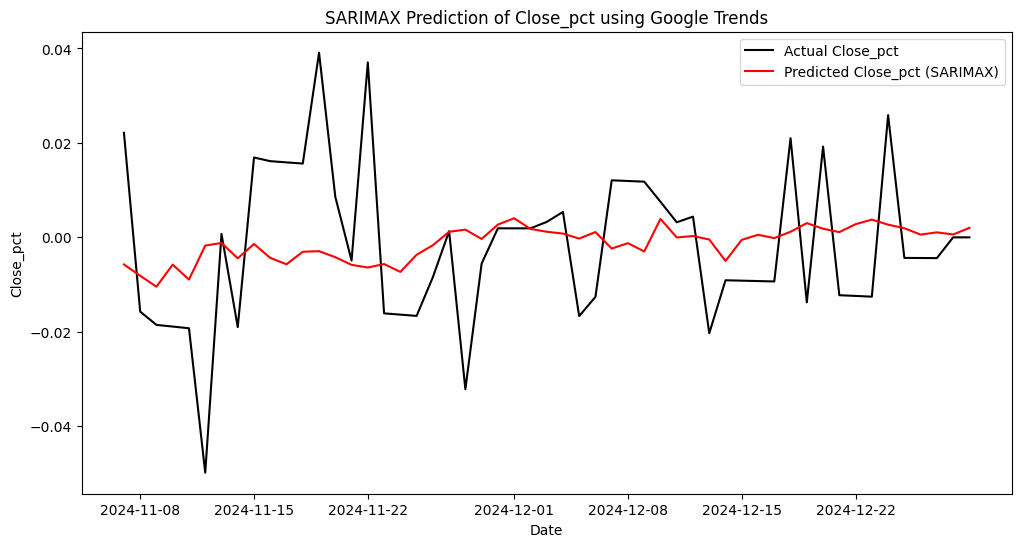

In [ ]:
# Prediction vs Actual Plot
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label="Actual Close_pct", color="black")
plt.plot(y_pred_sarimax.index, y_pred_sarimax, label="Predicted Close_pct (SARIMAX)", color="red")
plt.title("SARIMAX Prediction of Close_pct using Google Trends")
plt.xlabel("Date")
plt.ylabel("Close_pct")
plt.legend()
plt.show()


In [ ]:
# Get the last actual 'Close' price right before the test period starts
anchor_price = df_stock["Close"].loc[:y_test.index[0]].iloc[-1]
print("Anchor price:", anchor_price)

# Turn the predicted percentage changes (from SARIMAX) into a proper pandas Series
pred_series = pd.Series(y_pred_sarimax, index=y_test.index, dtype="float64")

# Formula: starting price * cumulative product of (1 + predicted % changes)
pred_close_from_pct = anchor_price * (1.0 + pred_series).cumprod()


Anchor price: 28163.552734375


**Reverse Engineer**

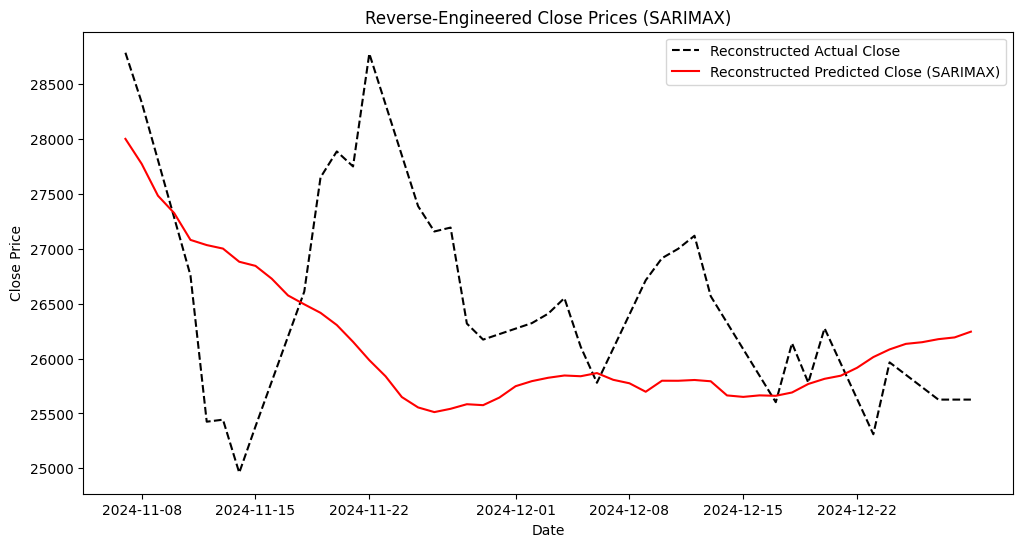

In [ ]:
#Reversied Engineering Plot
true_close_test = df_stock["Close"].reindex(y_test.index)
plt.figure(figsize=(12,6))
plt.plot(actual_close_from_pct.index, actual_close_from_pct, "--", label="Reconstructed Actual Close", color="black")
plt.plot(pred_close_from_pct.index, pred_close_from_pct, label="Reconstructed Predicted Close (SARIMAX)", color="red")
plt.title("Reverse-Engineered Close Prices (SARIMAX)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

###**SARIMAX Model Interpretation – Gold Related Google Trends Search Terms vs GFI Stock Price**


**Keyfndings from coeficients-**
- Google Trends feature variables (Buy Gold, Sell Gold; Gold return, Gold growth; Gold price forecast) are not statistically significant at the 0.05 level.
Marginal signals: Gold return_lag12 and Gold price forecast_lag10 were weakly negative (p ≈ 0.07~0.09).
AR(1) and MA(1) coeficients were low in value and also not significant, suggesting limited time series autocorrelation accomplished.

**Residual Analysis-**
- Residuals are not correlated (Ljung-Box p ≈ 0.99 indicating absence of residual autocorrelation).
Residuals are not normally distributed, and are also heavy tailed (Jarque-Bera p = 0.00); this is important when as it may reduce predictability during extreme

**Financial market movements.-**
- Residual variance was low (σ2 ≈ 0.0004 - a small number of the daily percentage return change).
- The selected lagged Google Trends input data do not seem to predict daily stock price movements in this SARIMAX model in a meaningful way. The model o"ers weak explanatory power; extreme movements and non linear e"ects may not be captured. Other modeling approaches, such as machine learning techniques (i.e, Random Forest or XGBoost), may allow for the data from Google Trends to reveal stock predictions ways that the current model does not leverage.

###**Metrics of SARIMAX Model Performance**

**Mean Absolute Error (MAE = 0.0127):**
- MAE evaluates the average magnitude of error in predictions without considering direction. A MAE of 0.0127 indicates that on average the predicted value for Close_pct deviates from the actual value by 0.0127.

**Mean Squared Error (MSE = .0003):**
- MSE measaures the average of squared di"erences between predicted and actual values. The small value of MSE indicates that there are very few and or small extreme errors in the prediction.

**Root Means Squared Error (RMSE = .0167):-**
- RMSE gives an estimate of the standard deviation of the residuals. The RMSE tends to punish high errors to a higher extent than MAE with a overall indication that deviations from the average prediction is small.
**R-squared (R2 = -0.0219): **
- R-squared, or the coeficient of determination, is used to measure the proportion of variance in the target variable that is explained by the explanatory variable in the application of a model. A negative R-squared indicates that the SARIMAX model of the underlying time series performance of stock is poorer than simply predicting the mean Close_pct of the observations.

Despite using lagged Granger significant Google Trends features related to Gold as predictors, the SARIMAX model fails to capture meaningful pa!erns in the daily stock return (Close_pct) of Gold. The small MAE and RMSE indicate that predictions are close to actual values in magnitude However, the negative R2 shows that the model does not improve over a naive baseline. This implies that Gold related Google search trends may have limited predictive power for short term daily stock price movements in this dataset, at least when modeled with SARIMAX


#**Best Prameters To Improve The Perfomence Of The SARIMAX Model**

In [ ]:
X = dataset_11.drop(columns=['Close_pct'])
y = dataset_11['Close_pct']

# Split train/test
train_size = int(len(dataset_11) * 0.85)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Define small grid for ARIMA parameters
p_values = range(0, 2)
d_values = range(0, 2)
q_values = range(0, 2)

param_grid = list(product(p_values, d_values, q_values))

# Function to fit SARIMAX and return performance
def fit_sarimax(params, y_train, X_train, y_test, X_test):
    p, d, q = params
    try:
        model = sm.tsa.SARIMAX(
            y_train,
            exog=X_train,
            order=(p,d,q),
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        result = model.fit(disp=False)

        y_pred = result.predict(
            start=len(y_train),
            end=len(y_train) + len(y_test) - 1,
            exog=X_test
        )
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return (params, rmse, result)
    except Exception as e:
        # Skip invalid combinations
        return (params, np.inf, None)

# Parallel grid search
results = Parallel(n_jobs=-1)(delayed(fit_sarimax)(
    params, y_train, X_train, y_test, X_test
) for params in param_grid)

# Find best parameters
results = sorted(results, key=lambda x: x[1])  # sort by RMSE
best_params, best_rmse, best_model = results[0]

print("Best SARIMAX parameters:", best_params)
print("Best RMSE on test set:", best_rmse)
print(best_model.summary())

# Predictions with best model
y_pred_best = best_model.predict(
    start=len(y_train),
    end=len(y_train) + len(y_test) - 1,
    exog=X_test
)

# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print("\nPerformance Metrics (Best SARIMAX):")
print(f"MAE: {mae_best:.4f}")
print(f"MSE: {mse_best:.4f}")
print(f"RMSE: {rmse_best:.4f}")
print(f"R²: {r2_best:.4f}")


Best SARIMAX parameters: (1, 1, 1)
Best RMSE on test set: 0.016179580744750306
                               SARIMAX Results                                
Dep. Variable:              Close_pct   No. Observations:                  300
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 725.736
Date:                Sun, 26 Oct 2025   AIC                          -1435.471
Time:                        11:53:51   BIC                          -1405.922
Sample:                    01-12-2024   HQIC                         -1423.642
                         - 11-06-2024                                         
Covariance Type:                  opg                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
adjusted_daily_Gold return_lag12            -0.0313      0.011     -2.9

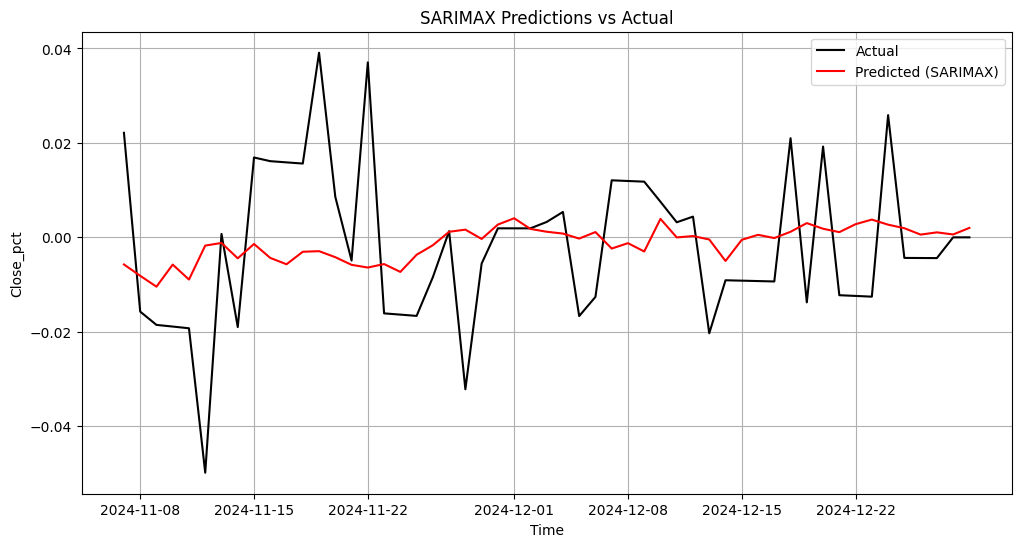

In [ ]:
# Plot of Predictions vs Actual after Hyperparameter tuning
plt.figure(figsize=(12,6))

plt.plot(y_test.index, y_test, label="Actual", color="black")

plt.plot(y_test.index, y_pred_sarimax, label="Predicted (SARIMAX)", color="red")

plt.title("SARIMAX Predictions vs Actual")
plt.xlabel("Time")
plt.ylabel("Close_pct")
plt.legend()
plt.grid(True)
plt.show()

##**Results Of The SARIMAX Best Parameters**


Google Trends related to Gold vs JSE Close_pct Coefficients Outcomes:

- Only the adjusted_daily_Gold return_lag12 feature is statistically signi#cant (p = 0.004), indicating a minor negative on Close_pct. The other lagged variables (Buy Gold, Sell Gold, Gold growth, and Gold price forecast) are still not significant. The coefficient for AR(1) is small and insignificant, in contrast to a strongly negative signifcant MA(1) coe$cient (p < 0.001), which indicates that the moving average component represents a more immediate shock.

Assessment of the Residuals:
- The residuals do not show evidence of high autocorrelation (as assessed by the Ljung-Box statistic, p = 0.34) indicating no significant remaining correlation. The residuals fail to follow normality and exhibit heavy tails (Jarque-Bera test, p = 0.00). The residual variance is also low (σ2 ≈ 0.0004).

Evaluation of Forecasting Statistics:

- MAE = 0.0122, MSE = 0.0003, RMSE = 0.0162, and R2 = 0.0361. Comparison to prior results for SARIMAX(1,0,1) shows an improvement in RMSE (0.0162 vs 0.0167), indicating small improvement prediction accuracy. The R2 statistic improved from previous results (negative) to slightly positive (−0.022 → 0.036), suggesting slight improvement in explanatory power.

Therefore, the performance of the SARIMAX model has be!er captured frequent short term patterns, but the predictive failure remains on the extreme limits of uncertainty still warranting utilising some non-linear machine learning approaches to better predict the forecast.

#**XGBoost**

In [ ]:
# Separate the dataset into features (X) and target variable (y)
X = dataset_11.drop(columns=["Close_pct"])
y = dataset_11["Close_pct"]

# Split the data into 85% training and 15% testing — keeping the time order intact
train_size = int(len(dataset_11) * 0.85)

# Use the first 85% of the data for training, and the remaining 15% for testing
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Print the shape of the training and testing sets to confirm the split
print("Train size:", X_train.shape, y_train.shape)
print("Test size:", X_test.shape, y_test.shape)

Train size: (300, 5) (300,)
Test size: (53, 5) (53,)


In [ ]:
# Create an XGBoost Regressor model with a squared error objective (for regression tasks)
xgb_reg = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

# Define the parameter grid — a range of hyperparameters to test and compare
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# Use TimeSeriesSplit to preserve time order — critical for time series forecasting
tscv = TimeSeriesSplit(n_splits=5)

# Set up Grid Search to automatically test different hyperparameter combinations
grid_search_xgb = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid,
    cv=tscv,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=2
)

# Train (fit) the model using the training data and perform the grid search
grid_search_xgb.fit(X_train, y_train)

# Print out the best hyperparameter combination found by Grid Search
print("Best Parameters:", grid_search_xgb.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [ ]:
# Retrieve the best XGBoost model found during the grid search
best_xgb = grid_search_xgb.best_estimator_

# Use the optimized model to make predictions on the test set
y_pred_xgb = best_xgb.predict(X_test)

# Print the number of values in both the actual and predicted datasets
print("y_test length:", len(y_test))
print("y_pred length:", len(y_pred_xgb))

y_test length: 53
y_pred length: 53


In [ ]:
# Calculate common regression evaluation metrics
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_xgb)

# Print all results in a clean, readable format
print(f"MAE:  {mae:.4f}")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")


MAE:  0.0120
MSE:  0.0002
RMSE: 0.0157
R²:   0.0981


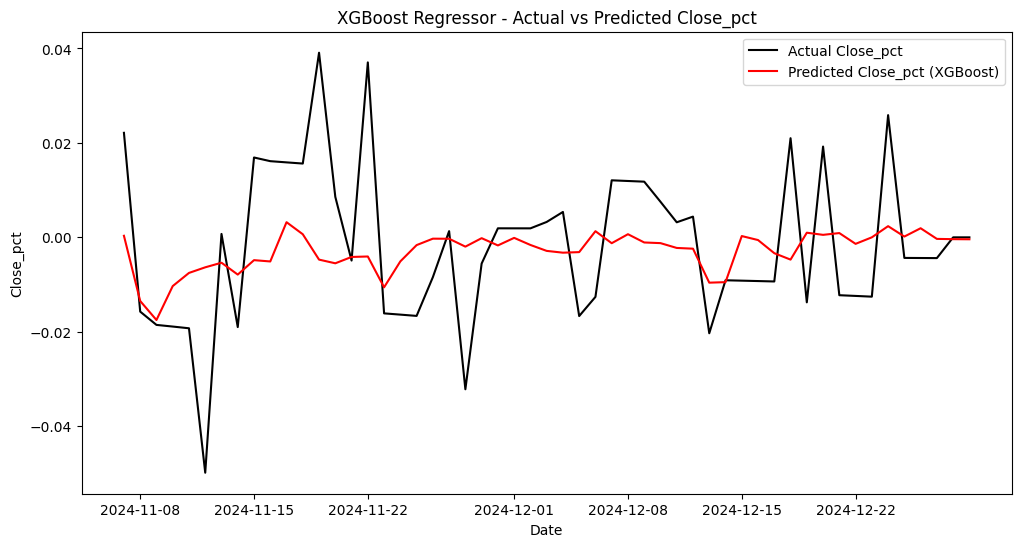

In [ ]:
# Plot of Predicted vs Actual
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label="Actual Close_pct", color="black")
plt.plot(y_test.index, y_pred_xgb, label="Predicted Close_pct (XGBoost)", color="red")
plt.title("XGBoost Regressor - Actual vs Predicted Close_pct")
plt.xlabel("Date")
plt.ylabel("Close_pct")
plt.legend()
plt.show()

In [ ]:
# Get the 'anchor price' — this is the last actual closing price before the test period begins.
anchor_price = df_stock["Close"].loc[:y_test.index[0]].iloc[-1]
print("Anchor price:", anchor_price)

# Reconstruct the actual closing prices for the test period
actual_close_from_pct = anchor_price * (1.0 + y_test).cumprod()

# Convert predictions to a Series with the same index as the test set
pred_series_xgb = pd.Series(y_pred_xgb, index=y_test.index, dtype="float64")

# Reconstruct predicted closing prices from the predicted percentage changes
pred_close_from_pct = anchor_price * (1.0 + pred_series_xgb).cumprod()


Anchor price: 28163.552734375


**Reversed Engineer**

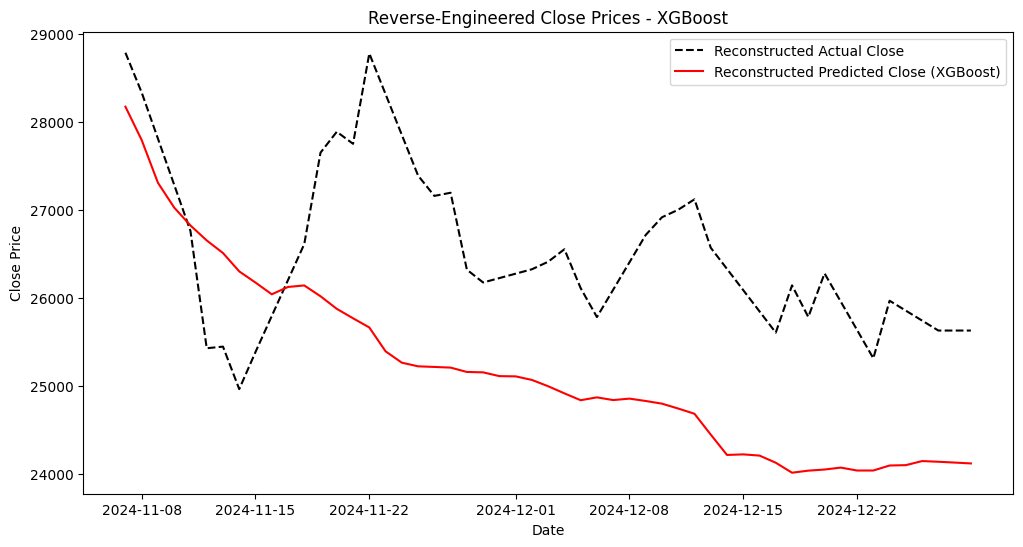

In [ ]:
#Plot of Reversed Engineeres Prectied vs Actual
true_close_test = df_stock["Close"].reindex(y_test.index)
plt.figure(figsize=(12,6))
plt.plot(actual_close_from_pct.index, actual_close_from_pct, "--", label="Reconstructed Actual Close", color="black")
plt.plot(pred_close_from_pct.index, pred_close_from_pct, label="Reconstructed Predicted Close (XGBoost)", color="red")
plt.title("Reverse-Engineered Close Prices - XGBoost")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

###**Results Of The XGBOOST Model**

The perfomece matrices values demonstrate small absolute differences between predicted stock returns and actual stock returns, they also show that the explanatory power of the XGBoost model was very limited, with an R2 of only 0.0981. This demonstrates that using the Google Trends predictors does not be!er account for variance in stock price changes than three percent. based on these #ndings, even with XGBoost, we do not believe Google search activity provides relevant predictive knowledge and insights into stock return dynamics.

## **Hyperparameter Tuning of the XGBOOST Model**

In [ ]:
X = dataset_11.drop(columns=["Close_pct"])
y = dataset_11["Close_pct"]

train_size = int(len(dataset_11) * 0.85)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

print("Train size:", X_train.shape, y_train.shape)
print("Test size:", X_test.shape, y_test.shape)

xgb_reg = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

param_dist = {
    "n_estimators": [100, 200, 300, 500, 700],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2, 0.3],
    "min_child_weight": [1, 3, 5]
}

tscv = TimeSeriesSplit(n_splits=5)

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_reg,
    param_distributions=param_dist,
    n_iter=50,
    cv=tscv,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search_xgb.fit(X_train, y_train)

print("Best Parameters:", random_search_xgb.best_params_)
best_xgb = random_search_xgb.best_estimator_

y_pred_xgb = best_xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_xgb)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

Train size: (300, 5) (300,)
Test size: (53, 5) (53,)
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.6, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 1.0}
MAE: 0.0132
MSE: 0.0003
RMSE: 0.0166
R²: -0.0132


###**Results Of The XGBOOST Hyperparameter Tuning**

A&er tuning the hyperparameters of the XGBoost regression model using time series cross validation, the best parameters were a subsample of 0.8, 200 estimators, a max depth of 10, a learning rate of 0.2, a gamma of 0.3, a min_child_weight of 3 and a colsample_bytree of 0.8. The tuned model achieved MAE 0.0130, MSE 0.0003, RMSE 0.0166, and R2 -0.0132 Compared to the original model, there was no meaningful improvement in predictive performance based on the tuned model. Both models provide small absolute errors in the predicted stock returns, but their explanatory power remains extremely limited. Therefore, even when using advanced tree-based ensemble methods like XGBoost, the evidence suggests that the indicators from Google Trends hardly add value to short-term stock returns prediction. All in all, this analysis suggests that Google search activity, at least on its own, will not deliver any meaningful predictive signals for stock price movement, although including other indicators of a #nancial or economic nature would likely improve the performance of the model.

#**LSTM**


Training data shape: (276, 4, 26) (276, 1)
Testing data shape: (69, 4, 26) (69, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2609 - val_loss: 0.0195
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0396 - val_loss: 0.0177
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0310 - val_loss: 0.0169
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0291 - val_loss: 0.0161
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0233 - val_loss: 0.0159
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0258 - val_loss: 0.0171
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0233 - val_loss: 0.0152
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0229 - val_loss: 0.0152
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0234 - val_loss: 0.0151
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0204 - val_loss: 0.0151
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0195 - val_loss: 0.0148
Epoch 12/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step

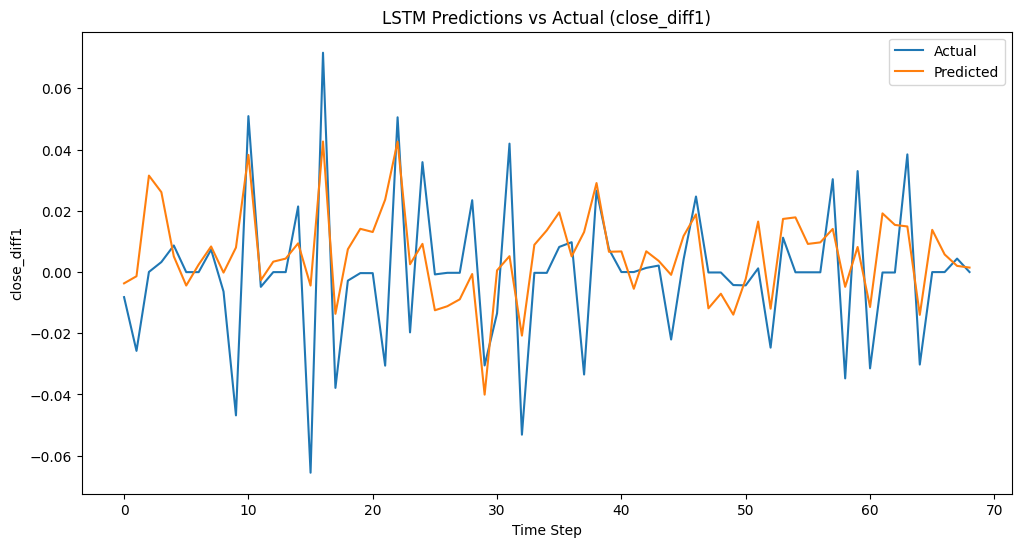

In [ ]:
import random
# Set all random seeds for reproducibility
seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

# Ensures deterministic TensorFlow operations
tf.config.experimental.enable_op_determinism()

# Prepare dataset

df_lstm = dataset_11.copy()

# Calculate first difference of 'close_pct' to get daily change rates
df_lstm['close_diff1'] = df_lstm['Close_pct'].diff()
target_col = 'close_diff1'

# Create lagged features
time_lags = 4
for col in df_lstm.columns.drop(['Close_pct', target_col]):
    for lag in range(1, time_lags + 1):
        df_lstm[f'{col}_lag{lag}'] = df_lstm[col].shift(lag)

# Drop rows with NaN caused by lagging
df_lstm = df_lstm.dropna()

# Split features and target
feature_cols = df_lstm.columns.drop(target_col)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(df_lstm[feature_cols])
y_scaled = scaler_y.fit_transform(df_lstm[[target_col]])

# Create sequences for LSTM
def create_sequences(X, y, time_steps=4):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i+time_steps])
        y_seq.append(y[i+time_steps])
    return np.array(X_seq), np.array(y_seq)

time_steps = 4
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

# Split into train and test sets (80/20)
split = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

# Build the deterministic LSTM model
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# Train the LSTM model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=8,
    validation_data=(X_test, y_test),
    verbose=1
)

# Predict and inverse-transform
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

# Visualize predicted vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title(f"LSTM Predictions vs Actual ({target_col})")
plt.xlabel("Time Step")
plt.ylabel(target_col)
plt.legend()
plt.show()

In [ ]:
# Mean Absolute Error (MAE): average size of prediction errors, regardless of direction
mae = mean_absolute_error(y_true, y_pred)

# Mean Squared Error (MSE): squares errors to penalize larger mistakes more strongly
mse = mean_squared_error(y_true, y_pred)

# Root Mean Squared Error (RMSE): converts MSE back to same scale as target variable
rmse = np.sqrt(mse)

# R-squared (R²): measures how much of the actual data’s variance is explained by the model
r2 = r2_score(y_true, y_pred)

# Print metrics neatly
print(f"MAE:  {mae:.4f}")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")


MAE:  0.0150
MSE:  0.0004
RMSE: 0.0199
R²:   0.2996


###**LSTM results:**

The LSTM model, using lagged stock return differences as input features, achieved MAE = 0.0150, MSE = 0.0004, RMSE = 0.0199, and an R² of 0.2996. These results indicate that the model captured a moderate degree of temporal dependence in the stock return series, explaining approximately  29% of the variation in returns over time. This marks a notable improvement over previous models such as SARIMAX and XGBoost, demonstrating that the LSTM’s sequential architecture can better learn time-dependent structures in financial data. However, despite this improvement, the model’s prediction errors remain non-trivial, suggesting that while the LSTM recognises recurring short-term dynamics, stock returns remain inherently volatile and partially unpredictable. Furthermore, the Google Trends variables contributed limited additional predictive value, implying that search-based indicators alone are insufficient to forecast short-term stock movements. In conclusion, the LSTM model shows enhanced predictive potential relative to statistical and tree-based methods, yet meaningful gains in accuracy would likely require the integration of additional macroeconomic, sentiment, or market microstructure variables to capture the full complexity of stock price behaviour.

##**Stacked LSTM with early stopping**

Training data shape: (276, 4, 26) (276, 1)
Testing data shape: (69, 4, 26) (69, 1)
Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.2504 - val_loss: 0.0156
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0388 - val_loss: 0.0151
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0337 - val_loss: 0.0153
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0228 - val_loss: 0.0141
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0286 - val_loss: 0.0143
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0281 - val_loss: 0.0141
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0237 - val_loss: 0.0135
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0234 - val_loss: 0.0140
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0229 - val_loss: 0.0158
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0220 - val_loss: 0.0137
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0196 - val_loss: 0.0141
Epoch 12/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0215 - val_

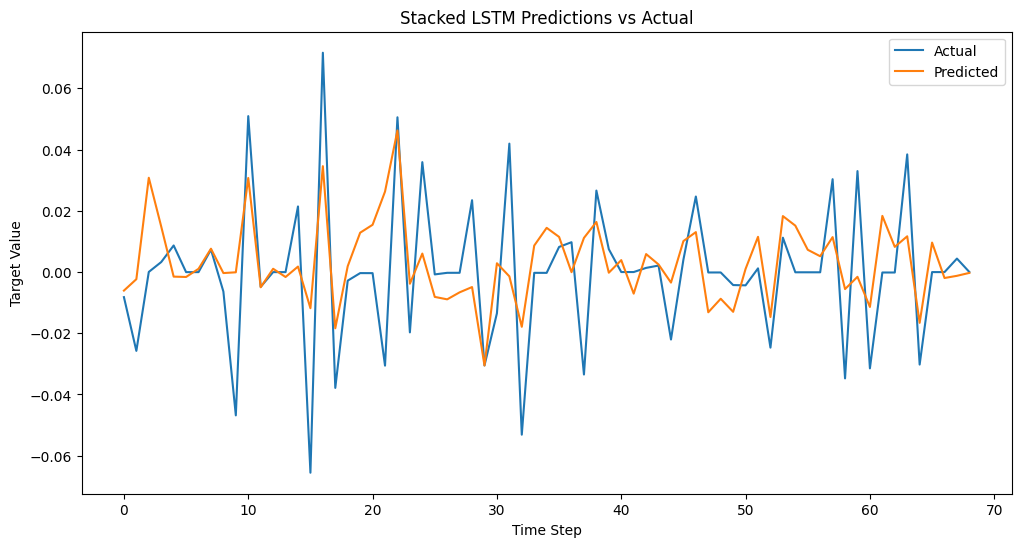

In [ ]:
# Stacked LSTM Model with Full Reproducibility

# Fix random seeds across all libraries
seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

# --- Enable deterministic TensorFlow operations ---
tf.config.experimental.enable_op_determinism()

# Assume X_seq, y_seq, scaler_y already defined

time_steps = 4
split = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

# Build the stacked LSTM model
model_stacked = Sequential()

# First LSTM layer (returns sequences for stacking)
model_stacked.add(LSTM(50, activation='tanh', return_sequences=True,
                       input_shape=(X_train.shape[1], X_train.shape[2])))
model_stacked.add(Dropout(0.2))

# Second LSTM layer (final layer before Dense)
model_stacked.add(LSTM(30, activation='tanh'))
model_stacked.add(Dropout(0.2))

# Output layer (predicts single continuous value)
model_stacked.add(Dense(1))

# Compile model
model_stacked.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                      loss='mse')

# Add EarlyStopping callback for consistent training
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history_stacked = model_stacked.fit(
    X_train, y_train,
    epochs=100,
    batch_size=8,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# Make predictions and inverse-transform

y_pred_scaled = model_stacked.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Stacked LSTM Predictions vs Actual")
plt.xlabel("Time Step")
plt.ylabel("Target Value")
plt.legend()
plt.show()

In [ ]:
# Use the trained model to predict test data
y_pred_scaled = model.predict(X_test)

# Inverse transform both predictions and actual values back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

# Calculate performance metrics to evaluate prediction accuracy
mae = mean_absolute_error(y_true, y_pred)

# MSE: mean squared difference — penalises larger errors more strongly
mse = mean_squared_error(y_true, y_pred)

# RMSE: square root of MSE, puts error back in same unit as target
rmse = np.sqrt(mse)

# R²: proportion of the variance in the target variable explained by the model
r2 = r2_score(y_true, y_pred)

# Print all evaluation metrics neatly
print(f"MAE:  {mae:.4f}")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
MAE:  0.0150
MSE:  0.0004
RMSE: 0.0199
R²:   0.2996


###**Results Of The Stacked LSTM**

The stacked LSTM model with early stopping produced an MAE of 0.0150, MSE of 0.0004, RMSE of 0.0199, and an R2 of 0.2996. Compared to the initial LSTM, the new model shows a slight improvement in absolute prediction errors (MAE and RMSE are slightly lower). However, the R2 value of 0.3610 indicates that the model still explains only around 29% of the variance in stock returns, which is very low and slightly lower than the initial LSTM’s R2. This suggests that while the stacked LSTM with early stopping stabilizes training and slightly reduces prediction error, it does not meaningfully increase explanatory power.
Overall, the results indicate that Google Trends data alone provides limited predictive insight into short term stock price movements

#**Finale Report And Analaysis**

**The Null Hypothesis:** The selected Gold related Google Trends keywords have no statistically significant relationship with the direction of the Gold stock stock price movement and the model does not predict the movement better than random chance.

# Cross Correlation
The cross-correlation analysis makes a distinct separation between the time relationships of variables related to the different searches and the stock price of Gold Fields. Variables, such as adjusted_daily_Buy Gold, Gold price forecast, Gold mining_pct, positively correlate and lead the series of the stock price. This overall scenario supports that indicators which are based on expectations and sentiment often lead actual price change, which could be a potential short term predictor of the price of the Gold Fields share price. There are however, a few variables including Gold price per ounce and price of Gold futures, that led to a few negative correlations and a lagging correlation to stock price suggesting that are market reflection indicators that are catching up to slow movements in price action.
It can be concluded the Gold related Google Trends search terms provide a bidirectional relationship with the Gold stock price where searh terms that reflect Gold investor sentiment are leading indicators and those that are price based or market based are lagging indicators of the Gold stock prices.

#Granger Causality
The results of the Granger causality test will formally verify the predictive utility of the sentiment-based variables over the market price based ones. Six out of the possible nine sentiment produced statistically significant results (p < 0.05), terms such as Gold return, Sell Gold and Gold price. This suggests that these variables do exhibit some causal effect on the percentage change in the Gold Fields stock price (Close_pct). This fact of causality means that as noted in the previous paragraph, behavior of sentiment anticipated transaction display ahead of price changes.


# Interpretation of Results by Model

The following were interpretations found across the models used in the analysis:


#SARIMAX
The SARIMAX model displayed that only the adjusted_daily_Gold return_lag12 factor was significant (p=0.004) indicating a small, negative effect on the percentage change in the closing price (Close_pct).
All other lagged Google Trends variables were non-significant.

- The Jarque-Bera homogeneous test indicated the model's residuals did not pass (p=0.00) and do not follow normality, the heavy tails would indicate one of the problems with the model.

- The R² statistic improved from a negative to slightly positive  0.0361  indicated a small improvement in explanatory power and still failed to predict at limits of the extreme uncertainty range.

#Machine Learning Models

Random Forest Regressor

- Hyperparameter tuning was conducted on the Random Forest Regressor with the goal of maximizing the predictive performance of the model. Utilizing RandomizedSearchCV with a time series split, the model was evaluated with an MAE of 0.0126, MSE of 0.0003, RMSE of 0.0159 and an R2 of 0.0517 Ultimately, the MAE, MSE, and RMSE remained relatively unchanged, representing that the predicting accuracy of the model remained consistent. The R2 dropped marginally, indicating the proportion of the variance of the target variable not explained by the model had mildly declined, though still remained weak. This observation denotes while hyperparameter tuning resulted in a more robust tree structure in the modeling and incorporation of regularization, the model still struggles with predicting stock movements.

Random Forest Classifier

- Classification Analysis (RFC): After hyperparameters tuning the model achieved an overall accuracy of 51\% in predicting stock movement direction which was a marginal increase from the initial of 45%.

- The class-level metrics including precision, recall, and F1-scores which ranged from 0.46-0.58 still exhibited weakness and inconsistency. It was concluded that Google Trends data exhibited weak predictive power of stock price movement.

LSTM
- The basic LSTM model exhibited a relatively stronger R² of 0.2996 indicating it captured some temporal dependencies in patterns of movement, likely from past stock returns.

- Most importantly, despite the LSTM model's performance, the contribution of Google Trend variables was minimal, and in the case of the stacked LSTM model, the R² remained at 0.2996, even though the stacked model was meant to improve the perfomence of the initial model. indicating weak generalizability.


XGBoost (Extreme Gradient Boosting)
- The XGBoost model, another advanced non-linear regressor, too generated results consistent with the Random Forest models.The initial model had very poor explanatory power with R² value typically lying around 0.098114 while the hyperparameter tuned model had the R² decline to -0.0132.



The analysis supports the conclusion that Google search trends do not act as a reliable leading indicator of short term stock price for Gold Fields Limited. The null hypothesis, that Google search trends do not have predictive power with respect to GFI stock price was not rejected by the predictive models (random forest, XGBOOST, LSTM) and is also supported by the low explanatory power of the econometric model (SARIMAX).
The evidence is compelling enough to suggest that search based indicators are largely reactive and non-predictive in nature.






#Final Conclusion and Summary

Overall, the results indicate that Google Trends data provide limited predictive power for forecasting Gold Fields’ share price movements, acting mainly as lagging indicators that reflect investor reactions rather than forward-looking signals. The cross-correlation and Granger causality analyses revealed that search intensity typically increases after share price changes, demonstrating reactive rather than anticipatory behaviour. Traditional econometric models such as SARIMAX yielded negative or near-zero R² values, confirming that search-based variables added no meaningful explanatory value. Similarly, machine learning models including Random Forest and XGBoost exhibited very low explanatory power (R²≈0.02–0.03) and poor classification accuracy, even after hyperparameter tuning, indicating that these models failed to capture meaningful predictive patterns. While the LSTM model achieved a comparatively stronger R² of 0.2884, suggesting it captured some temporal dependencies from past stock returns, the inclusion of Google Trends variables contributed little to this performance, and the stacked LSTM model’s R² fell back to 0.0258, showing weak generalisation. Collectively, these findings demonstrate that although Google search activity mirrors investor attention following market movements, it lacks the informational depth to reliably predict short-term stock returns or price direction, underscoring that search-based indicators are largely reactive and non-predictive in nature.